# Funciones de correlación
Comenzamos importando las siguientes paqueterias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from collections import Counter
import random
import seaborn as sns
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd

## Construcción de las circunferencias
Como queremos graficar puntos aleatorios de un círculo, primero debemos recordar como se grafica una circunferencia y recordemos que sólo queremos  elegir algunos puntos aleatorios de la circunferencia, y lo hacemos de la siguiente forma:

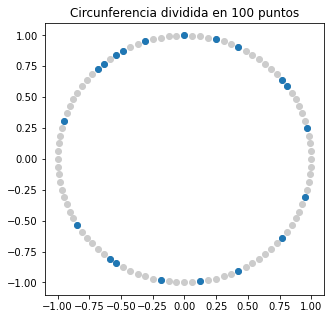

In [2]:
randProba = lambda a: a/sum(a)
npoints = 100# puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

#Graficamos circunferencia gris
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

#Graficamos puntos aleatorios de la circunferencia
n = 20 # puntos aleatorios que elegiremos del círculo
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
x = r * np.cos(t)
y = r * np.sin(t)
plt.title('Circunferencia dividida en 100 puntos')
plt.scatter(x, y)

### Le agregamos perturbaciones 

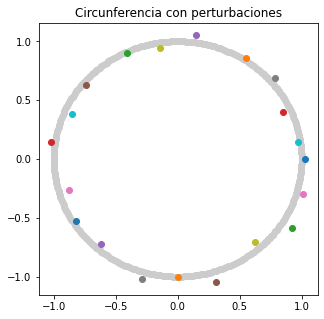

In [3]:
randProba = lambda a: a/sum(a)
npoints = 360 # puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False) 
x = (r * np.cos(t))
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

n = 20 # number of points to chose
puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False)]
for t in range(len(puntos)):
    R = r + random.uniform(-r*0.1,r*0.1)
    x = R * np.cos(t)
    y = R * np.sin(t)
    plt.title('Circunferencia con perturbaciones')
    plt.scatter(x, y)

## Puntos en diferentes círculos aleatorios
A continuación programamos una función a la cual le entregamos los siguientes datos: cantidad de circulos, puntos en los que dividiremos cada círculo, canidad de esos puntos que eligiremos de cada círculo, radio de los círculos, y rango de los centros. A partir de estos datos, nos entrega una 2 listas que son las coordenadas x, y las coordenadas y de cada punto que sigue la distribución de pertenecer a algún circulo con una perturbación del 10% del radio.

In [3]:
# Elegimos cajas cuadradas entre [0, R]
def Puntos_circulos(ncentros, ncircle_points, radio, tcaja, pert, pcenter=0.1, disp_cent=3.0):
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    """
    ncentros = numero de centros, numero de circulos
    ncircle_points = numero de puntos por circulo
    radio = tamaño del circulo
    tcaja = tamaño de la caja
    pert = porcentaje de la perturbacion, ruido
    pcenter = porcentaje del numero de puntos en el centro
    disp_cent = dispersion en la distribucion de puntos centro
    """
    
    points_center =  int(ncircle_points*pcenter)
    ran_centros = np.random.uniform(low=0.0, high=tcaja, size=((ncentros,2)))
    x_1, y_1 = ran_centros.T[0], ran_centros.T[1] 
    pts = 0
    circulo = []
    label = []
    for i in range(ncentros):
        cx = []
        cy = []
        ran_pcircles = np.random.uniform(0, 2*np.pi, ncircle_points)
        for j in ran_pcircles:
            r = radio + random.uniform(-radio*pert,radio*pert) #Pertubación
            c_1 = x_1[i] + r*np.cos(j)
            c_2 = y_1[i] + r*np.sin(j)
            #Como los centros de los círculos pueden estar en la orilla, muchos puntos del cículo deseado se pueden 
            #salir de área a estudiar deseada, por lo que sólo guardamos los que quedan dentro
            if (0 < c_1 < tcaja) & (0 < c_2 < tcaja):
                cx.append(c_1)
                cy.append(c_2)
                label.append(i)
                pts+= 1
        #Agregamos puntos en el centro de los círculos con distribución gaussiana
        x = []
        y = []
        x = np.random.normal(x_1[i], disp_cent, points_center)
        y = np.random.normal(y_1[i], disp_cent, points_center)
        for k in range(points_center):
            if (0 < x[k] < tcaja) & (0 < y[k] < tcaja):
                cx.append(x[k])
                cy.append(y[k])
                label.append(i)
                pts+= 1
        # en caso de querer graficar un circulo en particular 
        circulo.append(list(zip(cx, cy)))
    print('total puntos', pts)
    return circulo, label

In [86]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo, etiqueta= Puntos_circulos(150, 20, 15, 150, 0.01, 0.1)

total puntos 2899


In [87]:
#circulo[1] #Nos entrega los puntos que pertenecen al circulo 1

In [88]:
len(circulo)

150

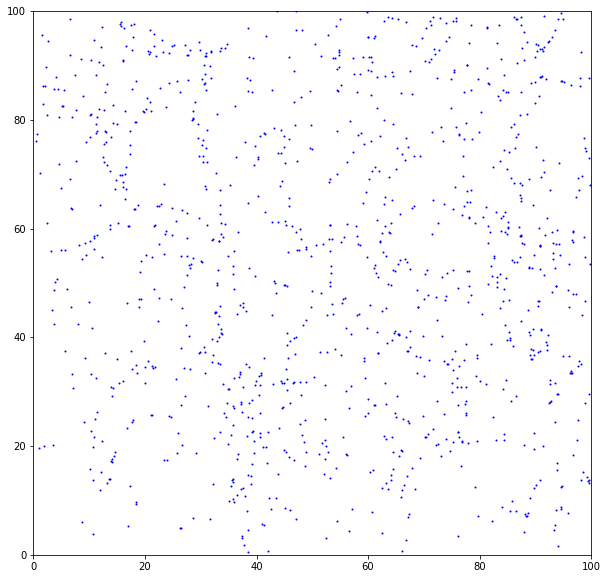

In [89]:
plt.figure(figsize=(10,10))
plt.xlim(0, 100)
plt.ylim(0, 100)

#graficar todos
for cir in circulo: 
    plt.scatter(*zip(*cir), color='b', s=1)
    
#graficar un solo circulos
#plt.scatter(*zip(*circulo[4]), color='r')
#plt.scatter(*zip(*circulo[2]), color='r')

In [4]:
def DD(circulo):
    # Save them all in one array
    all_data = []
    for i, c in enumerate(circulo):
        for _, j in enumerate(c):
            all_data.append(j)
    return all_data

In [91]:
DDcirculo = DD(circulo)
N = len(DDcirculo)

In [92]:
#Para extraer las coordenadas de nuestras galaxias y el circulo a la que pertenece cada uno
df = pd.DataFrame(DDcirculo)
df.insert(2,'label',etiqueta)
print(df)
df.to_csv(r'Shape_mockgalaxies5.txt', header=None, index=None, sep='	', mode='a')

               0           1  label
0     144.908638   58.376280      0
1     123.772764   72.917645      0
2     139.360556   86.956063      0
3     134.378246   86.431675      0
4     136.758670   56.941972      0
...          ...         ...    ...
2894   54.856141   92.908087    149
2895   71.520090  103.057932    149
2896   68.192311   73.368558    149
2897   65.885494   84.871512    149
2898   68.653897   93.527574    149

[2899 rows x 3 columns]


## Distribución aleatoria (RR)

In [93]:
rr = np.random.uniform(low=0.0, high=150.0, size=((1000,2)))
Nr = len(rr)
Nr

1000

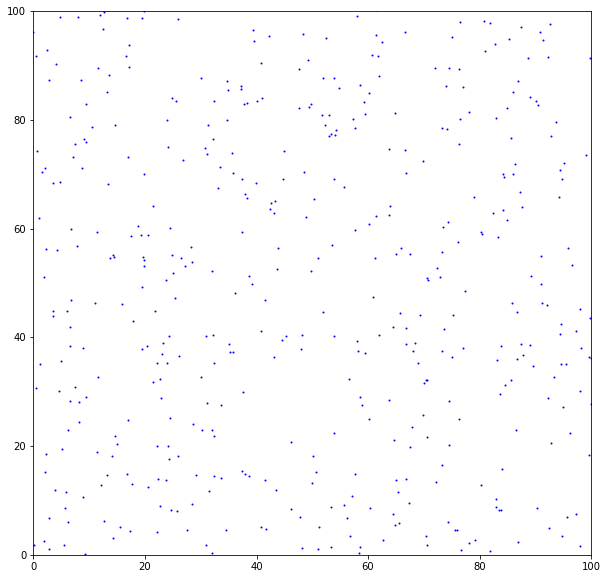

In [94]:
plt.figure(figsize=(10,10))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(rr.T[0], rr.T[1], color='b', s=1)

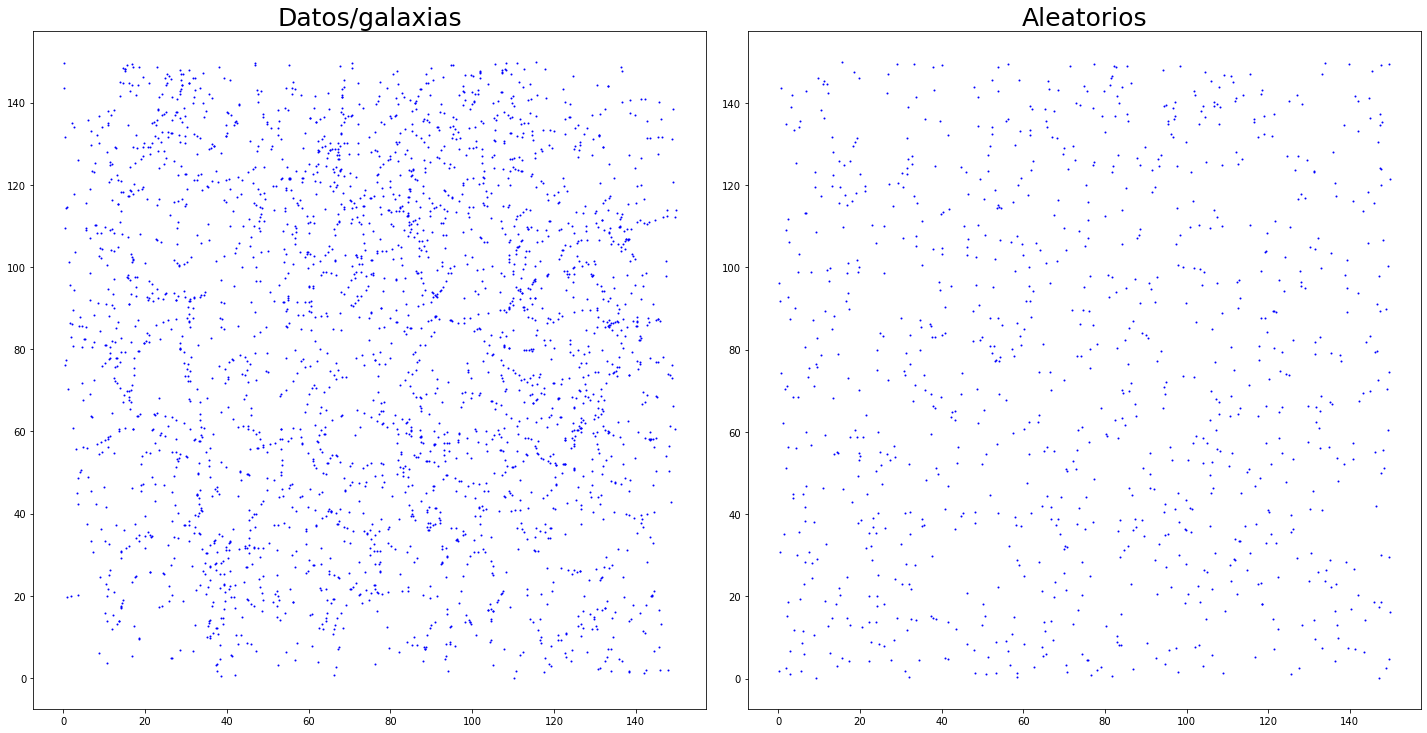

In [95]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('Datos/galaxias', fontsize = 25)
for cir in circulo: 
    axes_cosmo[0].scatter(*zip(*cir), color='b', s=1)

axes_cosmo[1].set_title('Aleatorios', fontsize = 25)
axes_cosmo[1].scatter(rr.T[0], rr.T[1], color='b', s=1)

A continuación se muestra una animación en la cual, se van sibujando los puntos de las circunferencias hasta obtener los datos con los que se están trabajando.

In [116]:
colors = []
fig = plt.figure(figsize=(10,10))
  
def animation_func(i):
    colors.append(np.random.rand(1))
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.scatter(*zip(*circulo[i]), s=3)
  
animation = FuncAnimation(fig, animation_func, interval = 100)
#animation.save('circles.gif', writer='imagemagick', fps=3.0)

/Users/vetovazquez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

In [117]:
fig = plt.figure(figsize=(10,10))
  
def animation_func(i):
    colors.append(np.random.rand(1))
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.scatter(*zip(*circulo[i]), color='b',s=3)
  
animation = FuncAnimation(fig, animation_func, interval = 100)
#animation.save('circlessamecolor.gif', writer='imagemagick')

<Figure size 720x720 with 0 Axes>

A continuación se obtendran distintas distribuciones de galaxias con sus respectivos random y se graficaran. LAs distribuciones serán de la siguiente manera:
- Pocos anillos, pocas galaxias
- Pocos anillos, muchas galaxias
- Muchos anillos, pocas galaxias
- Muchos anillos, muchas galaxias

In [12]:
#Muchos circulos, pocos puntos 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp, etiqueta_Mcpp = Puntos_circulos(250, 25, 20, 100,0.01, 0.1)
DDcirculo_Mcpp = DD(circulo_Mcpp)
N_Mcpp = len(DDcirculo_Mcpp)
rr_Mcpp = np.random.uniform(low=0.0, high=100.0, size=((int(N_Mcpp*1.5),2)))
Nr_Mcpp = len(rr_Mcpp)

total puntos 5269


In [13]:
#Muchos circulos, muchos puntos
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcmp, etiqueta_Mcmp = Puntos_circulos(250, 50, 20, 100,0.01, 0.1)
DDcirculo_Mcmp = DD(circulo_Mcmp)
N_Mcmp = len(DDcirculo_Mcmp)
rr_Mcmp = np.random.uniform(low=0.0, high=100.0, size=((int(N_Mcmp*1.5),2)))
Nr_Mcmp = len(rr_Mcmp)

total puntos 10695


In [14]:
#pocos circulos, pocos puntos 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_pcpp, etiqueta_pcpp = Puntos_circulos(150, 25, 20, 100,0.01, 0.1)
DDcirculo_pcpp = DD(circulo_pcpp)
N_pcpp = len(DDcirculo_pcpp)
rr_pcpp = np.random.uniform(low=0.0, high=100.0, size=((int(N_pcpp*1.5),2)))
Nr_pcpp = len(rr_pcpp)

total puntos 3128


In [15]:
#pocos circulos, muchos puntos 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_pcmp, etiqueta_pcmp = Puntos_circulos(150, 50, 20, 100,0.01, 0.1)
DDcirculo_pcmp = DD(circulo_pcmp)
N_pcmp = len(DDcirculo_pcmp)
rr_pcmp = np.random.uniform(low=0.0, high=100.0, size=((int(N_pcmp*1.5),2)))
Nr_pcmp = len(rr_pcmp)

total puntos 6422


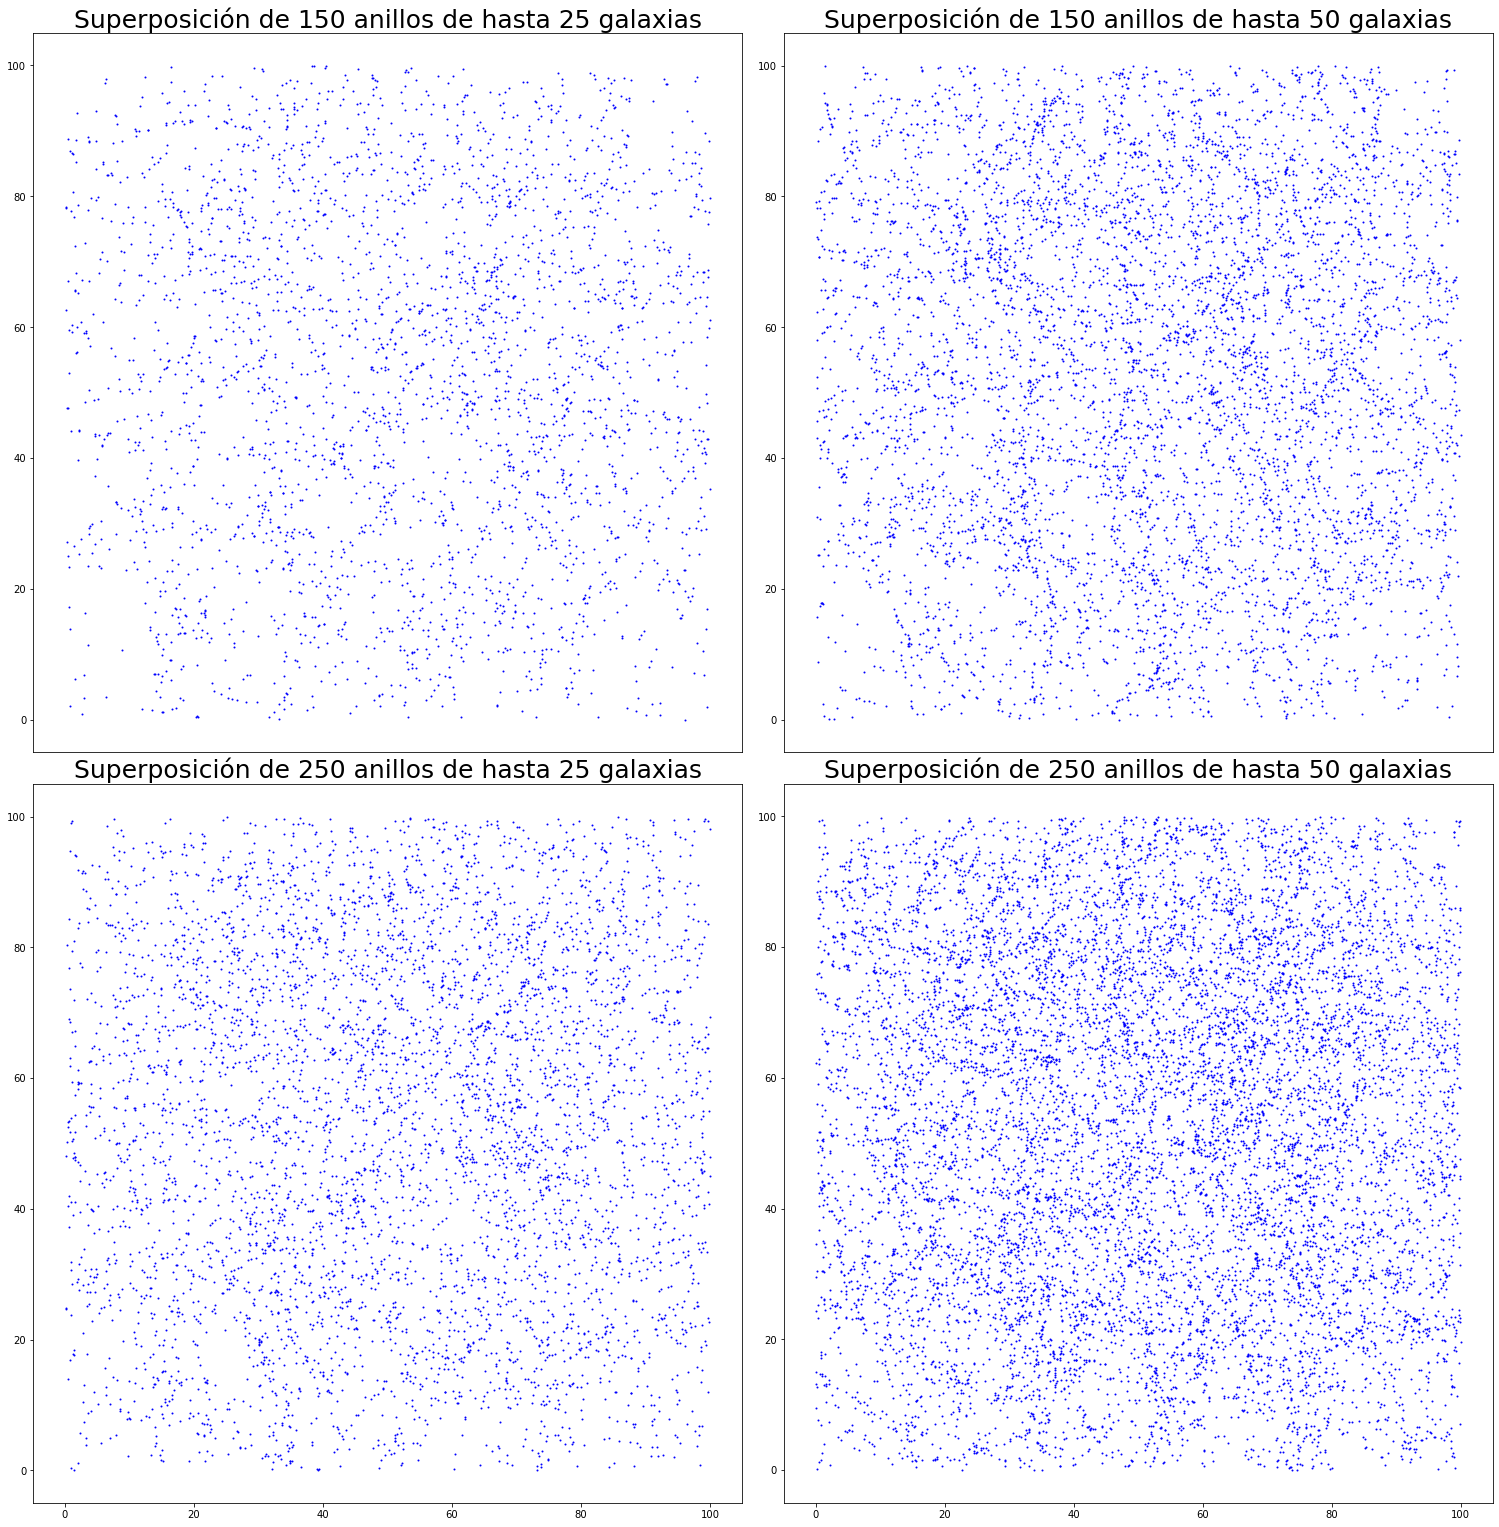

In [17]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,21), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].set_title('Superposición de 150 anillos de hasta 25 galaxias', fontsize = 25)
for cir_poc in circulo_pcpp: 
    axes_cosmo[0,0].scatter(*zip(*cir_poc), color='b', s=1)
axes_cosmo[0,0].get_xaxis().set_visible(False)

axes_cosmo[0,1].set_title('Superposición de 150 anillos de hasta 50 galaxias', fontsize = 25)
for cir_pocos in circulo_pcmp: 
    axes_cosmo[0,1].scatter(*zip(*cir_pocos), color='b', s=1)
axes_cosmo[0,1].get_xaxis().set_visible(False)


axes_cosmo[1,0].set_title('Superposición de 250 anillos de hasta 25 galaxias', fontsize = 25)
for cir_pocos in circulo_Mcpp: 
    axes_cosmo[1,0].scatter(*zip(*cir_pocos), color='b', s=1)

axes_cosmo[1,1].set_title('Superposición de 250 anillos de hasta 50 galaxias', fontsize = 25)
for cir in circulo_Mcmp: 
    axes_cosmo[1,1].scatter(*zip(*cir), color='b', s=1)

Lo ideal es analizar muchos anillos con una cantidad considerable de galaxias para acercarnos más a los datos reales del Universo sin embargo entre más datos, y por ende distancias mayor tiempo computacional se requiere. A continuación un ejemplo más acercado a la realidad.

# Distancia
Para los siguientes calculos usamos la siguiente función para calcular distancias entre dos puntos:
$$d(\bar{x},\bar{y})=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [5]:
#Creamos una función que nos de las distancias entre dos puntos
def distancia(x1, x2):
    diff_x = (x1[0] - x2[0])**2
    diff_y = (x1[1] - x2[1])**2
    r = np.sqrt(diff_x+diff_y)
    return r

A continuación programamos una función que calcula las distancias entre todos los puntos, sin repetir.

In [6]:
#Checar como funciona
def comp_all_distances(sample):
    dist_random = []
    for i, _ in enumerate(sample):
        g = partial(distancia, sample[i]) #partial() recibe una función A con sus respectivos argumentos y retorna una nueva función B que, al ser llamada, equivale a llamar a la función A con los argumentos provistos.
        d = list(map(g, sample[i+1:]))  # Declaración de una lista
        #La función map() toma una función y una lista y aplica esa función a cada elemento de esa lista, produciendo una nueva lista. 
        dist_random.extend(d)
    return dist_random

A continuación, calculamos todas las ditancias de los puntos aleatorios (RR) y posteriormente de los DD

# Resumen Calculos 

### Primero random

In [340]:
rr_ideal = np.random.uniform(low=0.0, high=150.0, size=((3225,2))) 

In [341]:
distance_rr = comp_all_distances(rr_ideal) 

In [342]:
Nr = len(distance_rr)
Nr

5198700

In [343]:
rrandom = [round(r, 0) for r in  distance_rr] #round redondea a 0 decimales
rcount = Counter(rrandom) #registra cuántas veces se agregan valores equivalentes.
sorted_RR = sorted(rcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

### Datos

In [303]:
circulo_ideal, etiqueta_ideal = Puntos_circulos(150, 20, 15, 150, 0.01, 0.2, 1) 
#ncentros, ncircle_points, radio, tcaja, pert, pcenter=0.1, disp_cent=3.0):

total puntos 3225


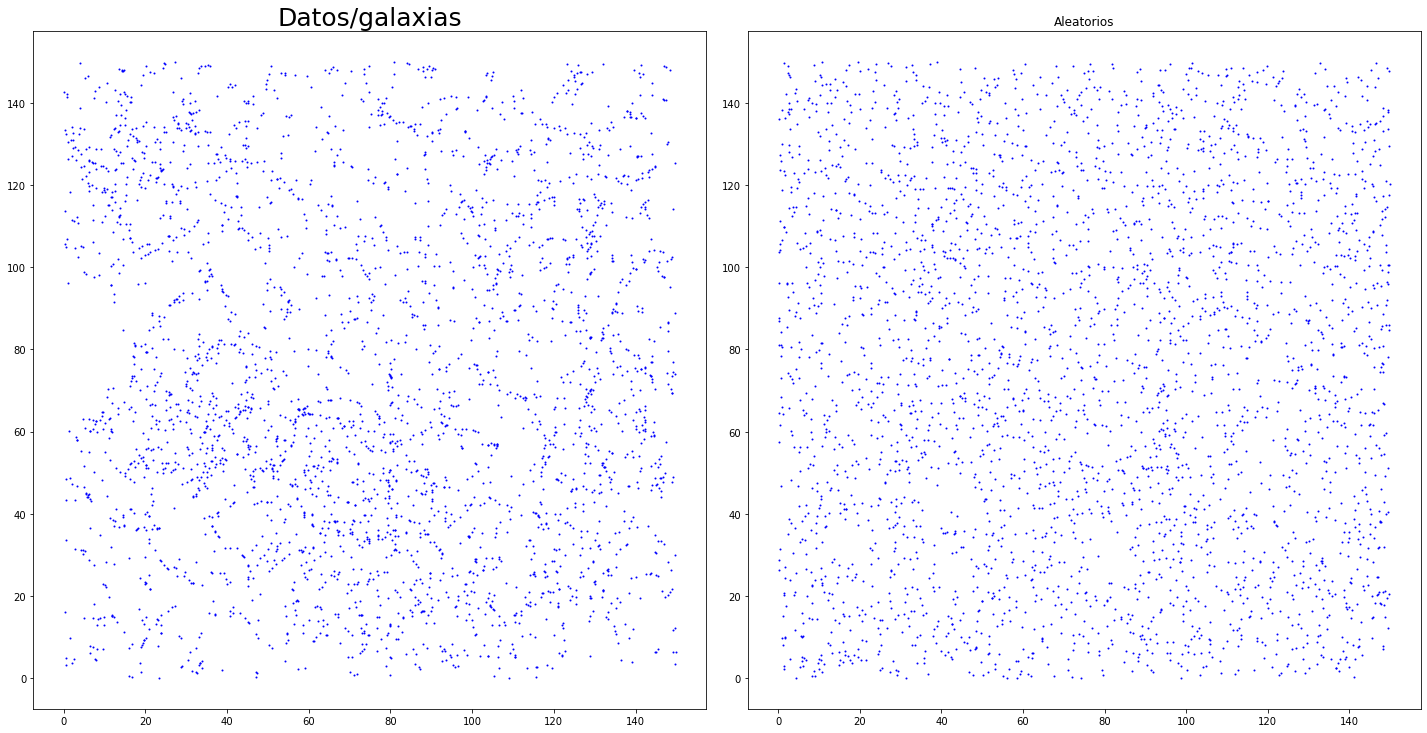

In [304]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('Datos/galaxias', fontsize = 25)
for cir in circulo_ideal: 
    axes_cosmo[0].scatter(*zip(*cir), color='b', s=1)
axes_cosmo[1].set_title('Aleatorios')
axes_cosmo[1].scatter(rr_ideal.T[0], rr_ideal.T[1], color='b', s=1)

In [305]:
DDcirculo = DD(circulo_ideal)
distance_dd = comp_all_distances(DDcirculo)

In [306]:
N= len(distance_dd) 

In [307]:
ddata = [round(r, 0) for r in  distance_dd]
dcount = Counter(ddata)
sorted_DD = sorted(dcount.items())

In [344]:
xDD = [x[0] for x in sorted_DD] #Distancias para DD
yDD = [x[1]/(N**1) for x in sorted_DD] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada
xRR = [x[0] for x in sorted_RR] #Distancias para RR
yRR = [x[1]/(Nr**1) for x in sorted_RR] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada

In [312]:
#radio 25 
circulo_ideal_25, etiqueta_ideal_25 = Puntos_circulos(150, 20, 25, 150, 0.01, 0.2, 1) 

total puntos 2979


In [313]:
DDcirculo_25 = DD(circulo_ideal_25)
distance_dd_25 = comp_all_distances(DDcirculo_25)
N_25= len(distance_dd_25) 

In [314]:
ddata_25 = [round(r, 0) for r in  distance_dd_25]
dcount_25 = Counter(ddata_25)
sorted_DD_25 = sorted(dcount_25.items())

In [329]:
xDD_25 = [x[0] for x in sorted_DD_25] #Distancias para DD
yDD_25 = [x[1]/(N_25**1) for x in sorted_DD_25] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada

In [316]:
#radio 35 
circulo_ideal_35, etiqueta_ideal_35 = Puntos_circulos(150, 23, 35, 150, 0.01, 0.2, 1) 

total puntos 3131


In [317]:
DDcirculo_35 = DD(circulo_ideal_35)
distance_dd_35 = comp_all_distances(DDcirculo_35)
N_35= len(distance_dd_35) 

In [318]:
ddata_35 = [round(r, 0) for r in  distance_dd_35]
dcount_35 = Counter(ddata_35)
sorted_DD_35 = sorted(dcount_35.items())                                                                    

In [330]:
xDD_35 = [x[0] for x in sorted_DD_35] #Distancias para DD
yDD_35 = [x[1]/(N_35**1) for x in sorted_DD_35] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada

In [320]:
#radio 45 
circulo_ideal_45, etiqueta_ideal_45 = Puntos_circulos(150, 25, 45, 150, 0.01, 0.2, 1) 

total puntos 3003


In [321]:
DDcirculo_45 = DD(circulo_ideal_45)
distance_dd_45 = comp_all_distances(DDcirculo_45)
N_45= len(distance_dd_45) 

In [331]:
ddata_45 = [round(r, 0) for r in  distance_dd_45]
dcount_45 = Counter(ddata_45)
sorted_DD_45 = sorted(dcount_45.items())

xDD_45 = [x[0] for x in sorted_DD_45] #Distancias para DD
yDD_45 = [x[1]/(N_45**1) for x in sorted_DD_45] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada

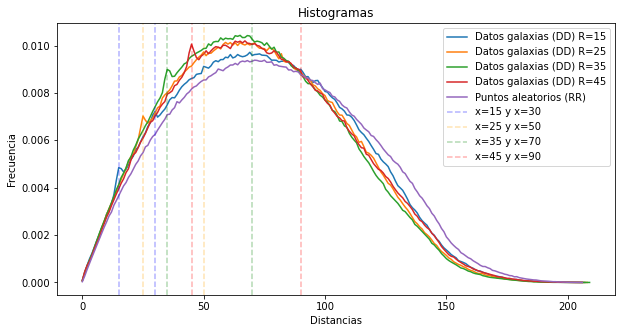

In [345]:
plt.figure(figsize=(10, 5))
plt.plot(xDD, yDD, label='Datos galaxias (DD) R=15')
plt.plot(xDD_25, yDD_25, label='Datos galaxias (DD) R=25')
plt.plot(xDD_35, yDD_35, label='Datos galaxias (DD) R=35')
plt.plot(xDD_45, yDD_45, label='Datos galaxias (DD) R=45')
plt.plot(xRR, yRR, label='Puntos aleatorios (RR)')
plt.axvline(15, color='blue', ls='--', label='x=15 y x=30', alpha=0.3)
plt.axvline(30, color='blue', ls='--', alpha=0.3)
plt.axvline(25, color='orange', ls='--', label='x=25 y x=50', alpha=0.3)
plt.axvline(50, color='orange', ls='--', alpha=0.3)
plt.axvline(35, color='green', ls='--', label='x=35 y x=70', alpha=0.3)
plt.axvline(70, color='green', ls='--', alpha=0.3)
plt.axvline(45, color='red', ls='--', label='x=45 y x=90', alpha=0.3)
plt.axvline(90, color='red', ls='--', alpha=0.3)
plt.xlabel('Distancias')
plt.ylabel('Frecuencia')
plt.title('Histogramas')
#plt.xlim(0,150)
plt.legend()

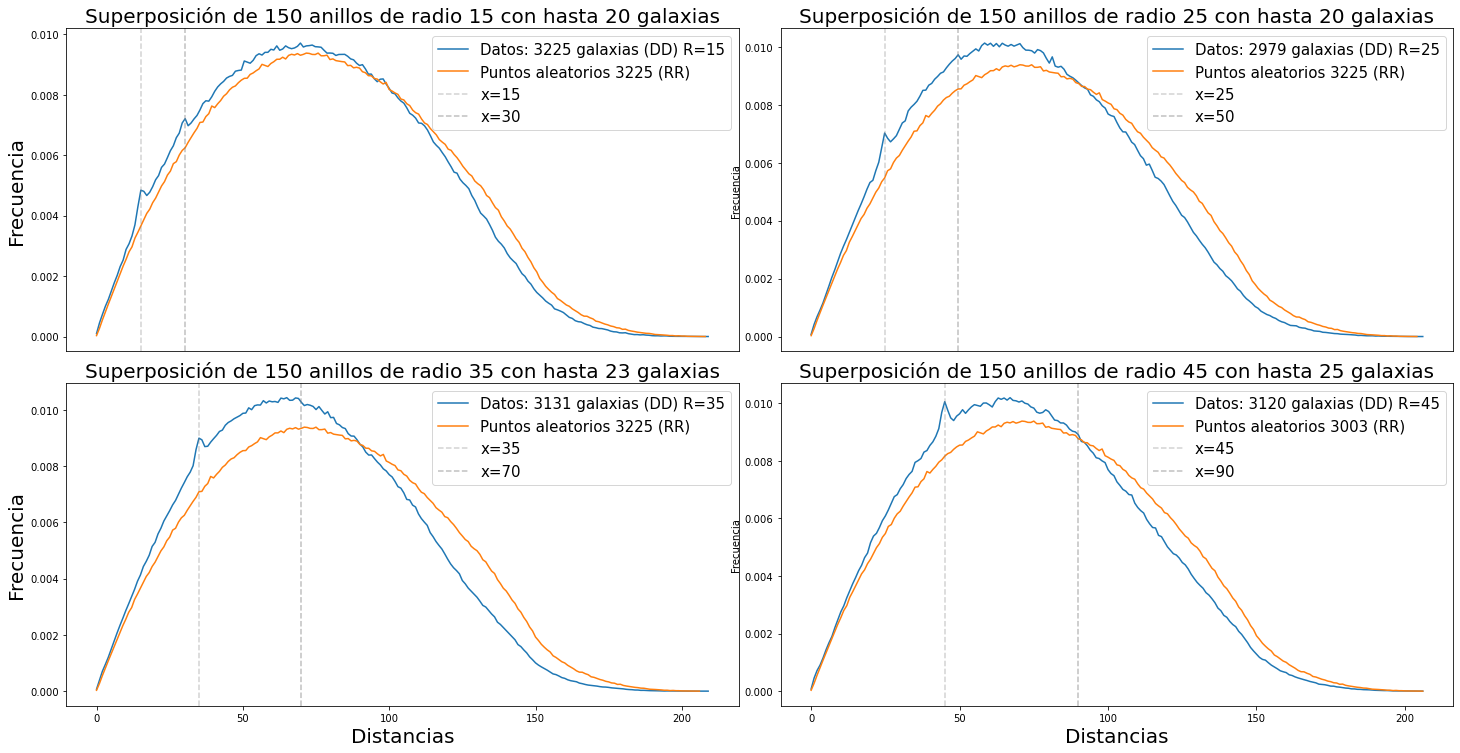

In [346]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].set_title('Superposición de 150 anillos de radio 15 con hasta 20 galaxias', fontsize = 20)
axes_cosmo[0,0].get_xaxis().set_visible(False)
axes_cosmo[0,0].plot(xDD, yDD, label='Datos: 3225 galaxias (DD) R=15')
axes_cosmo[0,0].plot(xRR, yRR, label='Puntos aleatorios 3225 (RR)')
axes_cosmo[0,0].axvline(15, color='gray', ls='--', label='x=15', alpha=0.35)
axes_cosmo[0,0].axvline(30, color='gray', ls='--', label='x=30', alpha=0.5)
axes_cosmo[0,0].set_xlabel('Distancias', fontsize = 20)
axes_cosmo[0,0].set_ylabel('Frecuencia', fontsize = 20)
axes_cosmo[0,0].legend(fontsize = 15)

axes_cosmo[0,1].set_title('Superposición de 150 anillos de radio 25 con hasta 20 galaxias', fontsize = 20)
axes_cosmo[0,1].get_xaxis().set_visible(False)
axes_cosmo[0,1].plot(xDD_25, yDD_25, label='Datos: 2979 galaxias (DD) R=25')
axes_cosmo[0,1].plot(xRR, yRR, label='Puntos aleatorios 3225 (RR)')
axes_cosmo[0,1].axvline(25, color='gray', ls='--', label='x=25', alpha=0.35)
axes_cosmo[0,1].axvline(50, color='gray', ls='--', label='x=50', alpha=0.5)
axes_cosmo[0,1].set_xlabel('Distancias')
axes_cosmo[0,1].set_ylabel('Frecuencia')
axes_cosmo[0,1].legend(fontsize = 15)

axes_cosmo[1,0].set_title('Superposición de 150 anillos de radio 35 con hasta 23 galaxias', fontsize = 20)
axes_cosmo[1,0].plot(xDD_35, yDD_35, label='Datos: 3131 galaxias (DD) R=35')
axes_cosmo[1,0].plot(xRR, yRR, label='Puntos aleatorios 3225 (RR)')
axes_cosmo[1,0].axvline(35, color='gray', ls='--', label='x=35', alpha=0.35)
axes_cosmo[1,0].axvline(70, color='gray', ls='--', label='x=70', alpha=0.5)
axes_cosmo[1,0].set_xlabel('Distancias', fontsize = 20)
axes_cosmo[1,0].set_ylabel('Frecuencia', fontsize = 20)
axes_cosmo[1,0].legend(fontsize = 15)

axes_cosmo[1,1].set_title('Superposición de 150 anillos de radio 45 con hasta 25 galaxias', fontsize = 20)
axes_cosmo[1,1].plot(xDD_45, yDD_45, label='Datos: 3120 galaxias (DD) R=45')
axes_cosmo[1,1].plot(xRR, yRR, label='Puntos aleatorios 3003 (RR)')
axes_cosmo[1,1].axvline(45, color='gray', ls='--', label='x=45', alpha=0.35)
axes_cosmo[1,1].axvline(90, color='gray', ls='--', label='x=90', alpha=0.5)
axes_cosmo[1,1].set_xlabel('Distancias', fontsize = 20)
axes_cosmo[1,1].set_ylabel('Frecuencia')
axes_cosmo[1,1].legend(fontsize = 15)

In [347]:
min_length = min(len(yDD), len(yRR))
s = []
for i in range(min_length):
    s.append((yDD[i]- yRR[i])/yRR[i]) 

In [348]:
min_length_25 = min(len(yDD_25), len(yRR))
s_25 = []
for i in range(min_length_25):
    s_25.append((yDD_25[i]- yRR[i])/yRR[i]) 

In [349]:
min_length_35 = min(len(yDD_35), len(yRR))
s_35 = []
for i in range(min_length_35):
    s_35.append((yDD_35[i]- yRR[i])/yRR[i]) 

In [350]:
min_length_45 = min(len(yDD_45), len(yRR))
s_45 = []
for i in range(min_length_45):
    s_45.append((yDD_45[i]- yRR[i])/yRR[i]) 

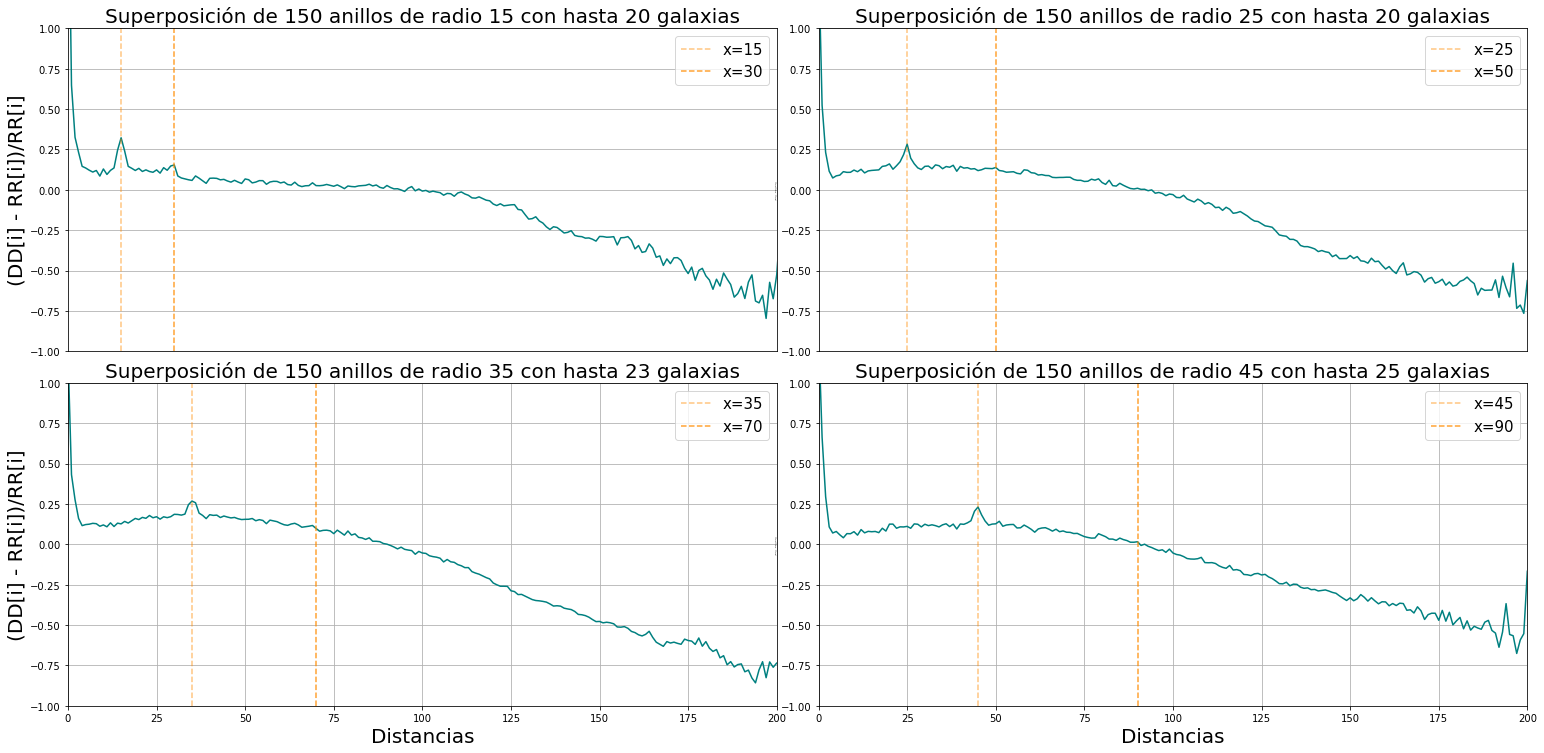

In [352]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,10), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].set_title('Superposición de 150 anillos de radio 15 con hasta 20 galaxias', fontsize = 20)
axes_cosmo[0,0].get_xaxis().set_visible(False)
axes_cosmo[0,0].plot(s, color='teal')
axes_cosmo[0,0].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[0,0].axvline(30, color='darkorange', ls='--', label='x=30', alpha=0.8)
axes_cosmo[0,0].set_ylabel('(DD[i] - RR[i])/RR[i]', fontsize = 20)
axes_cosmo[0,0].set_xlabel('Distancias')
axes_cosmo[0,0].set_xlim(0,200)
axes_cosmo[0,0].set_ylim(-1,1)
axes_cosmo[0,0].legend(fontsize = 15)
axes_cosmo[0,0].grid()

axes_cosmo[0,1].set_title('Superposición de 150 anillos de radio 25 con hasta 20 galaxias', fontsize = 20)
axes_cosmo[0,1].get_xaxis().set_visible(False)
axes_cosmo[0,1].plot(s_25, color='teal')
axes_cosmo[0,1].axvline(25, color='darkorange', ls='--', label='x=25', alpha=0.5)
axes_cosmo[0,1].axvline(50, color='darkorange', ls='--', label='x=50', alpha=0.8)
axes_cosmo[0,1].set_ylabel('(DD[i] - RR[i])/RR[i]', fontsize = 2)
axes_cosmo[0,1].set_xlabel('Distancias')
axes_cosmo[0,1].set_xlim(0,200)
axes_cosmo[0,1].set_ylim(-1,1)
axes_cosmo[0,1].legend(fontsize = 15)
axes_cosmo[0,1].grid()

axes_cosmo[1,0].set_title('Superposición de 150 anillos de radio 35 con hasta 23 galaxias', fontsize = 20)
axes_cosmo[1,0].plot(s_35, color='teal')
axes_cosmo[1,0].axvline(35, color='darkorange', ls='--', label='x=35', alpha=0.5)
axes_cosmo[1,0].axvline(70, color='darkorange', ls='--', label='x=70', alpha=0.8)
axes_cosmo[1,0].set_ylabel('(DD[i] - RR[i])/RR[i]', fontsize = 20)
axes_cosmo[1,0].set_xlabel('Distancias', fontsize = 20)
axes_cosmo[1,0].set_xlim(0,200)
axes_cosmo[1,0].set_ylim(-1,1)
axes_cosmo[1,0].legend(fontsize = 15)
axes_cosmo[1,0].grid()

axes_cosmo[1,1].set_title('Superposición de 150 anillos de radio 45 con hasta 25 galaxias', fontsize = 20)
axes_cosmo[1,1].plot(s_45, color='teal')
axes_cosmo[1,1].axvline(45, color='darkorange', ls='--', label='x=45', alpha=0.5)
axes_cosmo[1,1].axvline(90, color='darkorange', ls='--', label='x=90', alpha=0.8)
axes_cosmo[1,1].set_ylabel('(DD[i] - RR[i])/RR[i]', fontsize = 2)
axes_cosmo[1,1].set_xlabel('Distancias', fontsize = 20)
axes_cosmo[1,1].set_xlim(0,200)
axes_cosmo[1,1].set_ylim(-1,1)
axes_cosmo[1,1].legend(fontsize = 15)
axes_cosmo[1,1].grid()

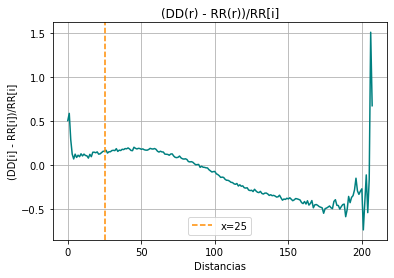

In [140]:
plt.plot(s, color='teal')
plt.grid()
plt.xlabel('Distancias')
plt.ylabel('(DD[i] - RR[i])/RR[i]')
plt.title('(DD(r) - RR(r))/RR[i]')
plt.axvline(25, color='darkorange', ls='--', label='x=25')
#plt.ylim(-0.5, -0.2)   #the result when random - random for 700 points
#plt.xlim(0,75)
plt.legend()

# Solo aleatorios

In [81]:
#cuando queremos d -> sea aleatorio
cir_ideal = np.random.uniform(low=0.0, high=200.0, size=((3000,2)))
rr_ideal  = np.random.uniform(low=0.0, high=200.0, size=((3000,2)))

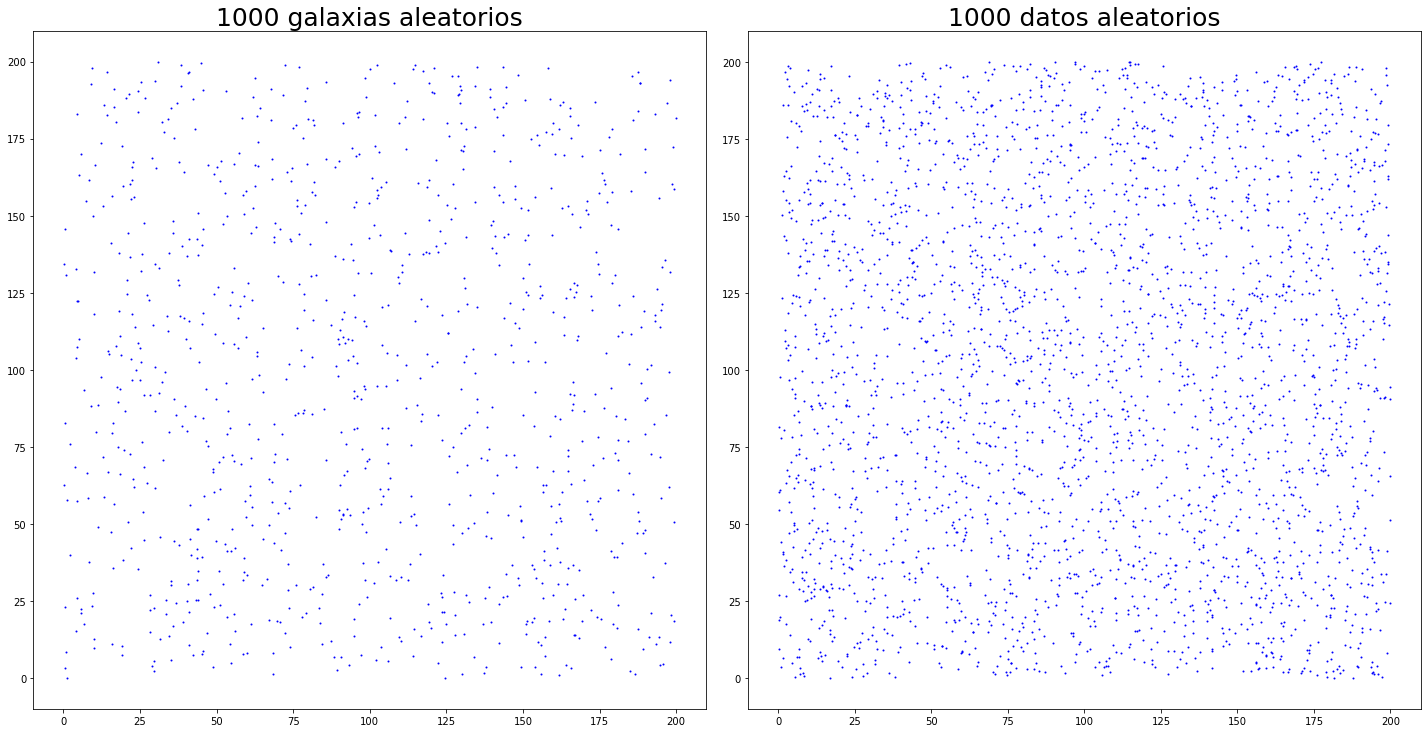

In [65]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('1000 galaxias aleatorios', fontsize = 25)
axes_cosmo[0].scatter(cir_ideal.T[0], cir_ideal.T[1], color='b', s=1)

axes_cosmo[1].set_title('1000 datos aleatorios', fontsize = 25)
axes_cosmo[1].scatter(rr_ideal.T[0], rr_ideal.T[1], color='b', s=1)

In [82]:
distance_rr = comp_all_distances(rr_ideal) 

In [83]:
rrandom = [round(r, 0) for r in  distance_rr] #round redondea a 0 decimales
rcount = Counter(rrandom) #registra cuántas veces se agregan valores equivalentes.
sorted_RR = sorted(rcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [84]:
distance_dd = comp_all_distances(cir_ideal)

In [85]:
ddata = [round(r, 0) for r in  distance_dd]
dcount = Counter(ddata)
sorted_DD = sorted(dcount.items())

In [86]:
Nr, N = len(distance_rr), len(distance_dd) 
Nr, N

(4498500, 4498500)

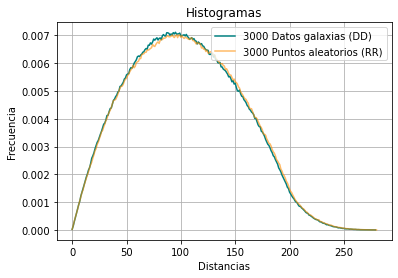

In [87]:
xDD = [x[0] for x in sorted_DD] #Distancias para DD
yDD = [x[1]/(N**1) for x in sorted_DD] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada
xRR = [x[0] for x in sorted_RR] #Distancias para RR
yRR = [x[1]/(Nr**1) for x in sorted_RR] # Cantidad de veces que se reppite cada distancia al cuadrado normalizada
plt.plot(xDD, yDD, label='3000 Datos galaxias (DD)', color='teal')
plt.plot(xRR, yRR, label='3000 Puntos aleatorios (RR)', color='darkorange', alpha=0.6)
#plt.axvline(25, color='gray', ls='--', label='x=25')
plt.xlabel('Distancias')
plt.ylabel('Frecuencia')
plt.title('Histogramas')
#plt.xlim(0,100)
plt.grid()
plt.legend()

Ahora, la forma más sencilla de estimar la función de correlación de dos puntos $\xi(r)$ :
$$\xi(r)=\frac{\hat{DD}}{\hat{RR}}-1 $$
donde DD es la distribución de distancias de pares de galaxias dentro de un conjunto de datos, y RR la distribución de distancias de un conjunto aleatorio. Si $\xi(r)=0$ la distribución de galaxias en los datos también es aleatoria; $\xi(r)>0$ existe una sobredensidad y, contrariamente, para $\xi(r)<0$ una infradensidad.
Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos
en un rango de distancia entre el campo objetivo y el campo de comparación. Se
define como:
$$ξ_{PH} (r) = \left(\frac{N_r}{N}\right)^2\frac{DD(r)}{RR(r)}− 1$$

In [88]:
min_length = min(len(yDD), len(yRR))
s = []
for i in range(min_length):
    s.append((yDD[i]- yRR[i])/yRR[i])

In [89]:
# La diferencia funciona, pero la razon tiene problemas. i.e. yRR hay pocos valores para distancias cortas y grandes
# Mas random aumenta la resolucion

No handles with labels found to put in legend.


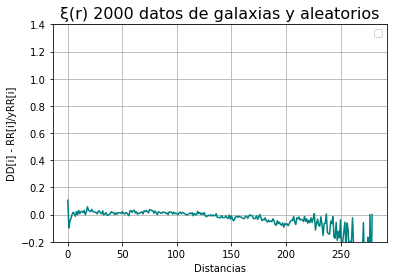

In [90]:
plt.plot(s, color='teal')
plt.grid()
plt.xlabel('Distancias')
plt.ylabel('DD[i] - RR[i]/yRR[i]')
plt.title('ξ(r) 2000 datos de galaxias y aleatorios', fontsize = 16)
#plt.axvline(25, color='darkorange', ls='--', label='x=25')
plt.ylim(-.2, 1.4)   #the result when random - random for 700 points
#plt.xlim(0,75)
plt.legend()

In [18]:
np.max(distance_rr)

272.40968572226325

In [91]:
# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
c = np.concatenate((cir_ideal, rr_ideal))

#Obtenemos las distancias de todos los datos contra todos
distance_all_aleatorios = comp_all_distances(c)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_aleatorios = [round(r, 0) for r in  distance_all_aleatorios] #round redonde a 0 decimales
allcount_aleatorios = Counter(allrandom_aleatorios) #registra cuántas veces se agregan valores equivalentes.
sorted_all_aleatorios = sorted(allcount_aleatorios.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_aleatorios = []
for i in range(250):
    DD_aleatorios.append(dcount[i]/((N*(N-1))/2))
    
RR_aleatorios = []
for i in range(250):
    RR_aleatorios.append(rcount[i]/((Nr*(Nr-1))/2))
    
DR_aleatorios = []
for i in range(250):
    DR_aleatorios.append(allcount_aleatorios[i]/(Nr*N)) 

In [54]:
ξ_PH_aleatorios = []
for i in range(250):
    ξ_PH_aleatorios.append(((DD_aleatorios[i]/RR_aleatorios[i]) -1))
    
ξ_DP_aleatorios = []
for i in range(250):
    ξ_DP_aleatorios.append(((DD_aleatorios[i]/DR_aleatorios[i]) -1))
    
ξ_H_aleatorios = []
for i in range(250):
    ξ_H_aleatorios.append(((DD_aleatorios[i]*RR_aleatorios[i])/((DR_aleatorios[i])**2))-1)
    
ξ_LS_aleatorios = []
for i in range(250):
    ξ_LS_aleatorios.append(((DD_aleatorios[i]-(2*DR_aleatorios[i])+RR_aleatorios[i])/RR_aleatorios[i]))
    
ξ_He_aleatorios = []
for i in range(250):
    ξ_He_aleatorios.append(((DD_aleatorios[i]-DR_aleatorios[i])/RR_aleatorios[i]))

Text(0.5, 1.0, 'Función de correlación ξ(r) de superposición de distribuciones aleatorias de 1000 puntos')

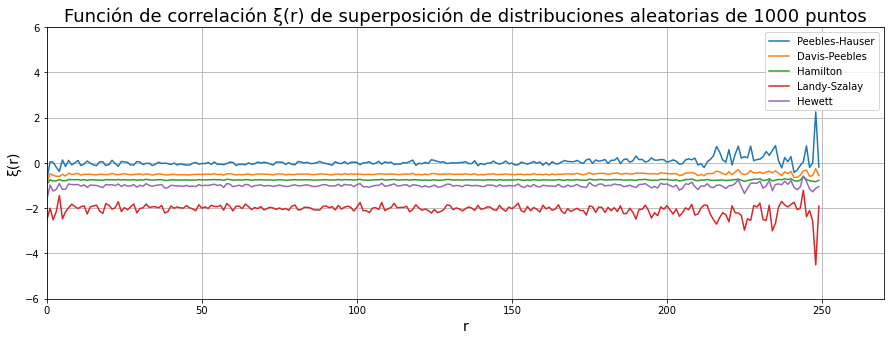

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(ξ_PH_aleatorios, label='Peebles-Hauser')
plt.plot(ξ_DP_aleatorios, label='Davis-Peebles')
plt.plot(ξ_H_aleatorios, label='Hamilton')
plt.plot(ξ_LS_aleatorios, label='Landy-Szalay')
plt.plot(ξ_He_aleatorios, label='Hewett')
plt.grid()
plt.legend()
plt.ylim(-6,6)
plt.xlim(0,270)
plt.xlabel('r', fontsize = 14)
plt.ylabel('ξ(r)', fontsize = 14)
plt.title('Función de correlación ξ(r) de superposición de distribuciones aleatorias de 1000 puntos', fontsize = 18)

In [92]:
ξ_PH_aleatorios = []
for i in range(250):
    ξ_PH_aleatorios.append(((DD_aleatorios[i]/RR_aleatorios[i]) -1))
    
ξ_DP_aleatorios = []
for i in range(250):
    ξ_DP_aleatorios.append(((DD_aleatorios[i]/DR_aleatorios[i]) -1)+0.5)
    
ξ_H_aleatorios = []
for i in range(250):
    ξ_H_aleatorios.append(((DD_aleatorios[i]*RR_aleatorios[i])/((DR_aleatorios[i])**2))-1+.75 )
    
ξ_LS_aleatorios = []
for i in range(250):
    ξ_LS_aleatorios.append(((DD_aleatorios[i]-(2*DR_aleatorios[i])+RR_aleatorios[i])/RR_aleatorios[i])+2)
    
ξ_He_aleatorios = []
for i in range(250):
    ξ_He_aleatorios.append(((DD_aleatorios[i]-DR_aleatorios[i])/RR_aleatorios[i])+1)

Text(0.5, 1.0, 'ξ(r) de distribuciones aleatorias de 3000 puntos')

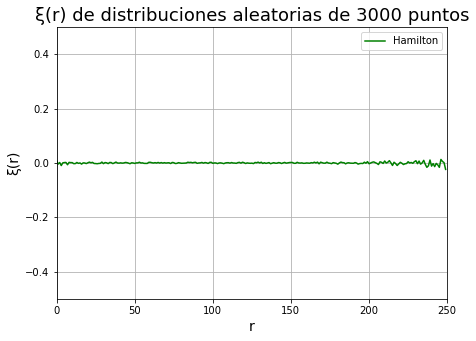

In [109]:
plt.figure(figsize=(7, 5))
#plt.plot(ξ_PH_aleatorios, label='Peebles-Hauser', color='blue')
#plt.plot(ξ_DP_aleatorios, label='Davis-Peebles', color='darkorange')
plt.plot(ξ_H_aleatorios, label='Hamilton', color='green')
#plt.plot(ξ_LS_aleatorios, label='Landy-Szalay', color='red')
#plt.plot(ξ_He_aleatorios, label='Hewett', color='mediumpurple')
plt.grid()
plt.legend()
plt.ylim(-.5,.5)
plt.xlim(0,250)
plt.xlabel('r', fontsize = 14)
plt.ylabel('ξ(r)', fontsize = 14)
plt.title('ξ(r) de distribuciones aleatorias de 3000 puntos', fontsize = 18)

Text(0.5, 24.0, 'r')

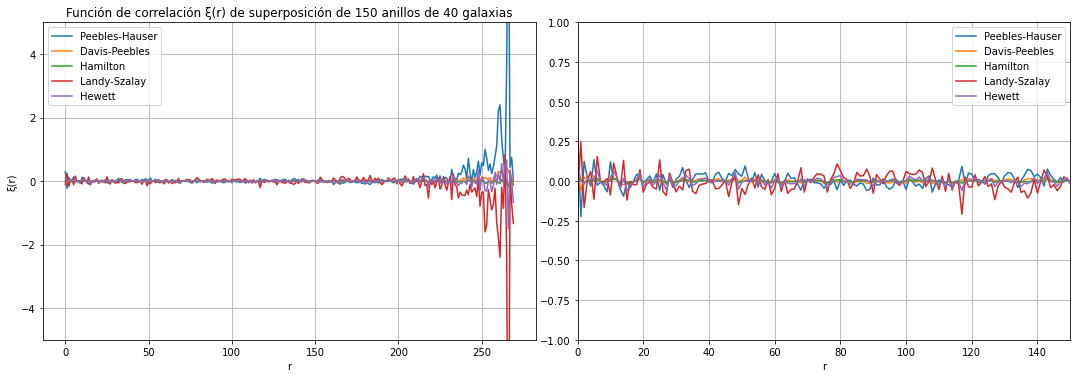

In [237]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(15,5), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_aleatorios, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_aleatorios, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_aleatorios, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_aleatorios, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_aleatorios, label='Hewett')
#axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_ylim(-5,5)
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 150 anillos de 40 galaxias')

axes_cosmo[1].plot(ξ_PH_aleatorios, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_aleatorios, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_aleatorios, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_aleatorios, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_aleatorios, label='Hewett')
#axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,150)
axes_cosmo[1].set_ylim(-1,1)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

## Histogramas
A continuación, en la primer gráfica, utilizamos **density=True**, normaliza las alturas de los contenedores de modo que la integral del histograma es 1. El histograma resultante es una aproximación de la función de densidad de probabilidad.

In [2017]:
#plt.figure()
#plt.hist(distance_dd, bins=120, alpha=0.5, label='Datos DD', density=True)
#plt.hist(distance_rr, bins=120, alpha=0.5, label='Puntos aleatorios RR', density=True)
#plt.xlabel('Distancias')
#plt.ylabel('Densidad')
#plt.title('Histogramas')
#plt.grid()
#plt.legend()
#plt.show()

In [2018]:
#sns.displot(distance_dd, bins=100, kde=True).set(title='Datos galaxias');
#sns.displot(distance_rr, bins=100, kde=True).set(title='Puntos aleatorios');

A continuación repetimos para los 4 ejemplos establecidos 

In [20]:
distance_rr_pcpp = comp_all_distances(rr_pcpp)
distance_dd_pcpp = comp_all_distances(DDcirculo_pcpp)
print(len(distance_rr_pcpp))

rrandom_pcpp = [round(r, 0) for r in  distance_rr_pcpp] #round redonde a 0 decimales
rcount_pcpp = Counter(rrandom_pcpp) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_pcpp = sorted(rcount_pcpp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_pcpp = [round(r, 0) for r in  distance_dd_pcpp]
dcount_pcpp = Counter(ddata_pcpp)
sorted_DD_pcpp = sorted(dcount_pcpp.items())

xDD_pcpp = [x[0] for x in sorted_DD_pcpp] #Distancias para DD
yDD_pcpp = [x[1]/(N_pcpp**2) for x in sorted_DD_pcpp] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_pcpp = [x[0] for x in sorted_RR_pcpp] #Distancias para RR
yRR_pcpp = [x[1]/(Nr_pcpp**2) for x in sorted_RR_pcpp] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length = min(len(yDD_pcpp), len(yRR_pcpp))
s_pcpp = []
for i in range(min_length):
    s_pcpp.append((yDD_pcpp[i]- yRR_pcpp[i])/yRR_pcpp[i])

11005086


In [21]:
distance_rr_pcmp = comp_all_distances(rr_pcmp)
distance_dd_pcmp = comp_all_distances(DDcirculo_pcmp)
print(len(distance_rr_pcmp))

rrandom_pcmp = [round(r, 0) for r in  distance_rr_pcmp] #round redonde a 0 decimales
rcount_pcmp = Counter(rrandom_pcmp) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_pcmp = sorted(rcount_pcmp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_pcmp = [round(r, 0) for r in  distance_dd_pcmp]
dcount_pcmp = Counter(ddata_pcmp)
sorted_DD_pcmp = sorted(dcount_pcmp.items())

xDD_pcmp = [x[0] for x in sorted_DD_pcmp] #Distancias para DD
yDD_pcmp = [x[1]/(N_pcmp**2) for x in sorted_DD_pcmp] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_pcmp = [x[0] for x in sorted_RR_pcmp] #Distancias para RR
yRR_pcmp = [x[1]/(Nr_pcmp**2) for x in sorted_RR_pcmp] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length = min(len(yDD_pcmp), len(yRR_pcmp))
s_pcmp = []
for i in range(min_length):
    s_pcmp.append((yDD_pcmp[i]- yRR_pcmp[i])/yRR_pcmp[i])

46392528


In [22]:
distance_rr_Mcpp = comp_all_distances(rr_Mcpp)
distance_dd_Mcpp = comp_all_distances(DDcirculo_Mcpp)
print(len(distance_rr_Mcpp))

31224753


In [23]:
rrandom_Mcpp = [round(r, 0) for r in  distance_rr_Mcpp] #round redonde a 0 decimales
rcount_Mcpp = Counter(rrandom_Mcpp) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_Mcpp = sorted(rcount_Mcpp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [24]:
ddata_Mcpp = [round(r, 0) for r in  distance_dd_Mcpp]
dcount_Mcpp = Counter(ddata_Mcpp)
sorted_DD_Mcpp = sorted(dcount_Mcpp.items())

In [25]:
xDD_Mcpp = [x[0] for x in sorted_DD_Mcpp] #Distancias para DD
yDD_Mcpp = [x[1]/(N_Mcpp**2) for x in sorted_DD_Mcpp] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_Mcpp = [x[0] for x in sorted_RR_Mcpp] #Distancias para RR
yRR_Mcpp = [x[1]/(Nr_Mcpp**2) for x in sorted_RR_Mcpp] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length = min(len(yDD_Mcpp), len(yRR_Mcpp))
s_Mcpp = []
for i in range(min_length):
    s_Mcpp.append((yDD_Mcpp[i]- yRR_Mcpp[i])/yRR_Mcpp[i])

In [26]:
distance_rr_Mcmp = comp_all_distances(rr_Mcmp)
distance_dd_Mcmp = comp_all_distances(DDcirculo_Mcmp)
print(len(distance_rr_Mcmp))

128664861


In [27]:
rrandom_Mcmp = [round(r, 0) for r in  distance_rr_Mcmp] #round redonde a 0 decimales
rcount_Mcmp = Counter(rrandom_Mcmp) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_Mcmp = sorted(rcount_Mcmp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [28]:
ddata_Mcmp = [round(r, 0) for r in  distance_dd_Mcmp]
dcount_Mcmp = Counter(ddata_Mcmp)
sorted_DD_Mcmp = sorted(dcount_Mcmp.items())

In [29]:
xDD_Mcmp = [x[0] for x in sorted_DD_Mcmp] #Distancias para DD
yDD_Mcmp = [x[1]/(N_Mcmp**2) for x in sorted_DD_Mcmp] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_Mcmp = [x[0] for x in sorted_RR_Mcmp] #Distancias para RR
yRR_Mcmp = [x[1]/(Nr_Mcmp**2) for x in sorted_RR_Mcmp] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length = min(len(yDD_Mcmp), len(yRR_Mcmp))
s_Mcmp = []
for i in range(min_length):
    s_Mcmp.append((yDD_Mcmp[i]- yRR_Mcmp[i])/yRR_Mcmp[i])

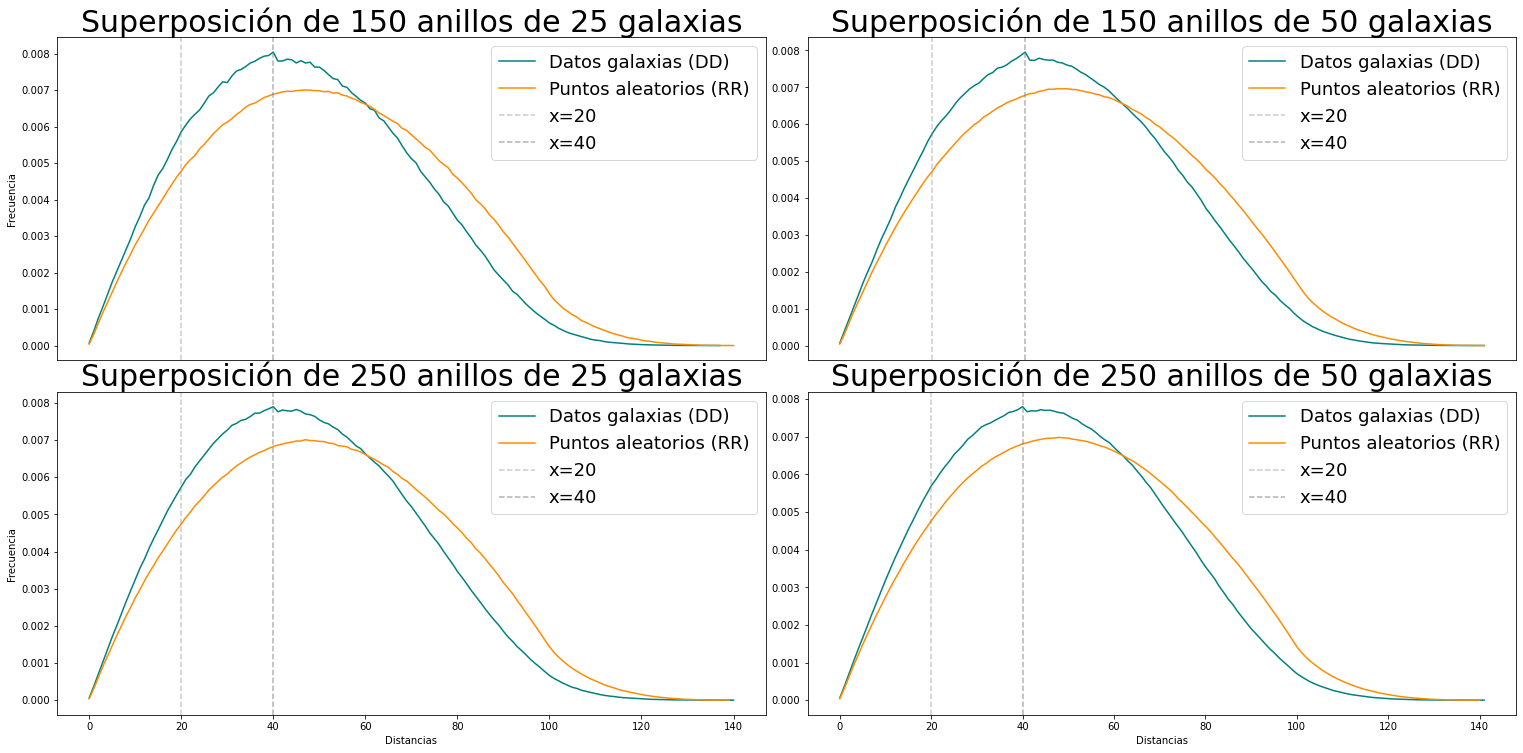

In [30]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,10), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].set_title('Superposición de 150 anillos de 25 galaxias', fontsize = 30)
axes_cosmo[0,0].get_xaxis().set_visible(False)
axes_cosmo[0,0].plot(xDD_pcpp, yDD_pcpp, label='Datos galaxias (DD)', color='teal')
axes_cosmo[0,0].plot(xRR_pcpp, yRR_pcpp, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[0,0].axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
axes_cosmo[0,0].axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
axes_cosmo[0,0].set_ylabel('Frecuencia')
axes_cosmo[0,0].legend(fontsize = 18)

axes_cosmo[0,1].set_title('Superposición de 150 anillos de 50 galaxias', fontsize = 30)
axes_cosmo[0,1].get_xaxis().set_visible(False)
axes_cosmo[0,1].plot(xDD_pcmp, yDD_pcmp, label='Datos galaxias (DD)', color='teal')
axes_cosmo[0,1].plot(xRR_pcmp, yRR_pcmp, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[0,1].axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
axes_cosmo[0,1].axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
axes_cosmo[0,1].legend(fontsize = 18)

axes_cosmo[1,0].set_title('Superposición de 250 anillos de 25 galaxias', fontsize = 30)
axes_cosmo[1,0].plot(xDD_Mcpp, yDD_Mcpp, label='Datos galaxias (DD)', color='teal')
axes_cosmo[1,0].plot(xRR_Mcpp, yRR_Mcpp, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[1,0].axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
axes_cosmo[1,0].axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
axes_cosmo[1,0].set_ylabel('Frecuencia')
axes_cosmo[1,0].set_xlabel('Distancias')
axes_cosmo[1,0].legend(fontsize = 18)

axes_cosmo[1,1].set_title('Superposición de 250 anillos de 50 galaxias', fontsize = 30)
axes_cosmo[1,1].plot(xDD_Mcmp, yDD_Mcmp, label='Datos galaxias (DD)', color='teal')
axes_cosmo[1,1].plot(xRR_Mcmp, yRR_Mcmp, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[1,1].axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
axes_cosmo[1,1].axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
axes_cosmo[1,1].set_xlabel('Distancias')
axes_cosmo[1,1].legend(fontsize = 18)

(-0.5, 0.5)

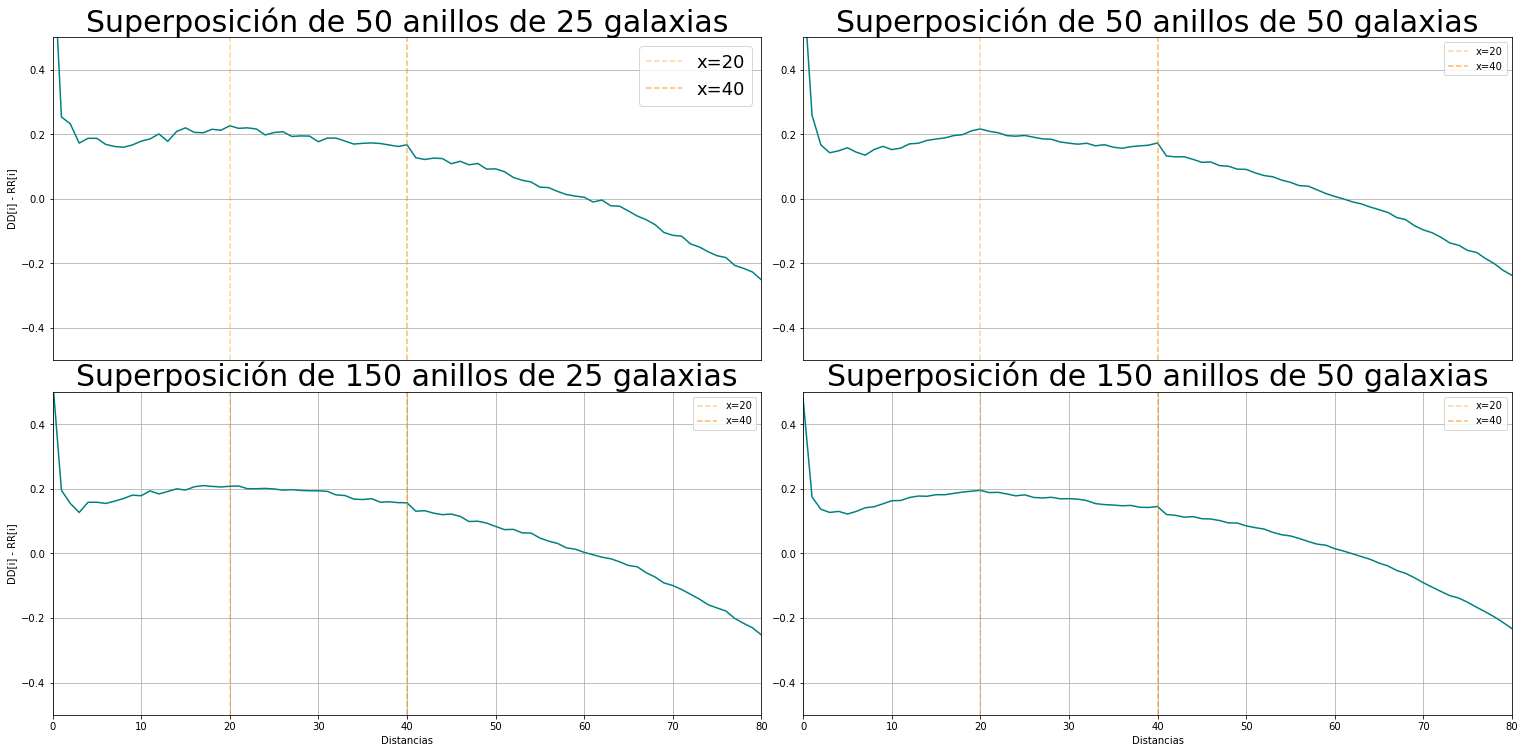

In [33]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,10), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].set_title('Superposición de 50 anillos de 25 galaxias', fontsize = 30)
axes_cosmo[0,0].get_xaxis().set_visible(False)
axes_cosmo[0,0].plot(s_pcpp, color='teal')
axes_cosmo[0,0].grid()
axes_cosmo[0,0].set_ylabel('DD[i] - RR[i]')
axes_cosmo[0,0].axvline(20, color='darkorange', ls='--', label='x=20', alpha=0.4)
axes_cosmo[0,0].axvline(40, color='darkorange', ls='--', label='x=40', alpha=0.6)
axes_cosmo[0,0].legend(fontsize = 18)
axes_cosmo[0,0].set_xlim(0,80)
axes_cosmo[0,0].set_ylim(-.5,.5)

axes_cosmo[0,1].set_title('Superposición de 50 anillos de 50 galaxias', fontsize = 30)
axes_cosmo[0,1].get_xaxis().set_visible(False)
axes_cosmo[0,1].plot(s_pcmp, color='teal')
axes_cosmo[0,1].grid()
axes_cosmo[0,1].axvline(20, color='darkorange', ls='--', label='x=20', alpha=0.4)
axes_cosmo[0,1].axvline(40, color='darkorange', ls='--', label='x=40', alpha=0.6)
axes_cosmo[0,1].legend()
axes_cosmo[0,1].set_xlim(0,80)
axes_cosmo[0,1].set_ylim(-.5,.5)

axes_cosmo[1,0].set_title('Superposición de 150 anillos de 25 galaxias', fontsize = 30)
axes_cosmo[1,0].plot(s_Mcpp, color='teal')
axes_cosmo[1,0].grid()
axes_cosmo[1,0].set_ylabel('DD[i] - RR[i]')
axes_cosmo[1,0].set_xlabel('Distancias')
axes_cosmo[1,0].axvline(20, color='darkorange', ls='--', label='x=20', alpha=0.4)
axes_cosmo[1,0].axvline(40, color='darkorange', ls='--', label='x=40', alpha=0.6)
axes_cosmo[1,0].legend()
axes_cosmo[1,0].set_xlim(0,80)
axes_cosmo[1,0].set_ylim(-.5,.5)

axes_cosmo[1,1].set_title('Superposición de 150 anillos de 50 galaxias', fontsize = 30)
axes_cosmo[1,1].plot(s_Mcmp, color='teal')
axes_cosmo[1,1].grid()
axes_cosmo[1,1].set_xlabel('Distancias')
axes_cosmo[1,1].axvline(20, color='darkorange', ls='--', label='x=20', alpha=0.4)
axes_cosmo[1,1].axvline(40, color='darkorange', ls='--', label='x=40', alpha=0.6)
axes_cosmo[1,1].legend()
axes_cosmo[1,1].set_xlim(0,80)
axes_cosmo[1,1].set_ylim(-.5,.5)

### Ahora comparamos con diferentes perturbaciones 

In [7]:
#Muchos circulos, pocos puntos, 0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp_0, etiqueta_Mcpp_= Puntos_circulos(150, 50, 20, 150,0, 0.1)
DDcirculo_Mcpp_0 = DD(circulo_Mcpp_0)
N_Mcpp_0 = len(DDcirculo_Mcpp_0)
rr_Mcpp_0 = np.random.uniform(low=0.0, high=150.0, size=((int(N_Mcpp_0*1.5),2)))
Nr_Mcpp_0 = len(rr_Mcpp_0)

total puntos 7031


In [8]:
#Muchos circulos, pocos puntos, 0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp_2_5, etiqueta_Mcpp_2_5= Puntos_circulos(150, 50, 20, 150,0.025, 0.1)
DDcirculo_Mcpp_2_5 = DD(circulo_Mcpp_2_5)
N_Mcpp_2_5 = len(DDcirculo_Mcpp_2_5)
rr_Mcpp_2_5 = np.random.uniform(low=0.0, high=150.0, size=((int(N_Mcpp_0*1.5),2)))
Nr_Mcpp_2_5 = len(rr_Mcpp_2_5)

total puntos 7034


In [9]:
#Muchos circulos, pocos puntos, 0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp_5, etiqueta_Mcpp_5 = Puntos_circulos(150, 50, 20, 150,.05)
DDcirculo_Mcpp_5 = DD(circulo_Mcpp_5)
N_Mcpp_5 = len(DDcirculo_Mcpp_5)
rr_Mcpp_5 = np.random.uniform(low=0.0, high=150.0, size=((int(N_Mcpp_5*1.5),2)))
Nr_Mcpp_5 = len(rr_Mcpp_5)

total puntos 7036


In [10]:
#Muchos circulos, pocos puntos, 0 perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp_7_5, etiqueta_Mcpp_7_5= Puntos_circulos(150, 50, 20, 150,0.075, 0.1)
DDcirculo_Mcpp_7_5 = DD(circulo_Mcpp_7_5)
N_Mcpp_7_5 = len(DDcirculo_Mcpp_7_5)
rr_Mcpp_7_5 = np.random.uniform(low=0.0, high=150.0, size=((int(N_Mcpp_0*1.5),2)))
Nr_Mcpp_7_5 = len(rr_Mcpp_7_5)

total puntos 7029


In [11]:
#Muchos circulos, pocos puntos, 10% perturbacion
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_Mcpp_10, etiqueta_Mcpp_10 = Puntos_circulos(150, 50, 20, 150,.1)
DDcirculo_Mcpp_10 = DD(circulo_Mcpp_10)
N_Mcpp_10 = len(DDcirculo_Mcpp_10)
rr_Mcpp_10 = np.random.uniform(low=0.0, high=150.0, size=((int(N_Mcpp_10*1.5),2)))
Nr_Mcpp_10 = len(rr_Mcpp_10)

total puntos 7039


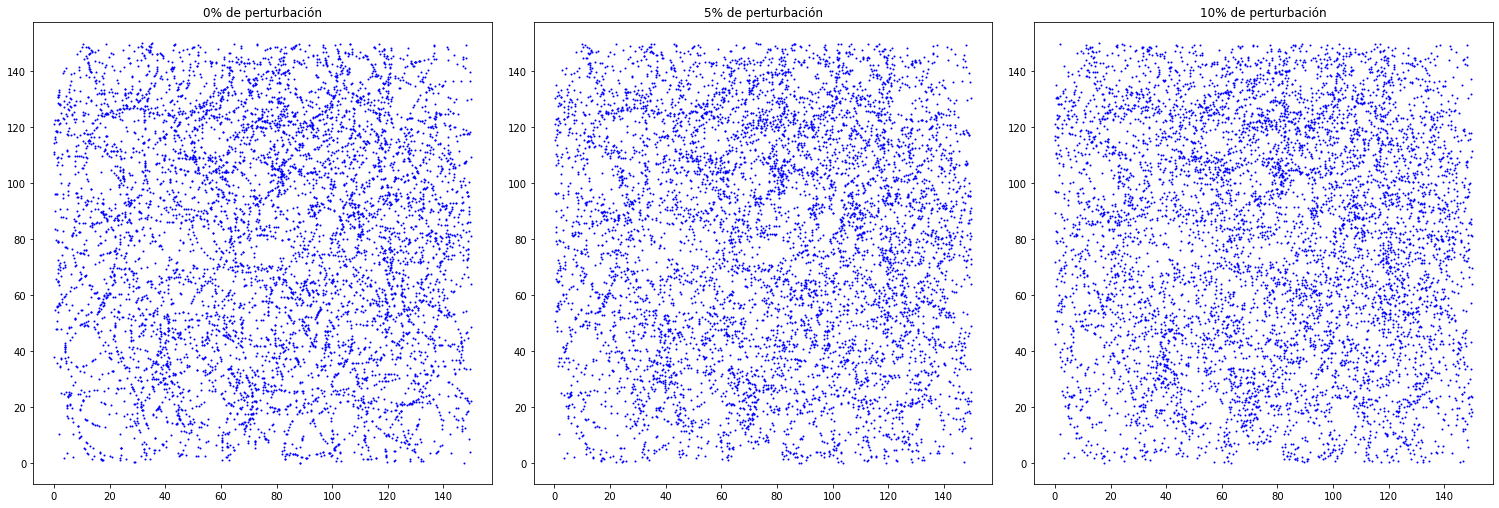

In [12]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,7), nrows=1, ncols=3)
plt.tight_layout()

axes_cosmo[0].set_title('0% de perturbación')
for cir_Mcpp_0 in circulo_Mcpp_0: 
    axes_cosmo[0].scatter(*zip(*cir_Mcpp_0), color='b', s=1)

axes_cosmo[1].set_title('5% de perturbación')
for cir_Mcpp_5 in circulo_Mcpp_5: 
    axes_cosmo[1].scatter(*zip(*cir_Mcpp_5), color='b', s=1)
    
axes_cosmo[2].set_title('10% de perturbación')
for cir_Mcpp_10 in circulo_Mcpp_10: 
    axes_cosmo[2].scatter(*zip(*cir_Mcpp_10), color='b', s=1)

In [13]:
N_Mcpp_0 = len(DDcirculo_Mcpp_0)
Nr_Mcpp_0 = len(rr_Mcpp_0)

distance_rr_Mcpp_0 = comp_all_distances(rr_Mcpp_0)
distance_dd_Mcpp_0 = comp_all_distances(DDcirculo_Mcpp_0)
print(len(distance_rr_Mcpp_0))

rrandom_Mcpp_0 = [round(r, 0) for r in  distance_rr_Mcpp_0] #round redonde a 0 decimales
rcount_Mcpp_0 = Counter(rrandom_Mcpp_0) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_Mcpp_0 = sorted(rcount_Mcpp_0.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_Mcpp_0 = [round(r, 0) for r in  distance_dd_Mcpp_0]
dcount_Mcpp_0 = Counter(ddata_Mcpp_0)
sorted_DD_Mcpp_0 = sorted(dcount_Mcpp_0.items())

xDD_Mcpp_0 = [x[0] for x in sorted_DD_Mcpp_0] #Distancias para DD
yDD_Mcpp_0 = [x[1]/(N_Mcpp_0**2) for x in sorted_DD_Mcpp_0] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_Mcpp_0 = [x[0] for x in sorted_RR_Mcpp_0] #Distancias para RR
yRR_Mcpp_0 = [x[1]/(Nr_Mcpp_0**2) for x in sorted_RR_Mcpp_0] # Cantidad de veces que se reppite cada distancia al cuadrado

s_Mcpp_0 = []
for i in range(len(yDD_Mcpp_0)):
    s_Mcpp_0.append((yDD_Mcpp_0[i]- yRR_Mcpp_0[i])/yRR_Mcpp_0[i])

55603785


In [14]:
# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcpp_0 = DDcirculo_Mcpp_0
all_data_Mcpp_0.extend(rr_Mcpp_0)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcpp_0 = comp_all_distances(all_data_Mcpp_0)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_Mcpp_0 = [round(r, 0) for r in  distance_all_Mcpp_0] #round redonde a 0 decimales
allcount_Mcpp_0 = Counter(allrandom_Mcpp_0) #registra cuántas veces se agregan valores equivalentes.
sorted_all_Mcpp_0 = sorted(allcount_Mcpp_0.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [19]:
DD_Mcpp_0= []
for i in range(140):
    DD_Mcpp_0.append(dcount_Mcpp_0[i]/((N_Mcpp_0*(N_Mcpp_0-1))/2))
    
RR_Mcpp_0= []
for i in range(140):
    RR_Mcpp_0.append(rcount[i]/((Nr_Mcpp_0*(Nr_Mcpp_0-1))/2))
    
DR_Mcpp_0= []
for i in range(140):
    DR_Mcpp_0.append(allcount_Mcpp_0[i]/(Nr_Mcpp_0*N_Mcpp_0)) 

NameError: name 'rcount' is not defined

In [ ]:
ξ_LS_Mcpp_0 = []
for i in range(140):
    ξ_LS_Mcpp_0.append(((DD_Mcpp_0[i]-(2*DR_Mcpp_0[i])+RR_Mcpp_0[i])/RR_Mcpp_0[i])+2)

In [24]:
N_Mcpp_5 = len(DDcirculo_Mcpp_5)
Nr_Mcpp_5 = len(rr_Mcpp_5)

distance_rr_Mcpp_5 = comp_all_distances(rr_Mcpp_5)
distance_dd_Mcpp_5 = comp_all_distances(DDcirculo_Mcpp_5)
print(len(distance_rr_Mcpp_5))

rrandom_Mcpp_5 = [round(r, 0) for r in  distance_rr_Mcpp_5] #round redonde a 0 decimales
rcount_Mcpp_5 = Counter(rrandom_Mcpp_5) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_Mcpp_5 = sorted(rcount_Mcpp_5.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_Mcpp_5 = [round(r, 0) for r in  distance_dd_Mcpp_5]
dcount_Mcpp_5 = Counter(ddata_Mcpp_5)
sorted_DD_Mcpp_5 = sorted(dcount_Mcpp_5.items())

xDD_Mcpp_5 = [x[0] for x in sorted_DD_Mcpp_5] #Distancias para DD
yDD_Mcpp_5 = [x[1]/(N_Mcpp_5**2) for x in sorted_DD_Mcpp_5] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_Mcpp_5 = [x[0] for x in sorted_RR_Mcpp_5] #Distancias para RR
yRR_Mcpp_5 = [x[1]/(Nr_Mcpp_5**2) for x in sorted_RR_Mcpp_5] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length_5 = min(len((yDD_Mcpp_5)), len(yRR_Mcpp_5))
s_Mcpp_5 = []
for i in range(min_length_5):
    s_Mcpp_5.append((yDD_Mcpp_5[i]- yRR_Mcpp_5[i])/yRR_Mcpp_5[i])

19848150


In [25]:
N_Mcpp_10 = len(DDcirculo_Mcpp_10)
Nr_Mcpp_10 = len(rr_Mcpp_10)

distance_rr_Mcpp_10 = comp_all_distances(rr_Mcpp_10)
distance_dd_Mcpp_10 = comp_all_distances(DDcirculo_Mcpp_10)
print(len(distance_rr_Mcpp_10))

rrandom_Mcpp_10 = [round(r, 0) for r in  distance_rr_Mcpp_10] #round redonde a 0 decimales
rcount_Mcpp_10 = Counter(rrandom_Mcpp_10) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_Mcpp_10 = sorted(rcount_Mcpp_10.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_Mcpp_10 = [round(r, 0) for r in  distance_dd_Mcpp_10]
dcount_Mcpp_10 = Counter(ddata_Mcpp_10)
sorted_DD_Mcpp_10 = sorted(dcount_Mcpp_10.items())

xDD_Mcpp_10 = [x[0] for x in sorted_DD_Mcpp_10] #Distancias para DD
yDD_Mcpp_10 = [x[1]/(N_Mcpp_10**2) for x in sorted_DD_Mcpp_10] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_Mcpp_10 = [x[0] for x in sorted_RR_Mcpp_10] #Distancias para RR
yRR_Mcpp_10 = [x[1]/(Nr_Mcpp_10**2) for x in sorted_RR_Mcpp_10] # Cantidad de veces que se reppite cada distancia al cuadrado

min_length_10 = min(len((yDD_Mcpp_10)), len(yRR_Mcpp_10))
s_Mcpp_10 = []
for i in range(min_length_10):
    s_Mcpp_10.append((yDD_Mcpp_10[i]- yRR_Mcpp_10[i])/yRR_Mcpp_10[i])

19898586


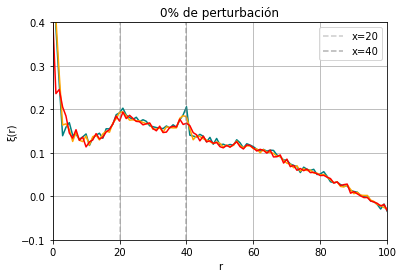

In [41]:
plt.title('0% de perturbación')
plt.plot(s_Mcpp_0, color='teal')
plt.plot(s_Mcpp_5, color='orange')
plt.plot(s_Mcpp_10, color='red')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
plt.axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
plt.xlim(0,100)
plt.ylim(-.1,.4)
plt.legend()
plt.show()

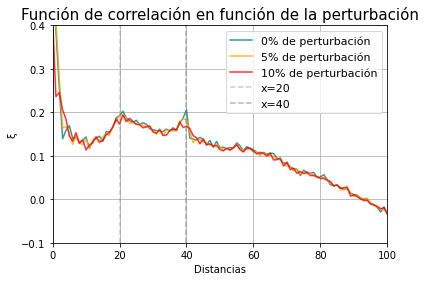

In [43]:
plt.title('Función de correlación en función de la perturbación', fontsize = 15)
plt.plot(s_Mcpp_0, color='teal', label='0% de perturbación', alpha=0.8)
plt.plot(s_Mcpp_5, color='orange', label='5% de perturbación', alpha=0.8)
plt.plot(s_Mcpp_10, color='red', label='10% de perturbación', alpha=0.8)
plt.grid()
plt.ylabel('ξ')
plt.xlabel('Distancias')
plt.axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
plt.axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
plt.xlim(0,100)
plt.ylim(-.1,.4)
plt.legend(fontsize = 11)
plt.show()

In [ ]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,4), nrows=1, ncols=3)
plt.tight_layout()

axes_cosmo[0].set_title('0% de perturbación')
axes_cosmo[0].plot(xDD_Mcpp_0, yDD_Mcpp_0, label='Datos galaxias (DD)', color='teal')
axes_cosmo[0].plot(xRR_Mcpp_0, yRR_Mcpp_0, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15', alpha=0.5)
axes_cosmo[0].set_ylabel('Frecuencia')
axes_cosmo[0].set_xlabel('Distancias')
axes_cosmo[0].legend()

axes_cosmo[1].set_title('5% de perturbación')
axes_cosmo[1].plot(xDD_Mcpp_5, yDD_Mcpp_5, label='Datos galaxias (DD)', color='teal')
axes_cosmo[1].plot(xRR_Mcpp_5, yRR_Mcpp_5, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15', alpha=0.5)
axes_cosmo[1].set_xlabel('Distancias')
axes_cosmo[1].legend()

axes_cosmo[2].set_title('10% de perturbación')
axes_cosmo[2].plot(xDD_Mcpp_10, yDD_Mcpp_10, label='Datos galaxias (DD)', color='teal')
axes_cosmo[2].plot(xRR_Mcpp_10, yRR_Mcpp_10, label='Puntos aleatorios (RR)', color='darkorange')
axes_cosmo[2].axvline(15, color='gray', ls='--', label='x=15', alpha=0.5)
axes_cosmo[2].set_xlabel('Distancias')
axes_cosmo[2].legend()

In [ ]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,5), nrows=1, ncols=3)
plt.tight_layout()

axes_cosmo[0].set_title('0% de perturbación')
axes_cosmo[0].plot(s_Mcpp_0, color='teal')
axes_cosmo[0].grid()
axes_cosmo[0].set_ylabel('DD[i] - RR[i]')
axes_cosmo[0].set_xlabel('Distancias')
axes_cosmo[0].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[0].legend()

axes_cosmo[1].set_title('5% de perturbación')
axes_cosmo[1].plot(s_Mcpp_5, color='teal')
axes_cosmo[1].grid()
axes_cosmo[1].set_xlabel('Distancias')
axes_cosmo[1].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[1].legend()

axes_cosmo[2].set_title('10% de perturbación')
axes_cosmo[2].plot(s_Mcpp_10, color='teal')
axes_cosmo[2].grid()
axes_cosmo[2].set_xlabel('Distancias')
axes_cosmo[2].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[2].legend()

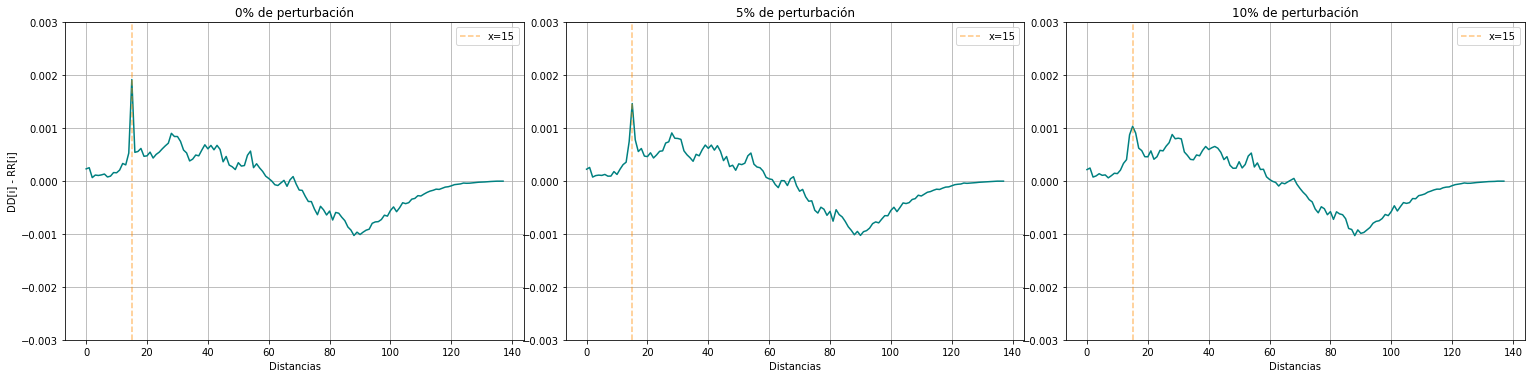

In [44]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(21,5), nrows=1, ncols=3)
plt.tight_layout()

axes_cosmo[0].set_title('0% de perturbación')
axes_cosmo[0].plot(s_Mcpp_0, color='teal')
axes_cosmo[0].grid()
axes_cosmo[0].set_ylabel('DD[i] - RR[i]')
axes_cosmo[0].set_xlabel('Distancias')
axes_cosmo[0].set_ylim(-0.003,0.003)
axes_cosmo[0].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[0].legend()

axes_cosmo[1].set_title('5% de perturbación')
axes_cosmo[1].plot(s_Mcpp_5, color='teal')
axes_cosmo[1].grid()
axes_cosmo[1].set_xlabel('Distancias')
axes_cosmo[1].set_ylim(-0.003,0.003)
axes_cosmo[1].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[1].legend()

axes_cosmo[2].set_title('10% de perturbación')
axes_cosmo[2].plot(s_Mcpp_10, color='teal')
axes_cosmo[2].grid()
axes_cosmo[2].set_ylim(-0.003,0.003)
axes_cosmo[2].set_xlabel('Distancias')
axes_cosmo[2].axvline(15, color='darkorange', ls='--', label='x=15', alpha=0.5)
axes_cosmo[2].legend()

#### Cambiando la cantidad de galaxias por halo

In [6]:
#25 galaxias 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_25g, etiqueta_25g = Puntos_circulos(150, 25, 20, 200,0.01, 0.1)
DDcirculo_25g = DD(circulo_25g)
N_25g = len(DDcirculo_25g)
rr_25g = np.random.uniform(low=0.0, high=200.0, size=((int(N_25g*1.5),2)))
Nr_25g = len(rr_25g)

total puntos 3564


In [7]:
#35 galaxias 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_35g, etiqueta_35g = Puntos_circulos(150, 35, 20, 200,0.01, 0.1)
DDcirculo_35g = DD(circulo_35g)
N_35g = len(DDcirculo_35g)
rr_35g = np.random.uniform(low=0.0, high=200.0, size=((int(N_35g*1.5),2)))
Nr_35g = len(rr_35g)

total puntos 4973


In [8]:
#45 galaxias 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_45g, etiqueta_45g = Puntos_circulos(150, 45, 20, 200,0.01, 0.1)
DDcirculo_45g = DD(circulo_45g)
N_45g = len(DDcirculo_45g)
rr_45g = np.random.uniform(low=0.0, high=200.0, size=((int(N_45g*1.5),2)))
Nr_45g = len(rr_45g)

total puntos 6435


In [9]:
#55 galaxias 
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_55g, etiqueta_55g = Puntos_circulos(150, 55, 20, 200,0.01, 0.1)
DDcirculo_55g = DD(circulo_55g)
N_55g = len(DDcirculo_55g)
rr_55g = np.random.uniform(low=0.0, high=200.0, size=((int(N_55g*1.5),2)))
Nr_55g = len(rr_55g)

total puntos 7910


#### Calculamos los histogramas

In [62]:
distance_rr_25g = comp_all_distances(rr_25g)
distance_dd_25g = comp_all_distances(DDcirculo_25g)
print(len(distance_rr_25g))

rrandom_25g = [round(r, 0) for r in  distance_rr_25g] #round redonde a 0 decimales
rcount_25g = Counter(rrandom_25g) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_25g = sorted(rcount_25g.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_25g = [round(r, 0) for r in  distance_dd_25g]
dcount_25g = Counter(ddata_25g)
sorted_DD_25g = sorted(dcount_25g.items())

xDD_25g = [x[0] for x in sorted_DD_25g] #Distancias para DD
yDD_25g = [x[1]/(N_25g**2) for x in sorted_DD_25g] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_25g = [x[0] for x in sorted_RR_25g] #Distancias para RR
yRR_25g = [x[1]/(Nr_25g**2) for x in sorted_RR_25g] # Cantidad de veces que se reppite cada distancia al cuadrado

14287185


In [63]:
min_length = min(len(yDD_25g), len(yRR_25g))
s_25g = []
for i in range(min_length):
    s_25g.append((yDD_25g[i]/yRR_25g[i])-1-0.01)

In [65]:
distance_rr_35g = comp_all_distances(rr_35g)
distance_dd_35g = comp_all_distances(DDcirculo_35g)
print(len(distance_rr_35g))

rrandom_35g = [round(r, 0) for r in  distance_rr_35g] #round redonde a 0 decimales
rcount_35g = Counter(rrandom_35g) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_35g = sorted(rcount_35g.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_35g = [round(r, 0) for r in  distance_dd_35g]
dcount_35g = Counter(ddata_35g)
sorted_DD_35g = sorted(dcount_35g.items())

xDD_35g = [x[0] for x in sorted_DD_35g] #Distancias para DD
yDD_35g = [x[1]/(N_35g**2) for x in sorted_DD_35g] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_35g = [x[0] for x in sorted_RR_35g] #Distancias para RR
yRR_35g = [x[1]/(Nr_35g**2) for x in sorted_RR_35g] # Cantidad de veces que se reppite cada distancia al cuadrado

27814611


In [66]:
min_length = min(len(yDD_35g), len(yRR_35g))
s_35g = []
for i in range(min_length):
    s_35g.append((yDD_35g[i]/yRR_35g[i])-1-0.02)

In [67]:
distance_rr_45g = comp_all_distances(rr_45g)
distance_dd_45g = comp_all_distances(DDcirculo_45g)
print(len(distance_rr_45g))

rrandom_45g = [round(r, 0) for r in  distance_rr_45g] #round redonde a 0 decimales
rcount_45g = Counter(rrandom_45g) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_45g = sorted(rcount_45g.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_45g = [round(r, 0) for r in  distance_dd_45g]
dcount_45g = Counter(ddata_45g)
sorted_DD_45g = sorted(dcount_45g.items())

xDD_45g = [x[0] for x in sorted_DD_45g] #Distancias para DD
yDD_45g = [x[1]/(N_45g**2) for x in sorted_DD_45g] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_45g = [x[0] for x in sorted_RR_45g] #Distancias para RR
yRR_45g = [x[1]/(Nr_45g**2) for x in sorted_RR_45g] # Cantidad de veces que se reppite cada distancia al cuadrado

46575726


In [68]:
min_length = min(len(yDD_45g), len(yRR_45g))
s_45g = []
for i in range(min_length):
    s_45g.append((yDD_45g[i]/yRR_45g[i])-1-0.005)

In [69]:
distance_rr_55g = comp_all_distances(rr_55g)
distance_dd_55g = comp_all_distances(DDcirculo_55g)
print(len(distance_rr_55g))

rrandom_55g = [round(r, 0) for r in  distance_rr_55g] #round redonde a 0 decimales
rcount_55g = Counter(rrandom_55g) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_55g = sorted(rcount_55g.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_55g = [round(r, 0) for r in  distance_dd_55g]
dcount_55g = Counter(ddata_55g)
sorted_DD_55g = sorted(dcount_55g.items())

xDD_55g = [x[0] for x in sorted_DD_55g] #Distancias para DD
yDD_55g = [x[1]/(N_55g**2) for x in sorted_DD_55g] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_55g = [x[0] for x in sorted_RR_55g] #Distancias para RR
yRR_55g = [x[1]/(Nr_55g**2) for x in sorted_RR_55g] # Cantidad de veces que se reppite cada distancia al cuadrado

70383180


In [70]:
min_length = min(len(yDD_55g), len(yRR_55g))
s_55g = []
for i in range(min_length):
    s_55g.append((yDD_55g[i]/yRR_55g[i])-1)

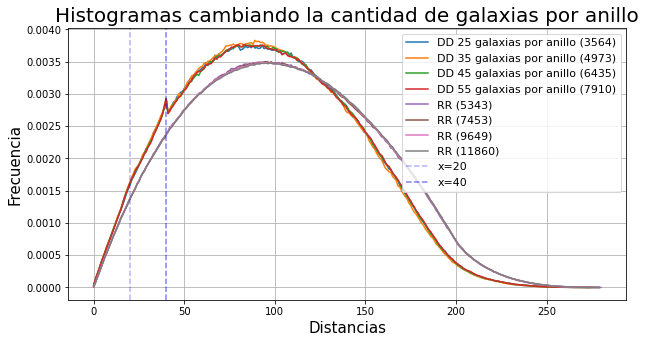

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(xDD_25g, yDD_25g, label='DD 25 galaxias por anillo (3564)')
plt.plot(xDD_35g, yDD_35g, label='DD 35 galaxias por anillo (4973)')
plt.plot(xDD_45g, yDD_45g, label='DD 45 galaxias por anillo (6435)')
plt.plot(xDD_55g, yDD_55g, label='DD 55 galaxias por anillo (7910)')
plt.plot(xRR_25g, yRR_25g, label='RR (5343)')
plt.plot(xRR_35g, yRR_35g, label='RR (7453)')
plt.plot(xRR_45g, yRR_45g, label='RR (9649)')
plt.plot(xRR_55g, yRR_55g, label='RR (11860)')
plt.axvline(20, color='blue', ls='--', label='x=20', alpha=0.3)
plt.axvline(40, color='blue', ls='--', label='x=40', alpha=0.5)
plt.xlabel('Distancias', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.title('Histogramas cambiando la cantidad de galaxias por anillo', fontsize = 20)
#plt.xlim(0,150)
plt.legend(fontsize = 11)
plt.grid()

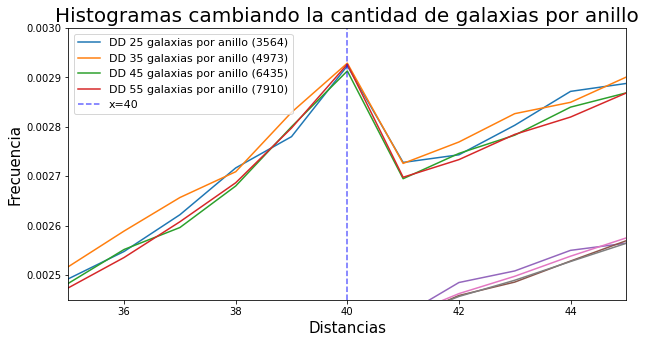

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(xDD_25g, yDD_25g, label='DD 25 galaxias por anillo (3564)')
plt.plot(xDD_35g, yDD_35g, label='DD 35 galaxias por anillo (4973)')
plt.plot(xDD_45g, yDD_45g, label='DD 45 galaxias por anillo (6435)')
plt.plot(xDD_55g, yDD_55g, label='DD 55 galaxias por anillo (7910)')
plt.plot(xRR_25g, yRR_25g)
plt.plot(xRR_35g, yRR_35g)
plt.plot(xRR_45g, yRR_45g)
plt.plot(xRR_55g, yRR_55g)
#plt.axvline(20, color='blue', ls='--', label='x=20', alpha=0.4)
plt.axvline(40, color='blue', ls='--', label='x=40', alpha=0.6)
plt.xlabel('Distancias', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.xlim(35,45)
plt.ylim(0.00245,0.003)
plt.title('Histogramas cambiando la cantidad de galaxias por anillo', fontsize = 20)
#plt.xlim(0,150)
plt.legend(fontsize = 11)

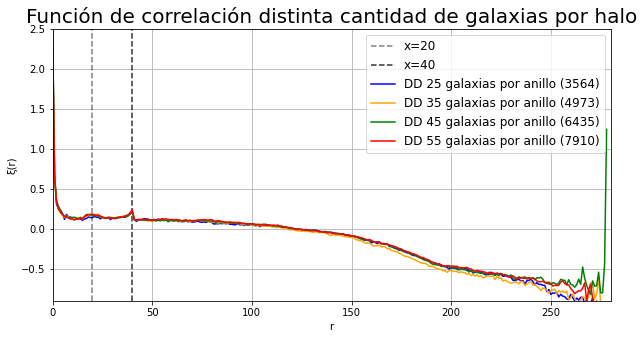

In [84]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación distinta cantidad de galaxias por halo', fontsize = 20)
plt.axvline(20, color='black', ls='--', label='x=20', alpha=0.5)
plt.axvline(40, color='black', ls='--', label='x=40', alpha=0.8)
plt.plot(s_25g, label='DD 25 galaxias por anillo (3564)', color='blue')
plt.plot(s_35g, label='DD 35 galaxias por anillo (4973)', color='orange')
plt.plot(s_45g, label='DD 45 galaxias por anillo (6435)', color='green')
plt.plot(s_55g, label='DD 55 galaxias por anillo (7910)', color='red')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.xlim(0,280)
plt.ylim(-0.9,2.5)
plt.legend(fontsize = 12)
plt.show()

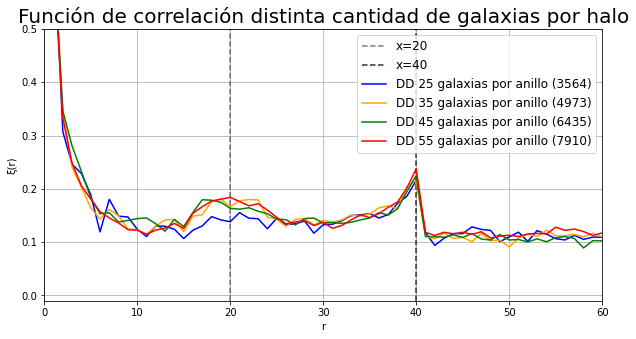

In [77]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación distinta cantidad de galaxias por halo', fontsize = 20)
plt.axvline(20, color='black', ls='--', label='x=20', alpha=0.5)
plt.axvline(40, color='black', ls='--', label='x=40', alpha=0.8)
plt.plot(s_25g, label='DD 25 galaxias por anillo (3564)', color='blue')
plt.plot(s_35g, label='DD 35 galaxias por anillo (4973)', color='orange')
plt.plot(s_45g, label='DD 45 galaxias por anillo (6435)', color='green')
plt.plot(s_55g, label='DD 55 galaxias por anillo (7910)', color='red')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.xlim(0,60)
plt.ylim(-.01,.5)
plt.legend(fontsize = 12)
plt.show()

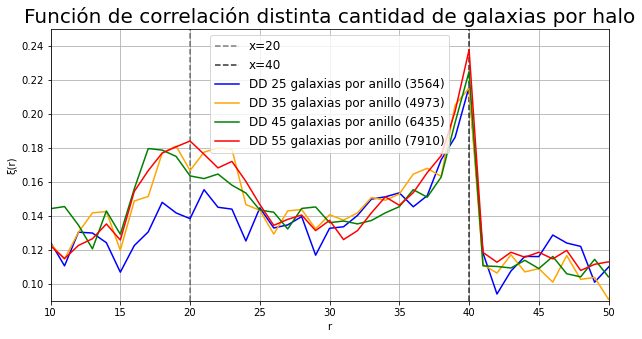

In [79]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación distinta cantidad de galaxias por halo', fontsize = 20)
plt.axvline(20, color='black', ls='--', label='x=20', alpha=0.5)
plt.axvline(40, color='black', ls='--', label='x=40', alpha=0.8)
plt.plot(s_25g, label='DD 25 galaxias por anillo (3564)', color='blue')
plt.plot(s_35g, label='DD 35 galaxias por anillo (4973)', color='orange')
plt.plot(s_45g, label='DD 45 galaxias por anillo (6435)', color='green')
plt.plot(s_55g, label='DD 55 galaxias por anillo (7910)', color='red')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.xlim(10,50)
plt.ylim(.09,.25)
plt.legend(fontsize = 12)
plt.show()

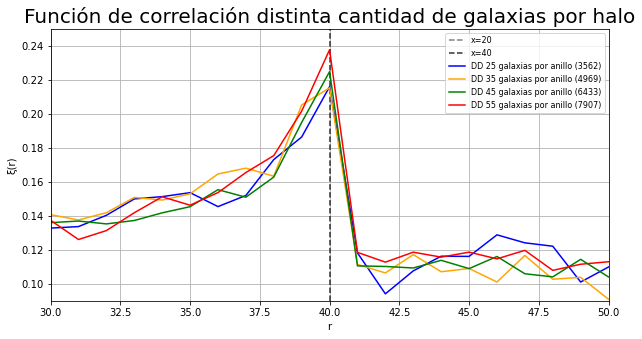

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación distinta cantidad de galaxias por halo', fontsize = 20)
plt.axvline(20, color='black', ls='--', label='x=20', alpha=0.5)
plt.axvline(40, color='black', ls='--', label='x=40', alpha=0.8)
plt.plot(s_25g, label='DD 25 galaxias por anillo (3562)', color='blue')
plt.plot(s_35g, label='DD 35 galaxias por anillo (4969)', color='orange')
plt.plot(s_45g, label='DD 45 galaxias por anillo (6433)', color='green')
plt.plot(s_55g, label='DD 55 galaxias por anillo (7907)', color='red')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.xlim(30,50)
plt.ylim(.09,.25)
plt.legend(fontsize = 8)
plt.show()

#### Cambiando la densidad de galaxias en el centro del halo respecto al halo

In [85]:
#10% de puntos en el centro
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_10p, etiqueta_10p = Puntos_circulos(150, 35, 20, 200,0.05, 0.1)
DDcirculo_10p = DD(circulo_10p)
N_10p = len(DDcirculo_10p)
rr_10p = np.random.uniform(low=0.0, high=200.0, size=((int(N_10p*1.5),2)))
Nr_10p = len(rr_10p)

total puntos 4972


In [86]:
#15% de puntos en el centro
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_15p, etiqueta_15p = Puntos_circulos(150, 35, 20, 200,0.05, 0.15)
DDcirculo_15p = DD(circulo_15p)
N_15p = len(DDcirculo_15p)
rr_15p = np.random.uniform(low=0.0, high=200.0, size=((int(N_15p*1.5),2)))
Nr_15p = len(rr_15p)

total puntos 5321


In [87]:
#20% de puntos en el centro
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_20p, etiqueta_20p = Puntos_circulos(150, 35, 20, 200,0.05, 0.2)
DDcirculo_20p = DD(circulo_20p)
N_20p = len(DDcirculo_20p)
rr_20p = np.random.uniform(low=0.0, high=200.0, size=((int(N_20p*1.5),2)))
Nr_20p = len(rr_20p)

total puntos 5601


In [88]:
#25% de puntos en el centro
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_25p, etiqueta_25p = Puntos_circulos(150, 35, 20, 200,0.05, 0.25)
DDcirculo_25p = DD(circulo_25p)
N_25p = len(DDcirculo_25p)
rr_25p = np.random.uniform(low=0.0, high=200.0, size=((int(N_25p*1.5),2)))
Nr_25p = len(rr_25p)

total puntos 5740


In [89]:
#30% de puntos en el centro
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_30p, etiqueta_30p = Puntos_circulos(150, 35, 20, 200,0.05, 0.3)
DDcirculo_30p = DD(circulo_30p)
N_30p = len(DDcirculo_30p)
rr_30p = np.random.uniform(low=0.0, high=200.0, size=((int(N_30p*1.5),2)))
Nr_30p = len(rr_30p)

total puntos 6073


##### Calculamos los histogramas

In [91]:
distance_rr_10p = comp_all_distances(rr_10p)
distance_dd_10p = comp_all_distances(DDcirculo_10p)
print(len(distance_rr_10p))

rrandom_10p = [round(r, 0) for r in  distance_rr_10p] #round redonde a 0 decimales
rcount_10p = Counter(rrandom_10p) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_10p = sorted(rcount_10p.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_10p = [round(r, 0) for r in  distance_dd_10p]
dcount_10p = Counter(ddata_10p)
sorted_DD_10p = sorted(dcount_10p.items())

xDD_10p = [x[0] for x in sorted_DD_10p] #Distancias para DD
yDD_10p = [x[1]/(N_10p**2) for x in sorted_DD_10p] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_10p = [x[0] for x in sorted_RR_10p] #Distancias para RR
yRR_10p = [x[1]/(Nr_10p**2) for x in sorted_RR_10p] # Cantidad de veces que se reppite cada distancia al cuadrado

27807153


In [92]:
min_length = min(len(yDD_10p), len(yRR_10p))
s_10p = []
for i in range(min_length):
    s_10p.append((yDD_10p[i]/yRR_10p[i])-1)

In [93]:
distance_rr_15p = comp_all_distances(rr_15p)
distance_dd_15p = comp_all_distances(DDcirculo_15p)
print(len(distance_rr_15p))

rrandom_15p = [round(r, 0) for r in  distance_rr_15p] #round redonde a 0 decimales
rcount_15p = Counter(rrandom_15p) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_15p = sorted(rcount_15p.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_15p = [round(r, 0) for r in  distance_dd_15p]
dcount_15p = Counter(ddata_15p)
sorted_DD_15p = sorted(dcount_15p.items())

xDD_15p = [x[0] for x in sorted_DD_15p] #Distancias para DD
yDD_15p = [x[1]/(N_15p**2) for x in sorted_DD_15p] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_15p = [x[0] for x in sorted_RR_15p] #Distancias para RR
yRR_15p = [x[1]/(Nr_15p**2) for x in sorted_RR_15p] # Cantidad de veces que se reppite cada distancia al cuadrado

31844190


In [94]:
min_length = min(len(yDD_15p), len(yRR_15p))
s_15p = []
for i in range(min_length):
    s_15p.append((yDD_15p[i]/yRR_15p[i])-1)

In [ ]:
distance_rr_20p = comp_all_distances(rr_20p)
distance_dd_20p = comp_all_distances(DDcirculo_20p)
print(len(distance_rr_20p))

rrandom_20p = [round(r, 0) for r in  distance_rr_20p] #round redonde a 0 decimales
rcount_20p = Counter(rrandom_20p) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_20p = sorted(rcount_20p.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_20p = [round(r, 0) for r in  distance_dd_20p]
dcount_20p = Counter(ddata_20p)
sorted_DD_20p = sorted(dcount_20p.items())

xDD_20p = [x[0] for x in sorted_DD_20p] #Distancias para DD
yDD_20p = [x[1]/(N_20p**2) for x in sorted_DD_20p] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_20p = [x[0] for x in sorted_RR_20p] #Distancias para RR
yRR_20p = [x[1]/(Nr_20p**2) for x in sorted_RR_20p] # Cantidad de veces que se reppite cada distancia al cuadrado

In [ ]:
min_length = min(len(yDD_20p), len(yRR_20p))
s_20p = []
for i in range(min_length):
    s_20p.append((yDD_20p[i]yRR_20p[i])-1)

In [ ]:
distance_rr_25p = comp_all_distances(rr_25p)
distance_dd_25p = comp_all_distances(DDcirculo_25p)
print(len(distance_rr_25p))

rrandom_25p = [round(r, 0) for r in  distance_rr_25p] #round redonde a 0 decimales
rcount_25p = Counter(rrandom_25p) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_25p = sorted(rcount_25p.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_25p = [round(r, 0) for r in  distance_dd_25p]
dcount_25p = Counter(ddata_25p)
sorted_DD_25p = sorted(dcount_25p.items())

xDD_25p = [x[0] for x in sorted_DD_25p] #Distancias para DD
yDD_25p = [x[1]/(N_25p**2) for x in sorted_DD_25p] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_25p = [x[0] for x in sorted_RR_25p] #Distancias para RR
yRR_25p = [x[1]/(Nr_25p**2) for x in sorted_RR_25p] # Cantidad de veces que se reppite cada distancia al cuadrado

In [ ]:
min_length = min(len(yDD_25p), len(yRR_25p))
s_25p = []
for i in range(min_length):
    s_25p.append((yDD_25p[i]/yRR_25p[i])-1)

In [15]:
distance_rr_30p = comp_all_distances(rr_30p)
distance_dd_30p = comp_all_distances(DDcirculo_30p)
print(len(distance_rr_30p))

rrandom_30p = [round(r, 0) for r in  distance_rr_30p] #round redonde a 0 decimales
rcount_30p = Counter(rrandom_30p) #registra cuántas veces se agregan valores equivalentes.
sorted_RR_30p = sorted(rcount_30p.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

ddata_30p = [round(r, 0) for r in  distance_dd_30p]
dcount_30p = Counter(ddata_30p)
sorted_DD_30p = sorted(dcount_30p.items())

xDD_30p = [x[0] for x in sorted_DD_30p] #Distancias para DD
yDD_30p = [x[1]/(N_30p**2) for x in sorted_DD_30p] # Cantidad de veces que se reppite cada distancia al cuadrado
xRR_30p = [x[0] for x in sorted_RR_30p] #Distancias para RR
yRR_30p = [x[1]/(Nr_30p**2) for x in sorted_RR_30p] # Cantidad de veces que se reppite cada distancia al cuadrado

41537055


In [ ]:
min_length = min(len(yDD_30p), len(yRR_30p))
s_30p = []
for i in range(min_length):
    s_30p.append((yDD_30p[i]/yRR_30p[i])-1)

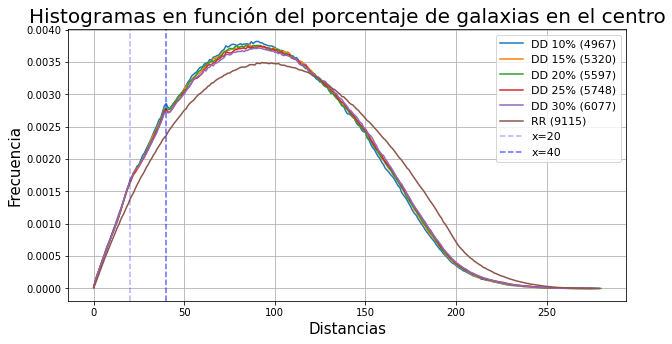

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(xDD_10p, yDD_10p, label='DD 10% (4967)')
plt.plot(xDD_15p, yDD_15p, label='DD 15% (5320)')
plt.plot(xDD_20p, yDD_20p, label='DD 20% (5597)')
plt.plot(xDD_25p, yDD_25p, label='DD 25% (5748)')
plt.plot(xDD_30p, yDD_30p, label='DD 30% (6077)')
plt.plot(xRR_30p, yRR_30p, label='RR (9115)')
plt.axvline(20, color='blue', ls='--', label='x=20', alpha=0.3)
plt.axvline(40, color='blue', ls='--', label='x=40', alpha=0.6)
plt.xlabel('Distancias', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.title('Histogramas en función del porcentaje de galaxias en el centro', fontsize = 20)
#plt.xlim(0,150)
plt.legend(fontsize = 11)
plt.grid()

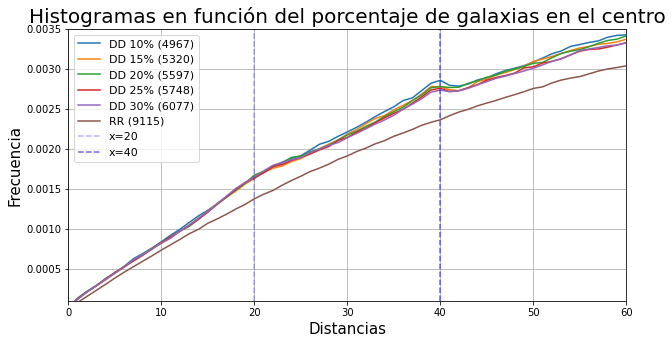

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(xDD_10p, yDD_10p, label='DD 10% (4967)')
plt.plot(xDD_15p, yDD_15p, label='DD 15% (5320)')
plt.plot(xDD_20p, yDD_20p, label='DD 20% (5597)')
plt.plot(xDD_25p, yDD_25p, label='DD 25% (5748)')
plt.plot(xDD_30p, yDD_30p, label='DD 30% (6077)')
plt.plot(xRR_30p, yRR_30p, label='RR (9115)')
plt.axvline(20, color='blue', ls='--', label='x=20', alpha=0.3)
plt.axvline(40, color='blue', ls='--', label='x=40', alpha=0.6)
plt.xlabel('Distancias', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.title('Histogramas en función del porcentaje de galaxias en el centro', fontsize = 20)
plt.xlim(0,60)
plt.ylim(0.0001,0.0035)
plt.legend(fontsize = 11)
plt.grid()

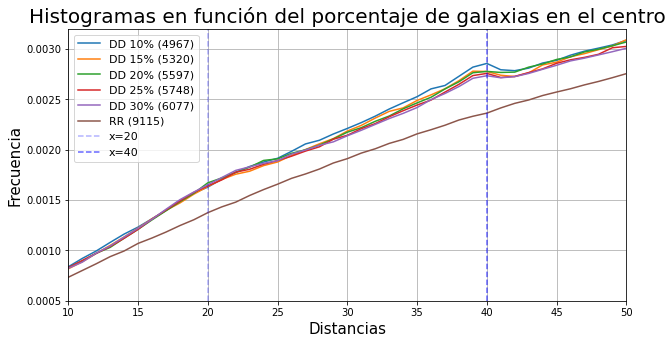

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(xDD_10p, yDD_10p, label='DD 10% (4967)')
plt.plot(xDD_15p, yDD_15p, label='DD 15% (5320)')
plt.plot(xDD_20p, yDD_20p, label='DD 20% (5597)')
plt.plot(xDD_25p, yDD_25p, label='DD 25% (5748)')
plt.plot(xDD_30p, yDD_30p, label='DD 30% (6077)')
plt.plot(xRR_30p, yRR_30p, label='RR (9115)')
plt.axvline(20, color='blue', ls='--', label='x=20', alpha=0.3)
plt.axvline(40, color='blue', ls='--', label='x=40', alpha=0.6)
plt.xlabel('Distancias', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.title('Histogramas en función del porcentaje de galaxias en el centro', fontsize = 20)
plt.xlim(10,50)
plt.ylim(0.0005,0.0032)
plt.legend(fontsize = 11)
plt.grid()

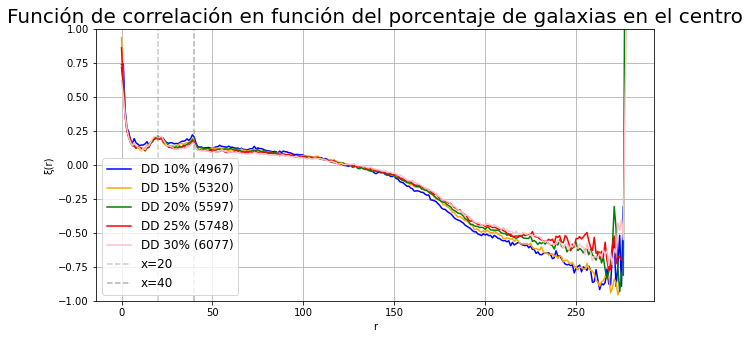

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación en función del porcentaje de galaxias en el centro', fontsize = 20)
plt.plot(s_10p, label='DD 10% (4967)', color='blue')
plt.plot(s_15p, label='DD 15% (5320)', color='orange')
plt.plot(s_20p, label='DD 20% (5597)', color='green')
plt.plot(s_25p, label='DD 25% (5748)', color='red')
plt.plot(s_30p, label='DD 30% (6077)', color='pink')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
plt.axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
#plt.xlim(0,200)
plt.ylim(-1,1)
plt.legend(fontsize = 12)
plt.show()

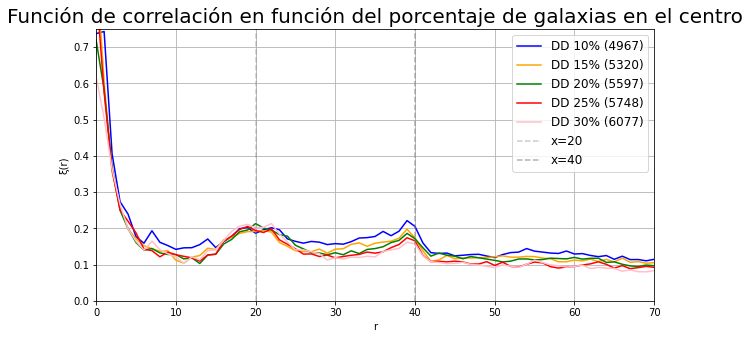

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Función de correlación en función del porcentaje de galaxias en el centro', fontsize = 20)
plt.plot(s_10p, label='DD 10% (4967)', color='blue')
plt.plot(s_15p, label='DD 15% (5320)', color='orange')
plt.plot(s_20p, label='DD 20% (5597)', color='green')
plt.plot(s_25p, label='DD 25% (5748)', color='red')
plt.plot(s_30p, label='DD 30% (6077)', color='pink')
plt.grid()
plt.ylabel('ξ(r)')
plt.xlabel('r')
plt.axvline(20, color='gray', ls='--', label='x=20', alpha=0.4)
plt.axvline(40, color='gray', ls='--', label='x=40', alpha=0.6)
plt.xlim(0,70)
plt.ylim(-0,0.75)
plt.legend(fontsize = 12)
plt.show()

# Funciones de correlación

In [385]:
# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data = DDcirculo
all_data.extend(rr)

In [386]:
#Obtenemos las distancias de todos los datos contra todos
distance_all = comp_all_distances(all_data)

In [387]:
# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom = [round(r, 0) for r in  distance_all] #round redonde a 0 decimales
allcount = Counter(allrandom) #registra cuántas veces se agregan valores equivalentes.
sorted_all = sorted(allcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

Dentro de la muestra de datos, dd(r) que se pueden normalizar por el número total de pares como
$$DD(r)=\frac{dd(r)}{n_d(n_d-1)/2}$$
dentro de la muestra aleatoria, lo que lleva a rr(r) normalizado
como
$$RR(r)=\frac{rr(r)}{n_r(n_r-1)/2}$$
entre ambas muestras (correlación cruzada) que conduce a dr(r)
normalizado como
$$DR(r)=\frac{dr(r)}{n_rn_d}$$

In [388]:
DD= []
for i in range(140):
    DD.append(dcount[i]/((N*(N-1))/2))

In [389]:
RR= []
for i in range(140):
    RR.append(rcount[i]/((Nr*(Nr-1))/2))

In [390]:
DR= []
for i in range(140):
    DR.append(allcount[i]/(Nr*N)) 

#### A continuación creamos funciones para calcular diferentes funciones de correlación
- Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos en un rango de distancia entre el campo objetivo y el campo de comparación. Se define como:
$$\xi_{PH} (r) = \frac{DD(r)}{RR(r)}- 1$$

In [391]:
ξ_PH = []
for i in range(140):
    ξ_PH.append(((DD[i]/RR[i]) -1))

In [392]:
ξ_PHi2 = []
for i in range(140):
    ξ_PHi2.append((i**2)*((DD[i]/RR[i])-1))

- Davis-Peebles: También conocido como estimador estándar, es propuesto en 1983 por los autores que le dan su nombre, presentando menor sesgo y mejorando la corrección el efecto de borde, el cual se genera cuando se cuentan pares de puntos cerca al borde de la ventana pues naturalmente se subestima el resultado. Esté estimador se define como:
$$\xi_{DP} (r) = \frac{DD(r)}{DR(r)}- 1$$

In [428]:
ξ_DP = []
for i in range(140):
    ξ_DP.append(((DD[i]/DR[i]) -1)-.1)

In [413]:
ξ_DPi2 = []
for i in range(140):
    ξ_DPi2.append((i**2)*((DD[i]/DR[i])-1+1))

- Hamilton: Aunque sigue siendo un estimador sesgado, la magnitud de este es menor al de los estimadores mencionados.
$$\xi_{H} (r) = \frac{DD(r)\times RR(r)}{[DR(r)]^2}- 1$$

In [440]:
ξ_H = []
for i in range(140):
    ξ_H.append(((DD[i]*RR[i])/((DR[i])**2))-1-.5 )

In [403]:
ξ_Hi2 = []
for i in range(140):
    ξ_Hi2.append((i**2)*(((DD[i]*RR[i])/((DR[i])**2))-1+0.75))

- Landy-Szalay: Al igual que el estimador de Hamilton, fue propuesto en 1993 y presentando un sesgo menor al de los dos primeros estimadores.
$$\xi_{LS} (r) = \frac{DD(r)-2DR(r)+RR(r)}{RR(r)}$$

In [404]:
ξ_LS = []
for i in range(140):
    ξ_LS.append(((DD[i]-(2*DR[i])+RR[i])/RR[i])+2)

In [405]:
ξ_LSi2 = []
for i in range(140):
    ξ_LSi2.append((i**2)*(((DD[i]-(2*DR[i])+RR[i])/RR[i])+2))

- Hewet
$$\xi_{He} (r) = \frac{DD(r)-DR(r)}{RR(r)}$$

In [406]:
ξ_He = []
for i in range(140):
    ξ_He.append(((DD[i]-DR[i])/RR[i])+1)

In [407]:
ξ_Hei2 = []
for i in range(140):
    ξ_Hei2.append((i**2)*(((DD[i]-DR[i])/RR[i]) +1))

[]

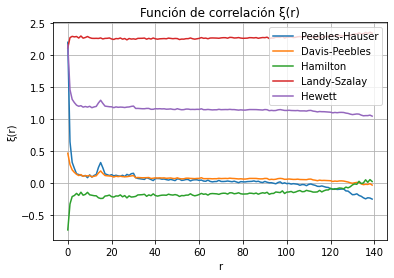

In [441]:
plt.plot(ξ_PH, label='Peebles-Hauser')
plt.plot(ξ_DP, label='Davis-Peebles')
plt.plot(ξ_H, label='Hamilton')
plt.plot(ξ_LS, label='Landy-Szalay')
plt.plot(ξ_He, label='Hewett')
#plt.xlim(40,80)
#plt.ylim(-1,1)
plt.grid()
plt.legend()
plt.xlabel('r')
plt.ylabel('ξ(r)')
plt.title('Función de correlación ξ(r)')
plt.plot()

Text(0.5, 1.0, 'Función de correlación ξ(r)')

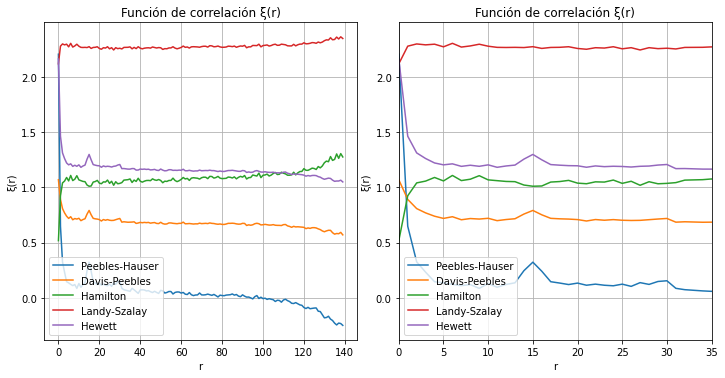

In [409]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H, label='Hamilton')
axes_cosmo[0].plot(ξ_LS, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He, label='Hewett')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r)')


axes_cosmo[1].plot(ξ_PH, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H, label='Hamilton')
axes_cosmo[1].plot(ξ_LS, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He, label='Hewett')
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylabel('ξ(r)')
axes_cosmo[1].set_title('Función de correlación ξ(r)')

Text(0.5, 1.0, 'Función de correlación (r^2)ξ(r)')

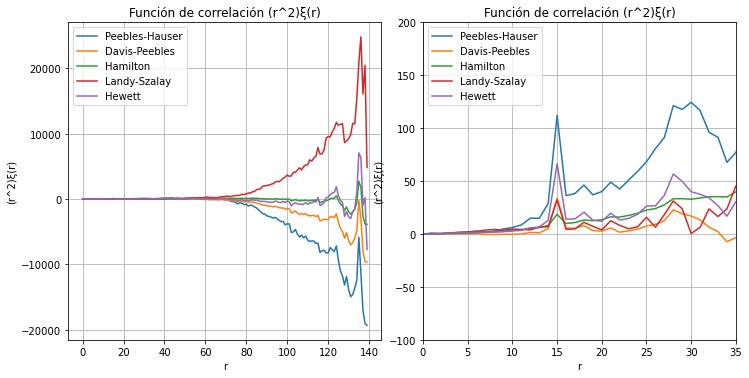

In [154]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,5), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PHi2, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DPi2, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_Hi2, label='Hamilton')
axes_cosmo[0].plot(ξ_LSi2, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_Hei2, label='Hewett')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('(r^2)ξ(r)')
axes_cosmo[0].set_title('Función de correlación (r^2)ξ(r)')

axes_cosmo[1].plot(ξ_PHi2, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DPi2, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_Hi2, label='Hamilton')
axes_cosmo[1].plot(ξ_LSi2, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_Hei2, label='Hewett')
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-100,200)
axes_cosmo[1].set_xlabel('r')
axes_cosmo[1].set_ylabel('(r^2)ξ(r)')
axes_cosmo[1].set_title('Función de correlación (r^2)ξ(r)')

## Nuevo rr  geométrica
$$\hat{RR}_{cuadrado}(r)=\frac{2\pi}{a^2}r-\frac{8}{a^3}r^2+\frac{2}{a^4}r^3$$

In [49]:
def RRcuadrado(r,a):
    RR_cuadrado = []
    for t in r:
        s = (2*np.pi*t/(a**2)) - ((8*(t**2))/(a**3)) + ((2*(t**3))/(a**4))
        RR_cuadrado.append(s)
    return RR_cuadrado

In [50]:
r_square = []
for t in range(1,140):
    r_square.append(t) 

In [51]:
RR_square = RRcuadrado(r_square,100)

## Función de correlación
- Peebles-Hauser: Propuesto en 1974, este compara el exceso de pares de puntos en un rango de distancia entre el campo objetivo y el campo de comparación. Se define como:
$$\xi_{PH} (r) = \frac{DD(r)}{RR(r)}- 1$$

In [52]:
ξ_PH_square = []
for i in range(139):
    ξ_PH_square.append(((DD[i]/RR_square[i]) -1))

In [53]:
ξ_PHi2_square = []
for i in range(139):
    ξ_PHi2_square.append((i**2)*((DD[i]/RR_square[i])))

Text(0.5, 1.0, 'Función de correlación (r^2)ξ(r)')

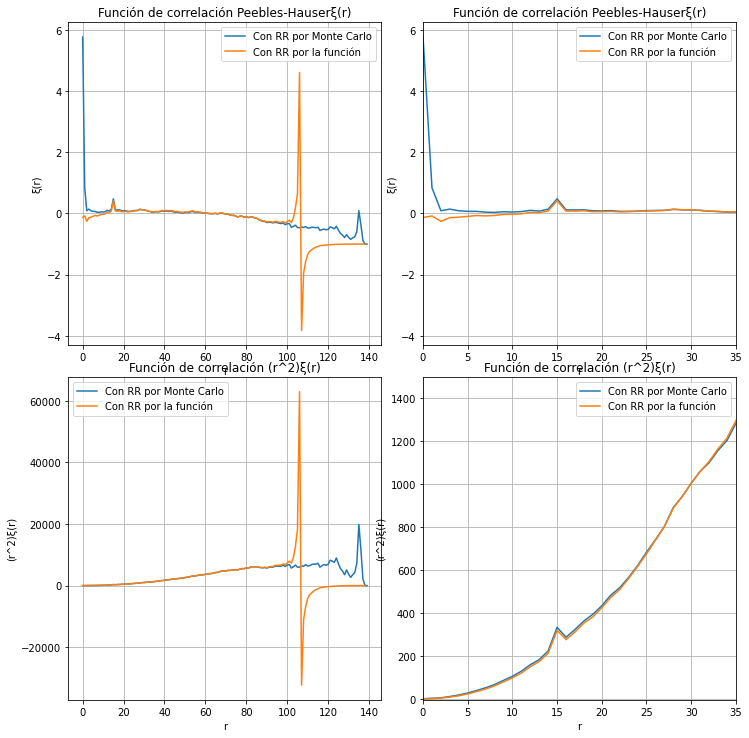

In [54]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.tight_layout()

axes_cosmo[0,0].plot(ξ_PH, label='Con RR por Monte Carlo')
axes_cosmo[0,0].plot(ξ_PH_square, label='Con RR por la función')
axes_cosmo[0,0].grid()
axes_cosmo[0,0].legend()
axes_cosmo[0,0].set_xlabel('r')
axes_cosmo[0,0].set_ylabel('ξ(r)')
axes_cosmo[0,0].set_title('Función de correlación Peebles-Hauserξ(r)')


axes_cosmo[0,1].plot(ξ_PH, label='Con RR por Monte Carlo')
axes_cosmo[0,1].plot(ξ_PH_square, label='Con RR por la función')
axes_cosmo[0,1].grid()
axes_cosmo[0,1].legend()
axes_cosmo[0,1].set_xlabel('r')
axes_cosmo[0,1].set_xlim(0,35)
axes_cosmo[0,1].set_ylabel('ξ(r)')
axes_cosmo[0,1].set_title('Función de correlación Peebles-Hauserξ(r)')

axes_cosmo[1,0].plot(ξ_PHi2, label='Con RR por Monte Carlo')
axes_cosmo[1,0].plot(ξ_PHi2_square, label='Con RR por la función')
axes_cosmo[1,0].grid()
axes_cosmo[1,0].legend()
axes_cosmo[1,0].set_xlabel('r')
axes_cosmo[1,0].set_ylabel('(r^2)ξ(r)')
axes_cosmo[1,0].set_title('Función de correlación (r^2)ξ(r)')

axes_cosmo[1,1].plot(ξ_PHi2, label='Con RR por Monte Carlo')
axes_cosmo[1,1].plot(ξ_PHi2_square, label='Con RR por la función')
axes_cosmo[1,1].grid()
axes_cosmo[1,1].legend()
axes_cosmo[1,1].set_xlim(0,35)
axes_cosmo[1,1].set_ylim(-5,1500)
axes_cosmo[1,1].set_xlabel('r')
axes_cosmo[1,1].set_ylabel('(r^2)ξ(r)')
axes_cosmo[1,1].set_title('Función de correlación (r^2)ξ(r)')

## Ahora caluclaremos la función de correlación de los datos vistos arriba comenzando por la superposición de 50 anillos de 20 galaxias

In [433]:
N_pcpp = len(DDcirculo_pcpp)
Nr_pcpp = len(rr_pcpp)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_pcpp = DDcirculo_pcpp
all_data_pcpp.extend(rr_pcpp)

#Obtenemos las distancias de todos los datos contra todos
distance_all_pcpp = comp_all_distances(all_data_pcpp)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_pcpp = [round(r, 0) for r in  distance_all_pcpp] #round redonde a 0 decimales
allcount_pcpp = Counter(allrandom_pcpp) #registra cuántas veces se agregan valores equivalentes.
sorted_all_pcpp = sorted(allcount_pcpp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_pcpp= []
for i in range(140):
    DD_pcpp.append(dcount_pcpp[i]/((N_pcpp*(N_pcpp-1))/2))
    
RR_pcpp= []
for i in range(140):
    RR_pcpp.append(rcount_pcpp[i]/((Nr_pcpp*(Nr_pcpp-1))/2))
    
DR_pcpp= []
for i in range(140):
    DR_pcpp.append(allcount_pcpp[i]/(Nr_pcpp*N_pcpp)) 

In [437]:
ξ_PH_pcpp = []
for i in range(140):
    ξ_PH_pcpp.append(((DD_pcpp[i]/RR_pcpp[i]) -1))
    
ξ_DP_pcpp = []
for i in range(140):
    ξ_DP_pcpp.append(((DD_pcpp[i]/DR_pcpp[i]) -1)+0.5)
    
ξ_H_pcpp = []
for i in range(140):
    ξ_H_pcpp.append(((DD_pcpp[i]*RR_pcpp[i])/((DR_pcpp[i])**2))-1+.8 )
    
ξ_LS_pcpp = []
for i in range(140):
    ξ_LS_pcpp.append(((DD_pcpp[i]-(2*DR_pcpp[i])+RR_pcpp[i])/RR_pcpp[i])+2.25)
    
ξ_He_pcpp = []
for i in range(140):
    ξ_He_pcpp.append(((DD_pcpp[i]-DR_pcpp[i])/RR_pcpp[i])+1.1)

ZeroDivisionError: float division by zero

NameError: name 'ξ_DP_pcpp' is not defined

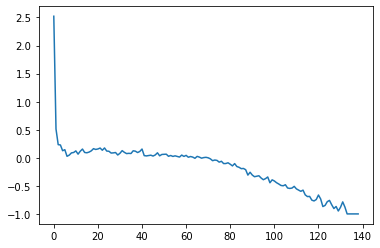

In [435]:
plt.plot(ξ_PH_pcpp, label='Peebles-Hauser')
plt.plot(ξ_DP_pcpp, label='Davis-Peebles')
plt.plot(ξ_H_pcpp, label='Hamilton')
plt.plot(ξ_LS_pcpp, label='Landy-Szalay')
plt.plot(ξ_He_pcpp, label='Hewett')
plt.axvline(15, color='gray', ls='--', label='x=15')
plt.grid()
plt.legend()
plt.xlim(0,80)
plt.xlabel('r')
plt.ylabel('ξ(r)')
plt.title('Función de correlación ξ(r) de superposición de 50 anillos de 25 galaxias')
plt.plot()

[]

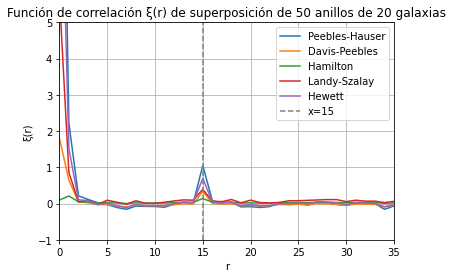

In [162]:
plt.plot(ξ_PH_pcpp, label='Peebles-Hauser')
plt.plot(ξ_DP_pcpp, label='Davis-Peebles')
plt.plot(ξ_H_pcpp, label='Hamilton')
plt.plot(ξ_LS_pcpp, label='Landy-Szalay')
plt.plot(ξ_He_pcpp, label='Hewett')
plt.axvline(15, color='gray', ls='--', label='x=15')
plt.xlim(0,35)
plt.ylim(-1,5)
plt.grid()
plt.legend()
plt.xlabel('r')
plt.ylabel('ξ(r)')
plt.title('Función de correlación ξ(r) de superposición de 50 anillos de 20 galaxias')
plt.plot()

In [ ]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_pcpp, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_pcpp, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_pcpp, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_pcpp, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_pcpp, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 50 anillos de 20 galaxias')

axes_cosmo[1].plot(ξ_PH_pcpp, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_pcpp, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_pcpp, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_pcpp, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_pcpp, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

Ahora para la superposición de 50 anillos de 40 galaxias

In [164]:
N_pcmp = len(DDcirculo_pcmp)
Nr_pcmp = len(rr_pcmp)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_pcmp = DDcirculo_pcmp
all_data_pcmp.extend(rr_pcmp)

#Obtenemos las distancias de todos los datos contra todos
distance_all_pcmp = comp_all_distances(all_data_pcmp)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_pcmp = [round(r, 0) for r in  distance_all_pcmp] #round redonde a 0 decimales
allcount_pcmp = Counter(allrandom_pcmp) #registra cuántas veces se agregan valores equivalentes.
sorted_all_pcmp = sorted(allcount_pcmp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_pcmp= []
for i in range(140):
    DD_pcmp.append(dcount_pcmp[i]/((N_pcmp*(N_pcmp-1))/2))
    
RR_pcmp= []
for i in range(140):
    RR_pcmp.append(rcount_pcmp[i]/((Nr_pcmp*(Nr_pcmp-1))/2))
    
DR_pcmp= []
for i in range(140):
    DR_pcmp.append(allcount_pcmp[i]/(Nr_pcmp*N_pcmp)) 

In [165]:
ξ_PH_pcmp = []
for i in range(140):
    ξ_PH_pcmp.append(((DD_pcmp[i]/RR_pcmp[i]) -1))
    
ξ_DP_pcmp = []
for i in range(140):
    ξ_DP_pcmp.append(((DD_pcmp[i]/DR_pcmp[i]) -1)+0.5)
    
ξ_H_pcmp = []
for i in range(140):
    ξ_H_pcmp.append(((DD_pcmp[i]*RR_pcmp[i])/((DR_pcmp[i])**2))-1+.8 )
    
ξ_LS_pcmp = []
for i in range(140):
    ξ_LS_pcmp.append(((DD_pcmp[i]-(2*DR_pcmp[i])+RR_pcmp[i])/RR_pcmp[i])+2.25)
    
ξ_He_pcmp = []
for i in range(140):
    ξ_He_pcmp.append(((DD_pcmp[i]-DR_pcmp[i])/RR_pcmp[i])+1.1)

Text(0.5, 6.0, 'r')

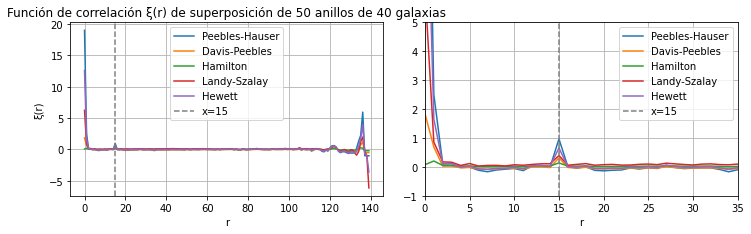

In [172]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_pcmp, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_pcmp, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_pcmp, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_pcmp, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_pcmp, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 50 anillos de 40 galaxias')

axes_cosmo[1].plot(ξ_PH_pcmp, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_pcmp, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_pcmp, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_pcmp, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_pcmp, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

Ahora superposición de 150 anillos con 20 galaxias cada uno

In [173]:
N_Mcpp = len(DDcirculo_Mcpp)
Nr_Mcpp = len(rr_Mcpp)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcpp = DDcirculo_Mcpp
all_data_Mcpp.extend(rr_Mcpp)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcpp = comp_all_distances(all_data_Mcpp)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_Mcpp = [round(r, 0) for r in  distance_all_Mcpp] #round redonde a 0 decimales
allcount_Mcpp = Counter(allrandom_Mcpp) #registra cuántas veces se agregan valores equivalentes.
sorted_all_Mcpp = sorted(allcount_Mcpp.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_Mcpp= []
for i in range(140):
    DD_Mcpp.append(dcount_Mcpp[i]/((N_Mcpp*(N_Mcpp-1))/2))
    
RR_Mcpp= []
for i in range(140):
    RR_Mcpp.append(rcount_Mcpp[i]/((Nr_Mcpp*(Nr_Mcpp-1))/2))
    
DR_Mcpp= []
for i in range(140):
    DR_Mcpp.append(allcount_Mcpp[i]/(Nr_Mcpp*N_Mcpp)) 

In [176]:
ξ_PH_Mcpp = []
for i in range(140):
    ξ_PH_Mcpp.append(((DD_Mcpp[i]/RR_Mcpp[i]) -1))
    
ξ_DP_Mcpp = []
for i in range(140):
    ξ_DP_Mcpp.append(((DD_Mcpp[i]/DR_Mcpp[i]) -1)+0.5)
    
ξ_H_Mcpp = []
for i in range(140):
    ξ_H_Mcpp.append(((DD_Mcpp[i]*RR_Mcpp[i])/((DR_Mcpp[i])**2))-1+.8 )
    
ξ_LS_Mcpp = []
for i in range(140):
    ξ_LS_Mcpp.append(((DD_Mcpp[i]-(2*DR_Mcpp[i])+RR_Mcpp[i])/RR_Mcpp[i])+2.25)
    
ξ_He_Mcpp = []
for i in range(140):
    ξ_He_Mcpp.append(((DD_Mcpp[i]-DR_Mcpp[i])/RR_Mcpp[i])+1.1)

Text(0.5, 6.0, 'r')

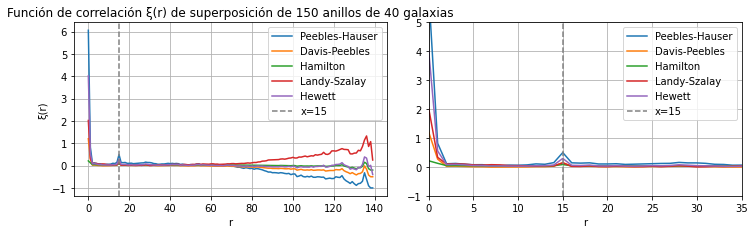

In [177]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_Mcpp, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_Mcpp, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_Mcpp, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_Mcpp, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_Mcpp, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 150 anillos de 40 galaxias')

axes_cosmo[1].plot(ξ_PH_Mcpp, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_Mcpp, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_Mcpp, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_Mcpp, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_Mcpp, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

A continuación no se logró para la superposición de 150 anillos con 40 galaxias cada uno debido a un error de memoria

In [179]:
N_Mcmp = len(DDcirculo_Mcmp)
Nr_Mcmp = len(rr_Mcmp)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcmp = DDcirculo_Mcmp
all_data_Mcmp.extend(rr_Mcmp)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcmp = comp_all_distances(all_data_Mcmp)

MemoryError: 

In [ ]:
ξ_PH_Mcmp = []
for i in range(140):
    ξ_PH_Mcmp.append(((DD_Mcmp[i]/RR_Mcmp[i]) -1))
    
ξ_DP_Mcmp = []
for i in range(140):
    ξ_DP_Mcmp.append(((DD_Mcmp[i]/DR_Mcmp[i]) -1)+0.5)
    
ξ_H_Mcmp = []
for i in range(140):
    ξ_H_Mcmp.append(((DD_Mcmp[i]*RR_Mcmp[i])/((DR_Mcmp[i])**2))-1+.8 )
    
ξ_LS_Mcmp = []
for i in range(140):
    ξ_LS_Mcmp.append(((DD_Mcmp[i]-(2*DR_Mcmp[i])+RR_Mcmp[i])/RR_Mcmp[i])+2.25)
    
ξ_He_Mcmp = []
for i in range(140):
    ξ_He_Mcmp.append(((DD_Mcmp[i]-DR_Mcmp[i])/RR_Mcmp[i])+1.1)

### Repetimos lo anterior para distintas perturbaciones

In [45]:
N_Mcpp_0 = len(DDcirculo_Mcpp_0)
Nr_Mcpp_0 = len(rr_Mcpp_0)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcpp_0 = DDcirculo_Mcpp_0
all_data_Mcpp_0.extend(rr_Mcpp_0)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcpp_0 = comp_all_distances(all_data_Mcpp_0)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_Mcpp_0 = [round(r, 0) for r in  distance_all_Mcpp_0] #round redonde a 0 decimales
allcount_Mcpp_0 = Counter(allrandom_Mcpp_0) #registra cuántas veces se agregan valores equivalentes.
sorted_all_Mcpp_0 = sorted(allcount_Mcpp_0.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_Mcpp_0= []
for i in range(140):
    DD_Mcpp_0.append(dcount_Mcpp_0[i]/((N_Mcpp_0*(N_Mcpp_0-1))/2))
    
RR_Mcpp_0= []
for i in range(140):
    RR_Mcpp_0.append(rcount_Mcpp_0[i]/((Nr_Mcpp_0*(Nr_Mcpp_0-1))/2))
    
DR_Mcpp_0= []
for i in range(140):
    DR_Mcpp_0.append(allcount_Mcpp_0[i]/(Nr_Mcpp_0*N_Mcpp_0)) 

In [47]:
ξ_PH_Mcpp_0 = []
for i in range(140):
    ξ_PH_Mcpp_0.append(((DD_Mcpp_0[i]/RR_Mcpp_0[i]) -1))
    
ξ_DP_Mcpp_0 = []
for i in range(140):
    ξ_DP_Mcpp_0.append(((DD_Mcpp_0[i]/DR_Mcpp_0[i]) -1)+0.5)
    
ξ_H_Mcpp_0 = []
for i in range(140):
    ξ_H_Mcpp_0.append(((DD_Mcpp_0[i]*RR_Mcpp_0[i])/((DR_Mcpp_0[i])**2))-1+.8 )
    
ξ_LS_Mcpp_0 = []
for i in range(140):
    ξ_LS_Mcpp_0.append(((DD_Mcpp_0[i]-(2*DR_Mcpp_0[i])+RR_Mcpp_0[i])/RR_Mcpp_0[i])+2.25)
    
ξ_He_Mcpp_0 = []
for i in range(140):
    ξ_He_Mcpp_0.append(((DD_Mcpp_0[i]-DR_Mcpp_0[i])/RR_Mcpp_0[i])+1.1)

Text(0.5, 6.0, 'r')

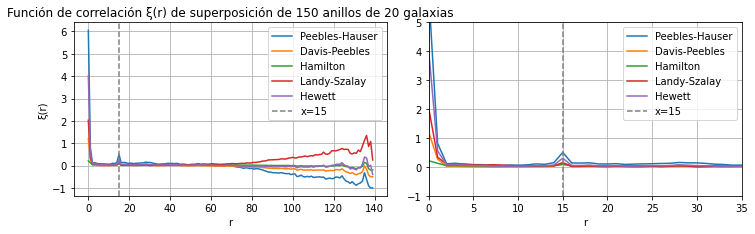

In [52]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_Mcpp_0, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_Mcpp_0, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_Mcpp_0, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_Mcpp_0, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_Mcpp_0, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 150 anillos de 20 galaxias')

axes_cosmo[1].plot(ξ_PH_Mcpp_0, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_Mcpp_0, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_Mcpp_0, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_Mcpp_0, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_Mcpp_0, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

In [49]:
#5% perturbacion
N_Mcpp_5 = len(DDcirculo_Mcpp_5)
Nr_Mcpp_5 = len(rr_Mcpp_5)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcpp_5 = DDcirculo_Mcpp_5
all_data_Mcpp_5.extend(rr_Mcpp_5)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcpp_5 = comp_all_distances(all_data_Mcpp_5)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_Mcpp_5 = [round(r, 0) for r in  distance_all_Mcpp_5] #round redonde a 0 decimales
allcount_Mcpp_5 = Counter(allrandom_Mcpp_5) #registra cuántas veces se agregan valores equivalentes.
sorted_all_Mcpp_5 = sorted(allcount_Mcpp_5.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_Mcpp_5= []
for i in range(140):
    DD_Mcpp_5.append(dcount_Mcpp_5[i]/((N_Mcpp_5*(N_Mcpp_5-1))/2))
    
RR_Mcpp_5= []
for i in range(140):
    RR_Mcpp_5.append(rcount_Mcpp_5[i]/((Nr_Mcpp_5*(Nr_Mcpp_5-1))/2))
    
DR_Mcpp_5= []
for i in range(140):
    DR_Mcpp_5.append(allcount_Mcpp_5[i]/(Nr_Mcpp_5*N_Mcpp_5)) 

In [50]:
ξ_PH_Mcpp_5 = []
for i in range(140):
    ξ_PH_Mcpp_5.append(((DD_Mcpp_5[i]/RR_Mcpp_5[i]) -1))
    
ξ_DP_Mcpp_5 = []
for i in range(140):
    ξ_DP_Mcpp_5.append(((DD_Mcpp_5[i]/DR_Mcpp_5[i]) -1)+0.5)
    
ξ_H_Mcpp_5 = []
for i in range(140):
    ξ_H_Mcpp_5.append(((DD_Mcpp_5[i]*RR_Mcpp_5[i])/((DR_Mcpp_5[i])**2))-1+.8 )
    
ξ_LS_Mcpp_5 = []
for i in range(140):
    ξ_LS_Mcpp_5.append(((DD_Mcpp_5[i]-(2*DR_Mcpp_5[i])+RR_Mcpp_5[i])/RR_Mcpp_5[i])+2.25)
    
ξ_He_Mcpp_5 = []
for i in range(140):
    ξ_He_Mcpp_5.append(((DD_Mcpp_5[i]-DR_Mcpp_5[i])/RR_Mcpp_5[i])+1.1)

Text(0.5, 6.0, 'r')

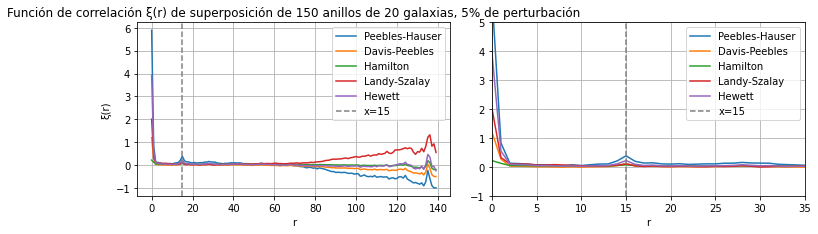

In [53]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_Mcpp_5, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_Mcpp_5, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_Mcpp_5, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_Mcpp_5, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_Mcpp_5, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 150 anillos de 20 galaxias, 5% de perturbación')

axes_cosmo[1].plot(ξ_PH_Mcpp_5, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_Mcpp_5, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_Mcpp_5, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_Mcpp_5, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_Mcpp_5, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

In [54]:
#10% de perturbacion
N_Mcpp_10 = len(DDcirculo_Mcpp_10)
Nr_Mcpp_10 = len(rr_Mcpp_10)

# Creamos un arreglo donde guardamos todos los datos (galaxias y random)
all_data_Mcpp_10 = DDcirculo_Mcpp_10
all_data_Mcpp_10.extend(rr_Mcpp_10)

#Obtenemos las distancias de todos los datos contra todos
distance_all_Mcpp_10 = comp_all_distances(all_data_Mcpp_10)

# Ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) y lo devuelve como una lista
allrandom_Mcpp_10 = [round(r, 0) for r in  distance_all_Mcpp_10] #round redonde a 0 decimales
allcount_Mcpp_10 = Counter(allrandom_Mcpp_10) #registra cuántas veces se agregan valores equivalentes.
sorted_all_Mcpp_10 = sorted(allcount_Mcpp_10.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

DD_Mcpp_10= []
for i in range(140):
    DD_Mcpp_10.append(dcount_Mcpp_10[i]/((N_Mcpp_10*(N_Mcpp_10-1))/2))
    
RR_Mcpp_10= []
for i in range(140):
    RR_Mcpp_10.append(rcount_Mcpp_10[i]/((Nr_Mcpp_10*(Nr_Mcpp_10-1))/2))
    
DR_Mcpp_10= []
for i in range(140):
    DR_Mcpp_10.append(allcount_Mcpp_10[i]/(Nr_Mcpp_10*N_Mcpp_10))

In [55]:
ξ_PH_Mcpp_10 = []
for i in range(140):
    ξ_PH_Mcpp_10.append(((DD_Mcpp_10[i]/RR_Mcpp_10[i]) -1))
    
ξ_DP_Mcpp_10 = []
for i in range(140):
    ξ_DP_Mcpp_10.append(((DD_Mcpp_10[i]/DR_Mcpp_10[i]) -1)+0.5)
    
ξ_H_Mcpp_10 = []
for i in range(140):
    ξ_H_Mcpp_10.append(((DD_Mcpp_10[i]*RR_Mcpp_10[i])/((DR_Mcpp_10[i])**2))-1+.8 )
    
ξ_LS_Mcpp_10 = []
for i in range(140):
    ξ_LS_Mcpp_10.append(((DD_Mcpp_10[i]-(2*DR_Mcpp_10[i])+RR_Mcpp_10[i])/RR_Mcpp_10[i])+2.25)
    
ξ_He_Mcpp_10 = []
for i in range(140):
    ξ_He_Mcpp_10.append(((DD_Mcpp_10[i]-DR_Mcpp_10[i])/RR_Mcpp_10[i])+1.1)

Text(0.5, 6.0, 'r')

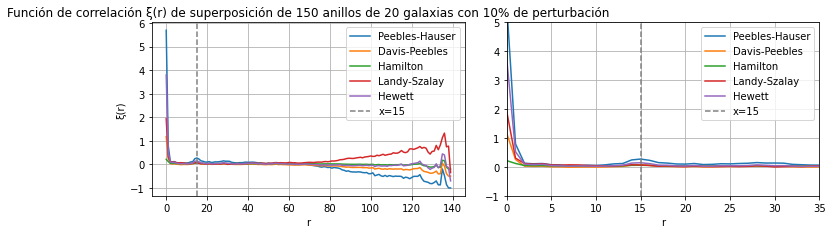

In [56]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].plot(ξ_PH_Mcpp_10, label='Peebles-Hauser')
axes_cosmo[0].plot(ξ_DP_Mcpp_10, label='Davis-Peebles')
axes_cosmo[0].plot(ξ_H_Mcpp_10, label='Hamilton')
axes_cosmo[0].plot(ξ_LS_Mcpp_10, label='Landy-Szalay')
axes_cosmo[0].plot(ξ_He_Mcpp_10, label='Hewett')
axes_cosmo[0].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[0].grid()
axes_cosmo[0].legend()
axes_cosmo[0].set_xlabel('r')
axes_cosmo[0].set_ylabel('ξ(r)')
axes_cosmo[0].set_title('Función de correlación ξ(r) de superposición de 150 anillos de 20 galaxias con 10% de perturbación')

axes_cosmo[1].plot(ξ_PH_Mcpp_10, label='Peebles-Hauser')
axes_cosmo[1].plot(ξ_DP_Mcpp_10, label='Davis-Peebles')
axes_cosmo[1].plot(ξ_H_Mcpp_10, label='Hamilton')
axes_cosmo[1].plot(ξ_LS_Mcpp_10, label='Landy-Szalay')
axes_cosmo[1].plot(ξ_He_Mcpp_10, label='Hewett')
axes_cosmo[1].axvline(15, color='gray', ls='--', label='x=15')
axes_cosmo[1].set_xlim(0,35)
axes_cosmo[1].set_ylim(-1,5)
axes_cosmo[1].grid()
axes_cosmo[1].legend()
axes_cosmo[1].set_xlabel('r')

## Data clustering for circle detection

center of fitted circle = (68.26043053282808, 80.5230420040505) 
 radius = 13.108988239315671 +/- stddev= 0.48652189766961085


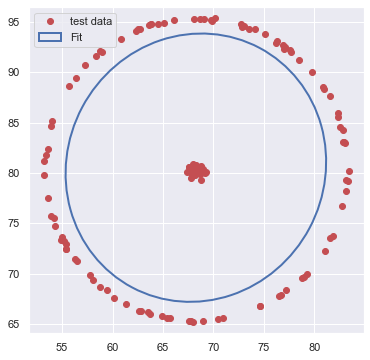

In [451]:
#pip install lsq-ellipse 
from ellipse import LsqEllipse
import statistics
from statistics import mean 
from matplotlib.patches import Ellipse

lsqe = LsqEllipse()
lsqe.fit(datos_train)
center, width, height, phi = lsqe.as_parameters()

plt.close('all')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(datos_train[:,0], datos_train[:,1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
              edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
print('center of fitted circle =',center, '\n','radius =', mean([width,height]),'+/- stddev=',statistics.stdev([width,height]))
plt.legend()
plt.show()

Los puntos se agrupan alrededor de círculos de modo que la suma de las distancias desde los puntos de datos y los círculos más cercanos apropiados se minimiza.

Sea R2 el conjunto de todos los puntos del plano y R+ el conjunto de los números reales no negativos.



In [81]:
#pip install circle-fit

# Clustering
## DBSCAN
Density-Based Spatial Clustering of Applications with Noise

- Si no hay densidad, entonces es ruido

class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

"El algoritmo DBSCAN funciona con dos parámetros.

Estos parámetros son:

- Epsilon (Eps): Esta es la distancia mínima requerida para que dos puntos sean denominados como vecinos, es decir, si la distancia entre dos puntos es máxima Eps, entonces consideramos que los dos puntos son vecinos.

- MinPoints: Esto se refiere al número mínimo de puntos necesarios para construir un clúster. Un clúster solo se reconoce si el número de puntos es mayor o igual que los MinPts.

Tipos de puntos de datos en un clúster de DBSCAN
Una vez que se completa la agrupación en clústeres de DBSCAN, terminamos con tres tipos de puntos de datos de la siguiente manera:

- Núcleo: Este es un punto a partir del cual los dos parámetros anteriores están completamente definidos, es decir, un punto con al menos Minpoints dentro de la distancia de Eps de sí mismo.
- Frontera: Este es cualquier punto de datos que no es un punto central, pero tiene al menos un punto central dentro de la distancia Eps de sí mismo.
- Ruido: Este es un punto con menos de Minpoints a distancia Eps de sí mismo. Por lo tanto, no es un núcleo o una frontera." -https://www.section.io/engineering-education/dbscan-clustering-in-python/#:~:text=DBSCAN%20is%20a%20popular%20density,number%20of%20clusters%20required%20prior.

In [5]:
from sklearn.cluster import DBSCAN

In [ ]:
circulos = DDcirculo

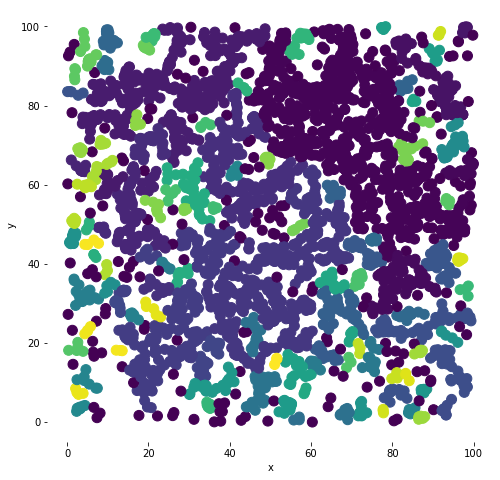

In [38]:
#Importampos los datos
datos = np.zeros((len(circulos),2))
for i in range(len(circulos)):
        datos[i,0] = circulos[i][0]
        datos[i,1] = circulos[i][1]

#Importampos los datos
datosrr = np.zeros((len(rr),2))
for i in range(len(rr)):
        datosrr[i,0] = rr[i][0]
        datosrr[i,1] = rr[i][1]

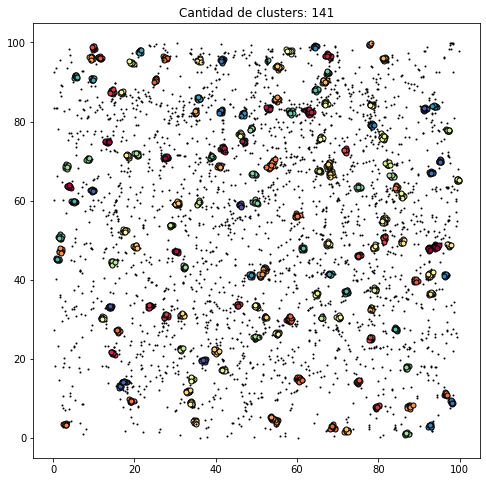

In [45]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# DBSCAN
db = DBSCAN(eps=1, min_samples=8).fit(datos) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [46]:
df_cluster_datos = pd.DataFrame(datos)

df_cluster_datos['labels'] = labels

pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df_cluster_datos)

              0          1  labels
0     98.678700  34.395027      -1
1     77.476275  48.937617      -1
2     93.131879  62.967334      -1
3     88.209004  62.248113      -1
4     90.547237  33.090387      -1
5     87.849874  62.173014      -1
6     78.892877  41.687373      -1
7     79.554729  55.772697      -1
8     78.599376  42.055941      -1
9     80.245808  39.239655      -1
10    87.316818  62.022785      -1
11    94.043900  62.876224      -1
12    83.507889  59.931296      -1
13    92.810520  48.063681       0
14    92.494546  48.404802       0
15    91.986507  48.538772       0
16    93.186250  48.184003       0
17    92.260461  47.883377       0
18    92.420910  47.366093       0
19    92.224492  48.049099       0
20    93.048200  48.005307       0
21    92.297157  48.001318       0
22    92.279049  48.018402       0
23    85.669237  91.393823      -1
24    86.582413  90.124868      -1
25    83.315828  96.827049      -1
26    83.425914  96.423893      -1
27    95.548721  84.

In [47]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)

In [48]:
mydict[0]

array([  13,   14,   15,   16,   17,   18,   19,   20,   21,   22, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1343, 1781,
       1783, 1791, 1866, 1867], dtype=int64)

In [49]:
cluster_data = [] #Cada cluster_data[i]entrega todos los puntos que ertenecen a ese cluster
for j in mydict.values():
    cluster_data.append(datos[j])

El centro de masas de un sistema discreto o continuo es el punto geométrico que dinámicamente se comporta como si en él estuviera aplicada la resultante de las fuerzas externas al sistema

Para un sistema de masas discreto, formado por un conjunto de masas puntuales, el centro de masas se puede calcular como:

$$ \mathbf {r} _{\text{cm}}={\frac {\sum _{i}m_{i}\mathbf {r} _{i}}{\sum _{i}m_{i}}}={\frac {1}{M}}\sum _{i}m_{i}\mathbf {r} _{i}$$

$M$, masa total del sistema de partículas.
$m_{i}$, masa de la partícula i-ésima.
${r}_{i}$, vector de posición de la masa i-ésima respecto al sistema de referencia supuesto.

En este caso suponemos que $m_i=1$

A continuación se tomará el centro de masa de cada cluster y se dibujaran circunferencias con radio 15 (obtenido con la función de correlación) y como centro el centro de masa.

In [11]:
def centro_masa(n, r):
    return sum(r)/n

In [51]:
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

In [52]:
len(centros_clusters)

141

La distancia entre 2 puntos $(x_c,y_c)$ and $(x_p,y_p)$ está dada por el teorema de Pitágoras como
$$d=\sqrt{(x_p−x_c)^2+(y_p−y_c)^2}$$
El punto $(x_p,y_p)$ está dentro de la circunferencia si $d<r$, en la circunferencia si $d=r$, y afuera de la circunferencia si $d>r$.

In [53]:
p = np.zeros(len(centros_clusters))
r = 0
points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos)):
         if 14.8 < distancia(centros_clusters[i], datos[j]) < 15.2:
                p[i] +=1
                points.append(datos[j])

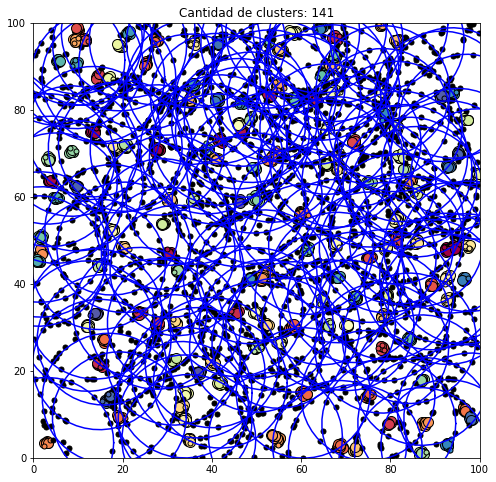

In [56]:
db = DBSCAN(eps=1, min_samples=8).fit(datos) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = datos[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

El area de un anillo está dada por:
    $$Area_{anillo} = \pi (R^2 - r^2)$$

In [57]:
def ring_area(R,r):
    return np.pi*((R**2) -(r**2))

In [58]:
ring_area(16,14)

188.49555921538757

In [59]:
ring_area(17.776388834631177,16)

188.49555921538757

In [60]:
ring_area(14,11.661903789690601)

188.49555921538757

In [61]:
#Para calcular el radio inferior y superior para que elmarea permaneza igual
limsup = np.sqrt(ring_area(16,14)/np.pi+(16**2)) 

In [62]:
liminf = np.sqrt((14**2)-ring_area(16,14)/np.pi) 

In [63]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos)):
        if liminf < distancia(centros_clusters[i], datos[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos[j])
        elif 14 <= distancia(centros_clusters[i], datos[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos[j])
        elif 16 < distancia(centros_clusters[i], datos[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,liminf)
ring2area = ring_area(16,14)
ring3area = ring_area(limsup,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

In [64]:
clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)

In [65]:
ring1

array([ 62.,  92.,  78.,  45.,  68.,  97.,  84.,  88.,  91.,  65.,  86.,
        53.,  68.,  65.,  42.,  54., 117.,  84., 111.,  32.,  63., 104.,
        29.,  57.,  82.,  64.,  47.,  63.,  63.,  65.,  26.,  39.,  89.,
       103.,   1.,  98.,  41.,  12.,  71.,  33., 106.,  29.,  50., 125.,
       115., 100.,  45.,  81.,  28.,  79.,  49.,  96.,  78.,  90.,  51.,
        73.,  21.,  74.,  88.,  72.,  45.,  44.,  60.,  57.,  43., 112.,
        50.,  52.,  75.,  88.,  66.,  96., 100., 102.,  51.,  49.,  93.,
        46.,  43.,  32.,  77.,  25.,  84.,  66.,  92.,  92.,  58.,  71.,
        84.,  27.,  52.,  62.,  69.,  84.,  54.,  46.,  63.,  94.,  33.,
        26.,  89.,  92.,  56.,  43.,  68.,  62., 113.,  61.,  59.,  99.,
        35., 104.,  59.,  85.,  66.,  73.,  25.,  30.,  26.,  83.,  32.,
        79.,  52.,  56.,  27.,  76.,  91.,  16.,  40.,  35.,  91.,  41.,
        53.,  21.,  30.,  77.,  55.,  82.,  53.,  63.,  72.])

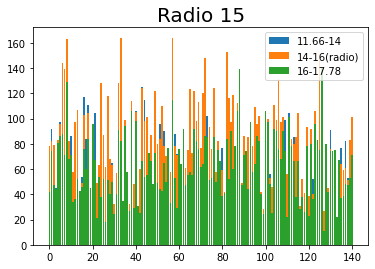

In [66]:
plt.bar(clusters,ring1,label='11.66-14')
plt.bar(clusters,ring2,label='14-16(radio)')
plt.bar(clusters,ring3,label='16-17.78')
plt.title('Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()

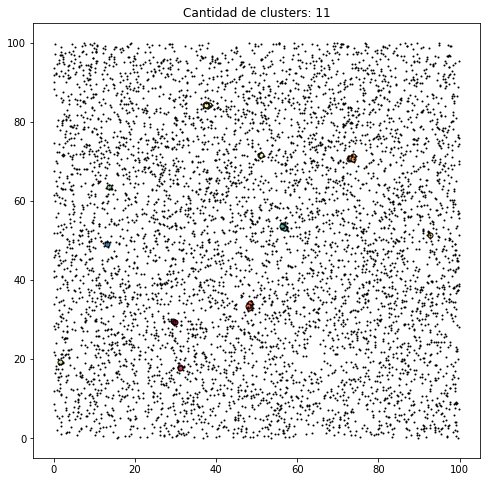

In [67]:
# DBSCAN
db = DBSCAN(eps=1, min_samples=8).fit(datosrr)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_rand = db.labels_

# Número de clusters, ignorando el ruido
n_clusters_rand = len(set(labels_rand)) - (1 if -1 in labels_rand else 0)
n_noise_rand = list(labels_rand).count(-1)

# Plot 
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels_rand)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels_rand == k)

    xy = datosrr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = datosrr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Cantidad de clusters: %d' % n_clusters_rand)

plt.show()

In [69]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
cir_ = Puntos_circulos(200, 20, 15, 100,0.01)
circulos_ = DD(cir_)

total puntos 5280


# Prueba con menos circunferencias

In [71]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_30 = Puntos_circulos(30, 25, 15, 100,0)

lenDD_30 = len(DD(circulo_30))

rr_30 = np.random.rand(int(lenDD_30*1.5), 2)*100 #random

circulos_30 = DD(circulo_30)

#Importampos los datos
datos_30 = np.zeros((lenDD_30,2))
for i in range(lenDD_30):
        datos_30[i,0] = circulos_30[i][0]
        datos_30[i,1] = circulos_30[i][1]

total puntos 939


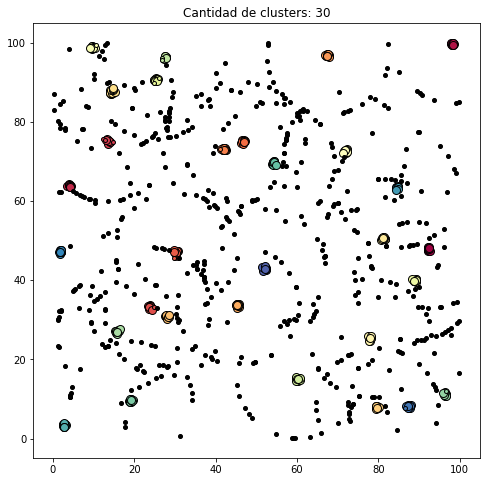

In [77]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_30) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_30[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_30[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [73]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_30[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

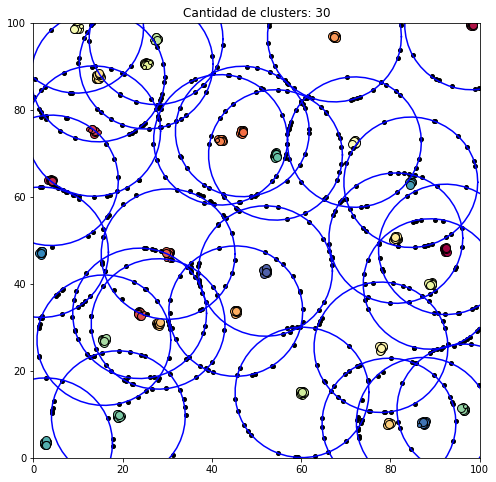

In [74]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_30) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_30[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_30[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

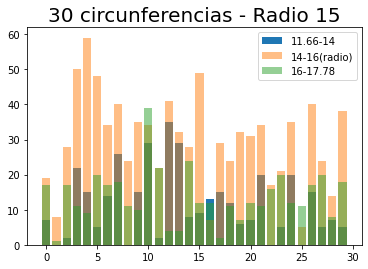

In [75]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_30)):
        if liminf < distancia(centros_clusters[i], datos_30[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_30[j])
        elif 14 <= distancia(centros_clusters[i], datos_30[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_30[j])
        elif 16 < distancia(centros_clusters[i], datos_30[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_30[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='11.66-14')
plt.bar(clusters,ring2,label='14-16(radio)',alpha=0.5)
plt.bar(clusters,ring3,label='16-17.78',alpha=0.5)
plt.title('30 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

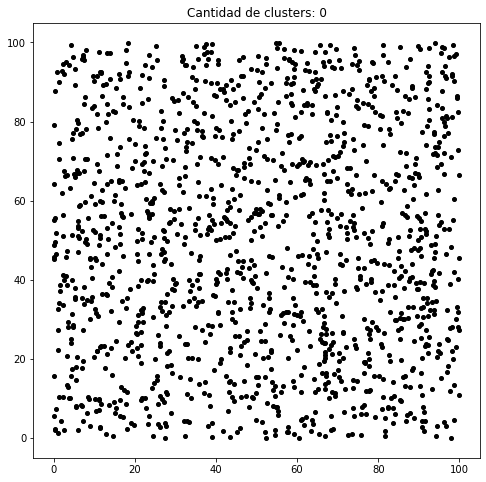

In [78]:
# DBSCAN
db = DBSCAN(eps=1, min_samples=8).fit(rr_30)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_rand = db.labels_

# Número de clusters, ignorando el ruido
n_clusters_rand = len(set(labels_rand)) - (1 if -1 in labels_rand else 0)
n_noise_rand = list(labels_rand).count(-1)

# Plot 
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels_rand)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels_rand == k)

    xy = rr_30[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = rr_30[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_rand)

plt.show()

# 50

In [79]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50 = Puntos_circulos(50, 25, 15, 100,0.01)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

total puntos 1551


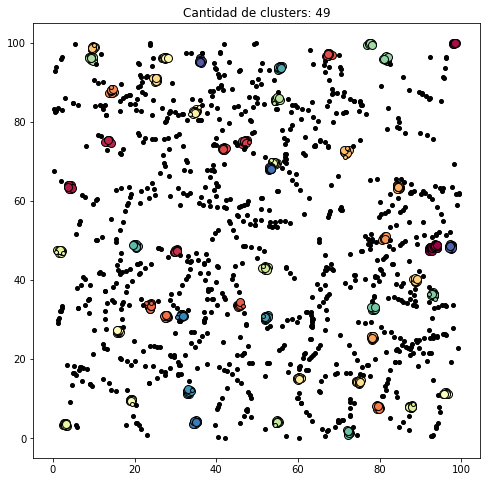

In [80]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [81]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

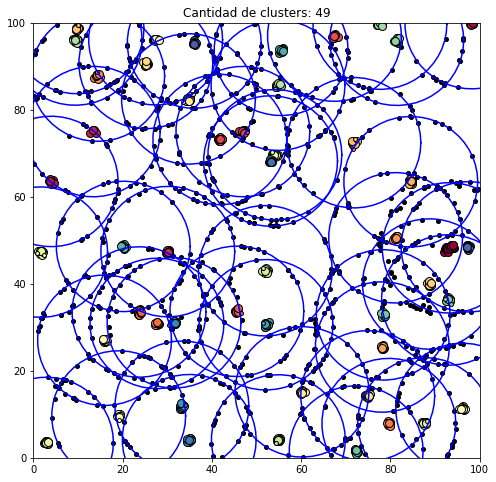

In [82]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

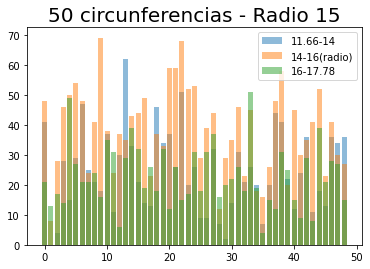

In [83]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if liminf < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_50[j])


clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='11.66-14',alpha=0.5)
plt.bar(clusters,ring2,label='14-16(radio)',alpha=0.5)
plt.bar(clusters,ring3,label='16-17.78',alpha=0.5)
plt.title('50 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

# 75

In [84]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_75 = Puntos_circulos(75, 25, 15, 100,0)

lenDD_75 = len(DD(circulo_75))

rr_75 = np.random.rand(int(lenDD_75*1.5), 2)*100 #random

circulos_75 = DD(circulo_75)

#Importampos los datos
datos_75 = np.zeros((lenDD_75,2))
for i in range(lenDD_75):
        datos_75[i,0] = circulos_75[i][0]
        datos_75[i,1] = circulos_75[i][1]

total puntos 2428


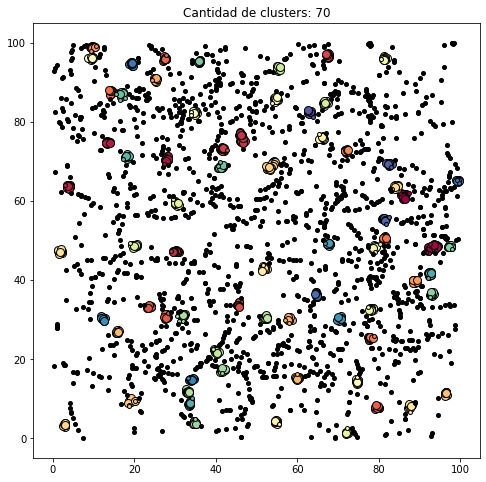

In [85]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_75) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_75[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_75[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [86]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_75[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

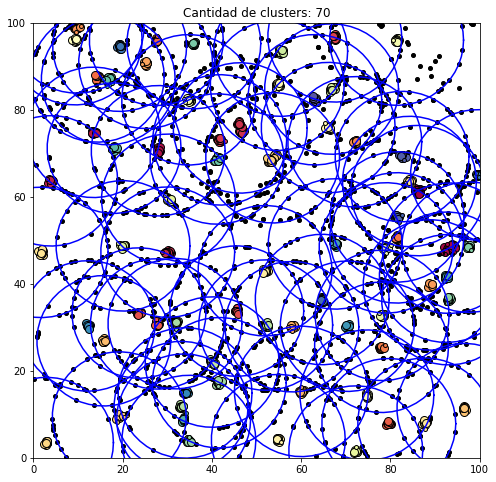

In [87]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_75) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_75[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_75[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

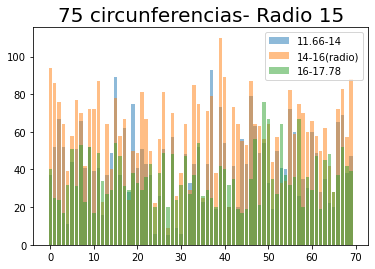

In [88]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_75)):
        if liminf < distancia(centros_clusters[i], datos_75[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_75[j])
        elif 14 <= distancia(centros_clusters[i], datos_75[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_75[j])
        elif 16 < distancia(centros_clusters[i], datos_75[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_75[j])


clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='11.66-14', alpha=0.5)
plt.bar(clusters,ring2,label='14-16(radio)', alpha=0.5)
plt.bar(clusters,ring3,label='16-17.78', alpha=0.5)
plt.title('75 circunferencias- Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

# 100

In [89]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_100 = Puntos_circulos(100, 25, 15, 100,0.)

lenDD_100 = len(DD(circulo_100))

rr_100 = np.random.rand(int(lenDD_100*1.5), 2)*100 #random

circulos_100 = DD(circulo_100)

#Importampos los datos
datos_100 = np.zeros((lenDD_100,2))
for i in range(lenDD_100):
        datos_100[i,0] = circulos_100[i][0]
        datos_100[i,1] = circulos_100[i][1]

total puntos 3258


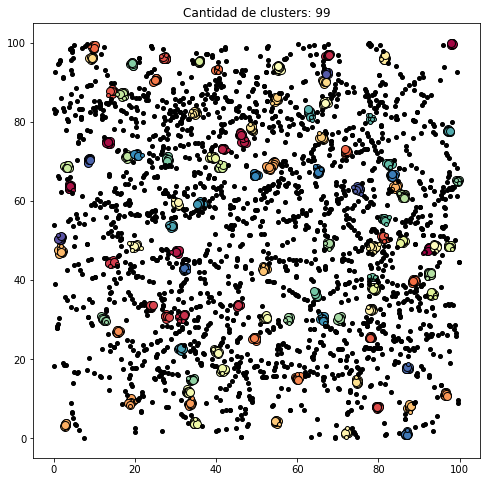

In [90]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_100) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_100[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_100[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [91]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_100[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

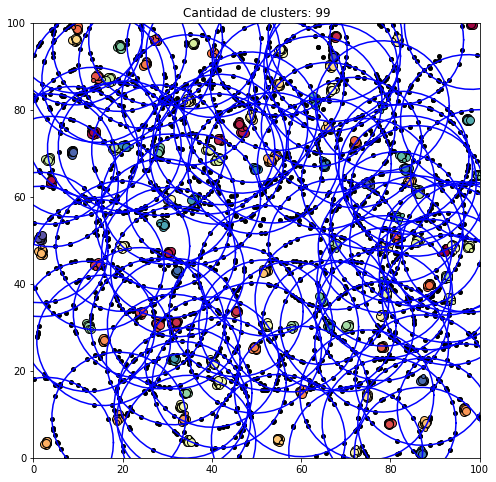

In [92]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_100) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_100[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_100[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

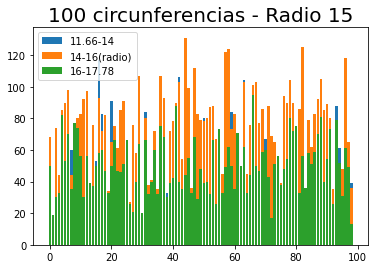

In [93]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_100)):
        if liminf < distancia(centros_clusters[i], datos_100[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_100[j])
        elif 14 <= distancia(centros_clusters[i], datos_100[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_100[j])
        elif 16 < distancia(centros_clusters[i], datos_100[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_100[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='11.66-14')
plt.bar(clusters,ring2,label='14-16(radio)')
plt.bar(clusters,ring3,label='16-17.78')
plt.title('100 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

# 150

In [94]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_150 = Puntos_circulos(150, 25, 15, 100,0)

lenDD_150 = len(DD(circulo_150))

rr_150 = np.random.rand(int(lenDD_150*1.5), 2)*100 #random

circulos_150 = DD(circulo_150)

#Importampos los datos
datos_150 = np.zeros((lenDD_150,2))
for i in range(lenDD_150):
        datos_150[i,0] = circulos_150[i][0]
        datos_150[i,1] = circulos_150[i][1]

total puntos 4850


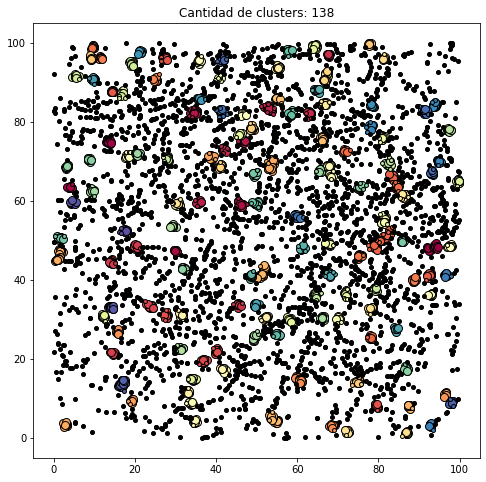

In [95]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

In [96]:
# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_150[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])

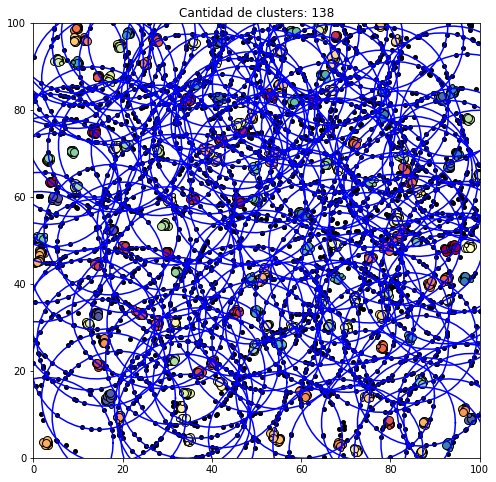

In [97]:
db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

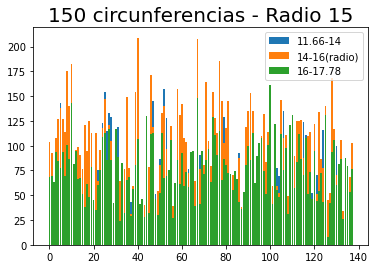

In [98]:
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_150)):
        if liminf < distancia(centros_clusters[i], datos_150[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_150[j])
        elif 14 <= distancia(centros_clusters[i], datos_150[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_150[j])
        elif 16 < distancia(centros_clusters[i], datos_150[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_150[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='11.66-14')
plt.bar(clusters,ring2,label='14-16(radio)')
plt.bar(clusters,ring3,label='16-17.78')
plt.title('150 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

## Modificando rings

In [99]:
#Para calcular el radio inferior y superior para que elmarea permaneza igual
liminf =np.sqrt((13**2)-ring_area(17,13)/np.pi) 
limsup = np.sqrt(ring_area(17,13)/np.pi+(17**2)) 

total puntos 4850


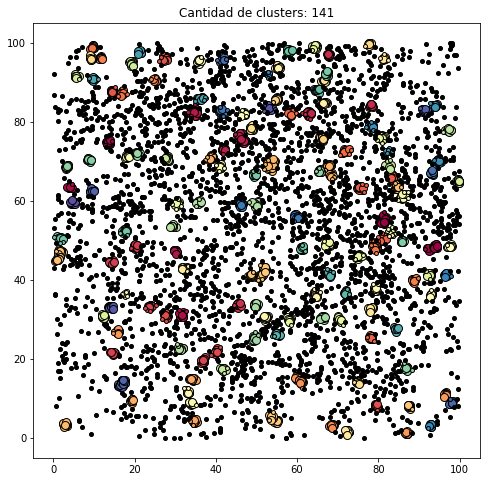

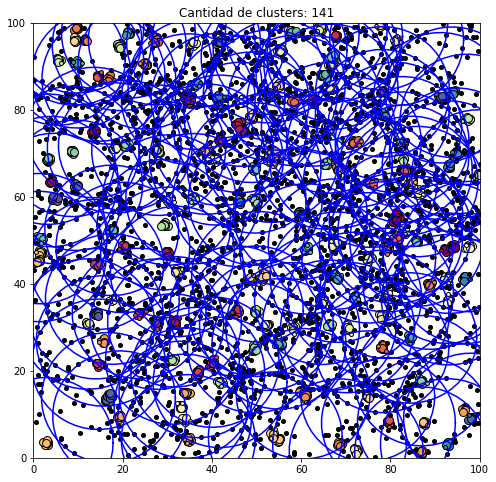

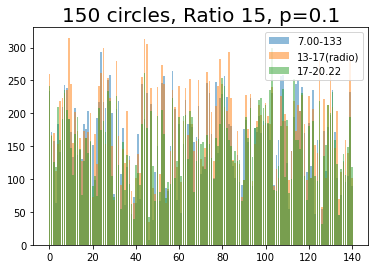

In [100]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_150 = Puntos_circulos(150, 25, 15, 100,0.1)

lenDD_150 = len(DD(circulo_150))

rr_150 = np.random.rand(int(lenDD_150*1.5), 2)*100 #random

circulos_150 = DD(circulo_150)

#Importampos los datos
datos_150 = np.zeros((lenDD_150,2))
for i in range(lenDD_150):
        datos_150[i,0] = circulos_150[i][0]
        datos_150[i,1] = circulos_150[i][1]
        
###################################################################

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

#########################################################

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_150[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
##########################################################333

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

#################################################

ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_150)):
        if liminf < distancia(centros_clusters[i], datos_150[j]) < 13:
            ring1[i] +=1
            ring1_points.append(datos_150[j])
        elif 13 <= distancia(centros_clusters[i], datos_150[j]) <= 17:
            ring2[i] +=1
            ring2_points.append(datos_150[j])
        elif 17 < distancia(centros_clusters[i], datos_150[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_150[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='7.00-133', alpha=0.5)
plt.bar(clusters,ring2,label='13-17(radio)', alpha=0.5)
plt.bar(clusters,ring3,label='17-20.22', alpha=0.5)
plt.title('150 circles, Ratio 15, p=0.1', fontsize=20)
plt.legend(loc=0)
plt.show()    

In [101]:
#Para calcular el radio inferior y superior para que elmarea permaneza igual
liminf =np.sqrt((13.5**2)-ring_area(16.5,13.5)/np.pi) 
limsup = np.sqrt(ring_area(16.5,13.5)/np.pi+(16.5**2)) 

total puntos 4847


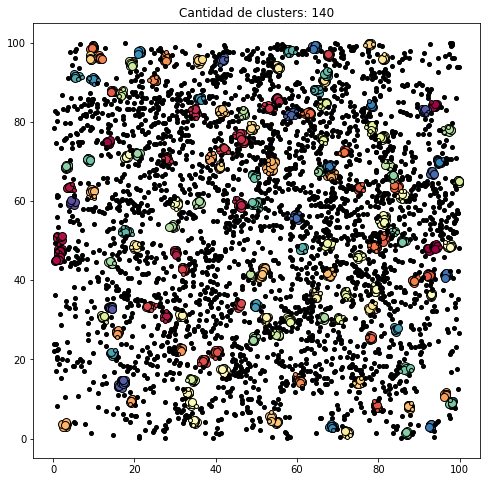

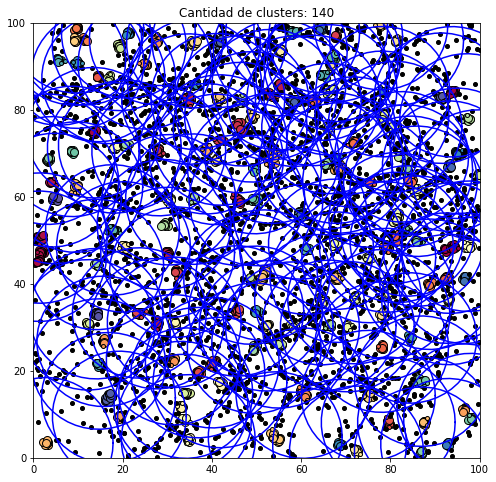

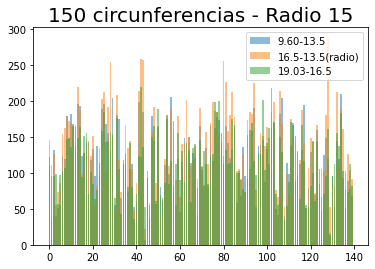

In [102]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_150 = Puntos_circulos(150, 25, 15, 100,0.1)

lenDD_150 = len(DD(circulo_150))

rr_150 = np.random.rand(int(lenDD_150*1.5), 2)*100 #random

circulos_150 = DD(circulo_150)

#Importampos los datos
datos_150 = np.zeros((lenDD_150,2))
for i in range(lenDD_150):
        datos_150[i,0] = circulos_150[i][0]
        datos_150[i,1] = circulos_150[i][1]
        
###################################################################

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

#########################################################

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_150[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
##########################################################333

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

#################################################

ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_150)):
        if liminf< distancia(centros_clusters[i], datos_150[j]) < 13.5:
            ring1[i] +=1
            ring1_points.append(datos_150[j])
        elif 13.5 <= distancia(centros_clusters[i], datos_150[j]) <= 16.5:
            ring2[i] +=1
            ring2_points.append(datos_150[j])
        elif 16.5 < distancia(centros_clusters[i], datos_150[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_150[j])


clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.bar(clusters,ring1,label='9.60-13.5', alpha=0.5)
plt.bar(clusters,ring2,label='16.5-13.5(radio)', alpha=0.5)
plt.bar(clusters,ring3,label='19.03-16.5', alpha=0.5)
plt.title('150 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

In [103]:
#Para calcular el radio inferior y superior para que elmarea permaneza igual
liminf =np.sqrt((13.5**2)-ring_area(16.5,13.5)/np.pi) 
limsup = np.sqrt(ring_area(16.5,13.5)/np.pi+(16.5**2)) 

total puntos 4854


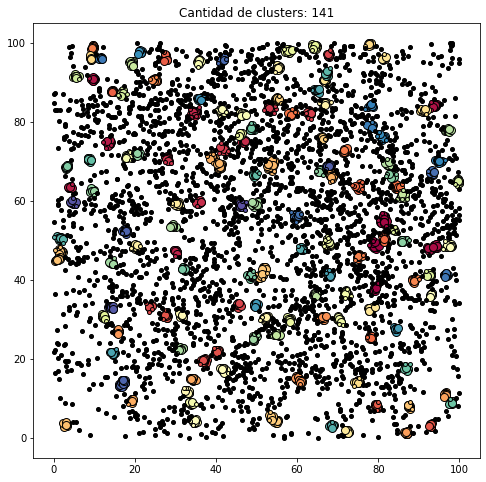

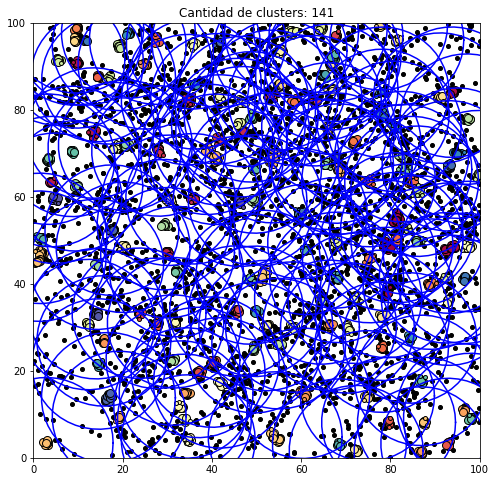

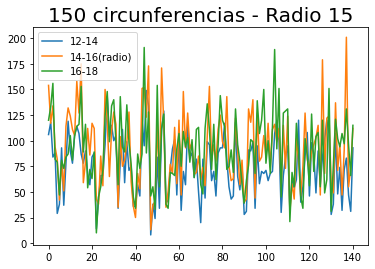

In [104]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_150 = Puntos_circulos(150, 25, 15, 100,0.1)

lenDD_150 = len(DD(circulo_150))

rr_150 = np.random.rand(int(lenDD_150*1.5), 2)*100 #random

circulos_150 = DD(circulo_150)

#Importampos los datos
datos_150 = np.zeros((lenDD_150,2))
for i in range(lenDD_150):
        datos_150[i,0] = circulos_150[i][0]
        datos_150[i,1] = circulos_150[i][1]
        
###################################################################

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

#########################################################

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_150[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
##########################################################333

db = DBSCAN(eps=1, min_samples=8).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

#################################################

ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_150)):
        if 12 < distancia(centros_clusters[i], datos_150[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_150[j])
        elif 14 <= distancia(centros_clusters[i], datos_150[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_150[j])
        elif 16 < distancia(centros_clusters[i], datos_150[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_150[j])

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,ring1,label='12-14')
plt.plot(clusters,ring2,label='14-16(radio)')
plt.plot(clusters,ring3,label='16-18')
plt.title('150 circunferencias - Radio 15', fontsize=20)
plt.legend(loc=0)
plt.show()    

## Con perturbaciones

total puntos 1552


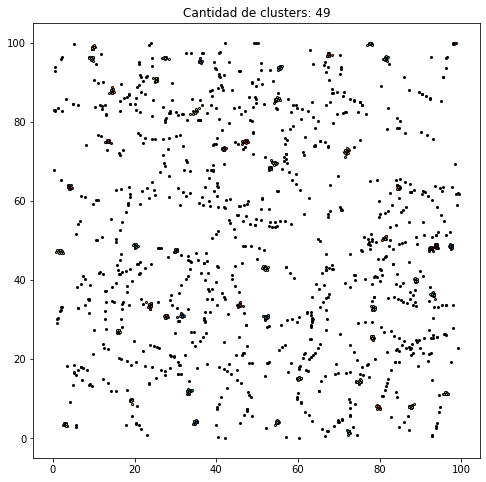

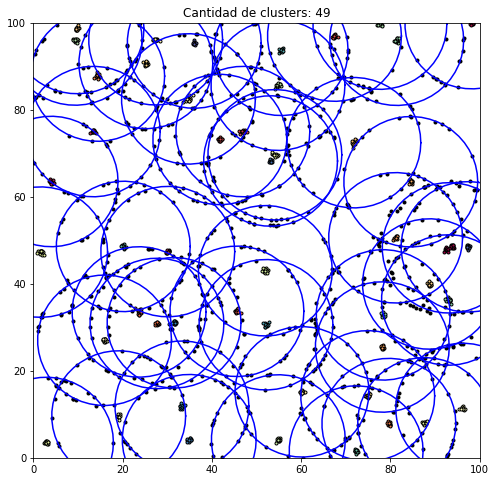

NameError: name 'liminf' is not defined

In [17]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50, etiqueta_50_01 = Puntos_circulos(50, 25, 15, 100,0.01)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if liminf < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < limsup:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.title('50 circunferencias - Perturbación 0.01', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 1552


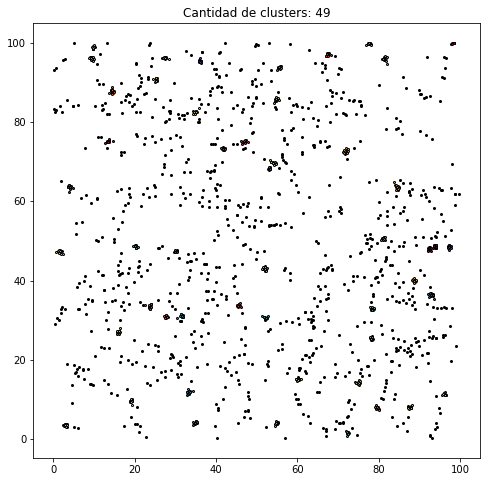

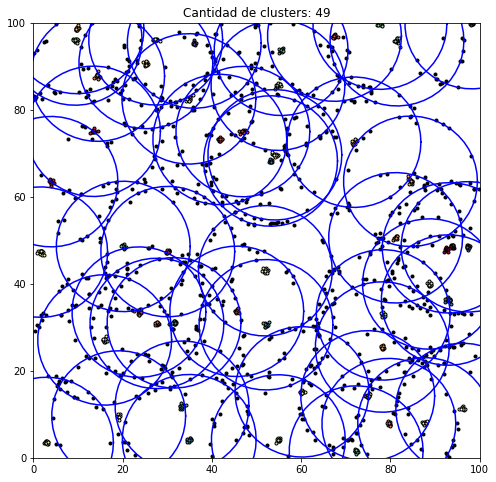

NameError: name 'distancia' is not defined

In [16]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50, etiqueta_50_05 = Puntos_circulos(50, 25, 15, 100,0.05)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if 12 < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.title('50 circunferencias - Perturbación 0.05', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 1548


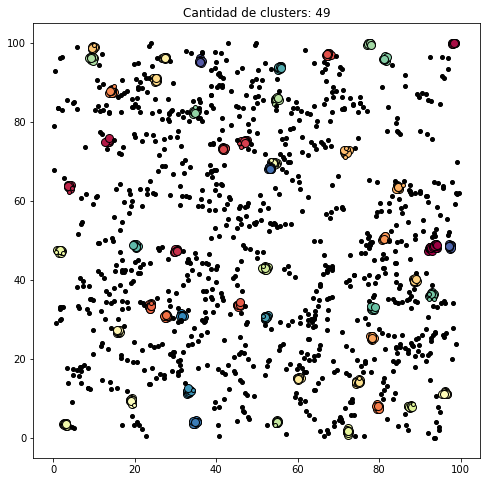

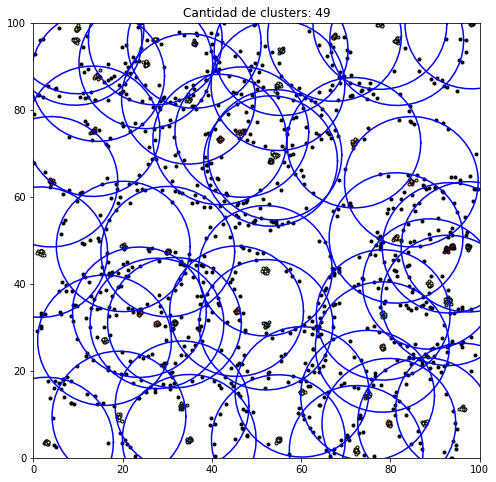

NameError: name 'distancia' is not defined

In [19]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50, etiqueta_50_08 = Puntos_circulos(50, 25, 15, 100,0.08)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if 12 < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.title('50 circunferencias - Perturbación 0.08', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 1553


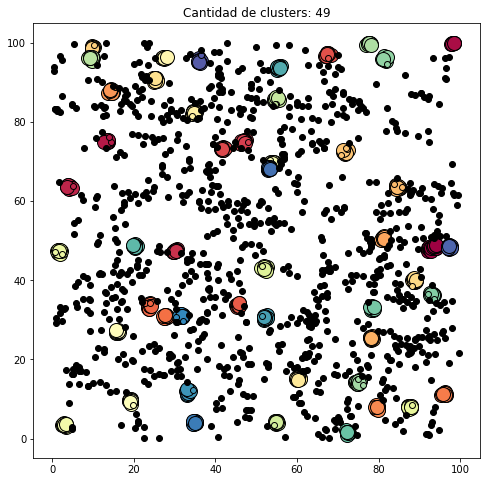

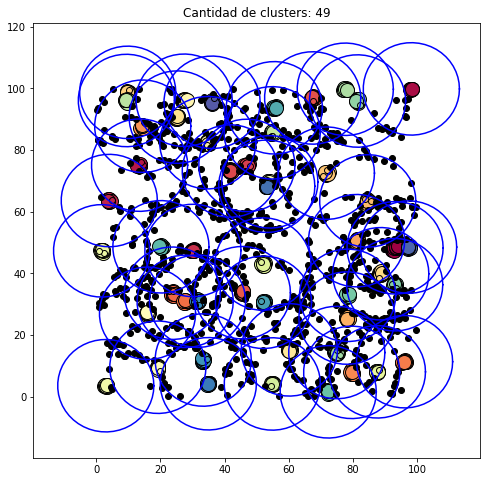

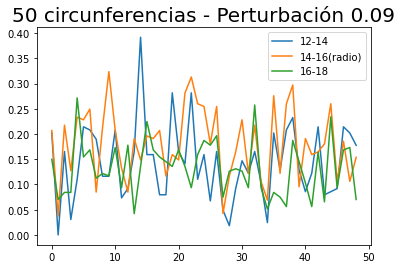

In [93]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50, etiqueta_50_9 = Puntos_circulos(50, 25, 15, 100,0.09)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if 12 < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.title('50 circunferencias - Perturbación 0.09', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 1549


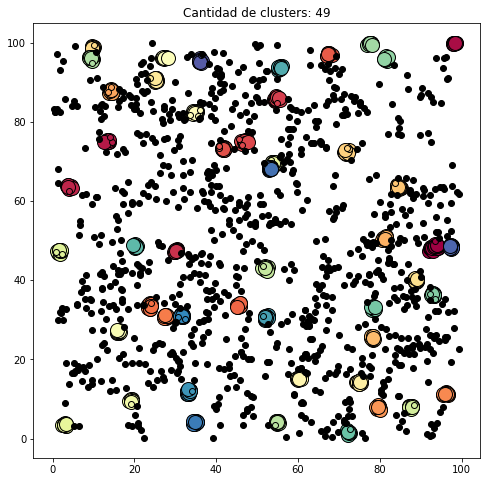

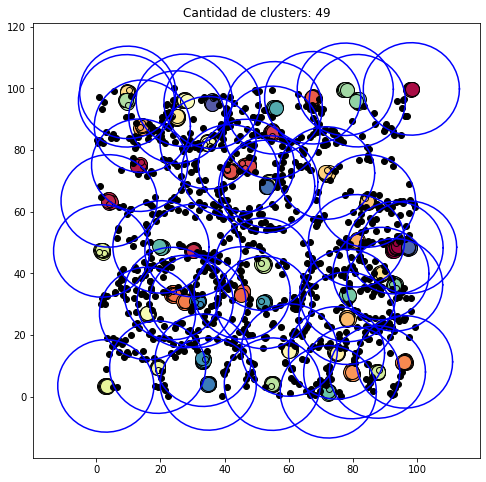

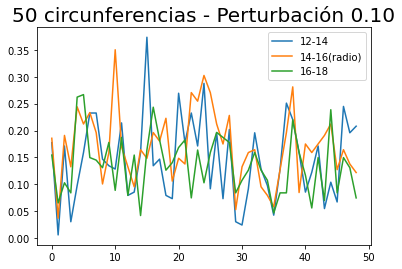

In [94]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50 = Puntos_circulos(50, 25, 15, 100,0.1)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if 12 < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.title('50 circunferencias - Perturbación 0.10', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 1552


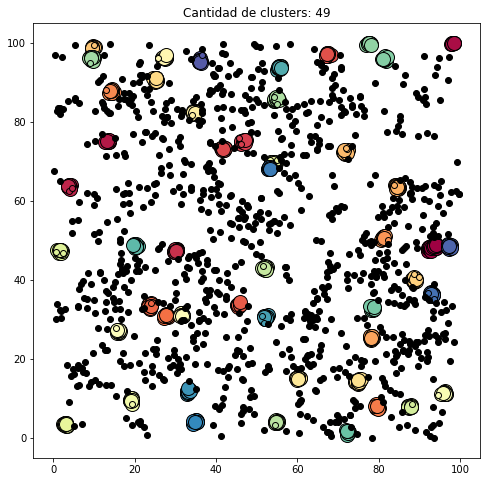

NameError: name 'centro_masa' is not defined

In [44]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_50 = Puntos_circulos(50, 25, 15, 100,0.12)

lenDD_50 = len(DD(circulo_50))

rr_50 = np.random.rand(int(lenDD_50*1.5), 2)*100 #random

circulos_50 = DD(circulo_50)

#Importampos los datos
datos_50 = np.zeros((lenDD_50,2))
for i in range(lenDD_50):
        datos_50[i,0] = circulos_50[i][0]
        datos_50[i,1] = circulos_50[i][1]

db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()

# Para obtener los indices correpondientes de los puntos de cada cluster
mydict = {i: np.where(labels == i)[0] for i in range(n_clusters_)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
list_value = []
for key, value in mydict.items():
    temp = [key,value]
    list_value.append(temp)
    dictlist.append(value)
    
cluster_data = []
for j in mydict.values():
    cluster_data.append(datos_50[j])
    
centros_clusters = np.zeros((len(cluster_data),2))
for i in range(len(cluster_data)):
        centros_clusters[i,0] = centro_masa(len(cluster_data[i][:,0]), cluster_data[i][:,0])
        centros_clusters[i,1] = centro_masa(len(cluster_data[i][:,1]), cluster_data[i][:,1])
        
################################################################################################################3
db = DBSCAN(eps=1, min_samples=8).fit(datos_50) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_50[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = datos_50[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Cantidad de clusters: %d' % n_clusters_)

r = 15
t = np.linspace(0, 2*np.pi)
for i in range(len(centros_clusters)):
    x = centros_clusters[i,0] + (r * np.cos(t))
    y = centros_clusters[i,1] + (r * np.sin(t))
    plt.plot(x,y, color='b')
plt.show()
###################################################################################################################
        
ring1 = np.zeros(len(centros_clusters))
ring2 = np.zeros(len(centros_clusters))
ring3 = np.zeros(len(centros_clusters))
ring1_points = []
ring2_points = []
ring3_points = []
for i in range(len(centros_clusters)):
    for  j in range(len(datos_50)):
        if 12 < distancia(centros_clusters[i], datos_50[j]) < 14:
            ring1[i] +=1
            ring1_points.append(datos_50[j])
        elif 14 <= distancia(centros_clusters[i], datos_50[j]) <= 16:
            ring2[i] +=1
            ring2_points.append(datos_50[j])
        elif 16 < distancia(centros_clusters[i], datos_50[j]) < 18:
            ring3[i] +=1
            ring3_points.append(datos_50[j])

#A continuación vemos la densidad de galaxias en cada anillo

ring1area = ring_area(14,12)
ring2area = ring_area(16,14)
ring3area = ring_area(18,16)

#Densidad = galaxias / area

densidad_ring1 = []
densidad_ring2 = []
densidad_ring3 = []


densidad_ring1 = ring1/ring1area
densidad_ring2 = ring2/ring2area
densidad_ring3 = ring3/ring3area

clusters = []
for i in range(len(centros_clusters)):
    clusters.append(i)
    
plt.plot(clusters,densidad_ring1,label='12-14')
plt.plot(clusters,densidad_ring2,label='14-16(radio)')
plt.plot(clusters,densidad_ring3,label='16-18')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('50 circunferencias - Perturbación 0.12', fontsize=20)
plt.legend(loc=0)
plt.show()    

total puntos 39792


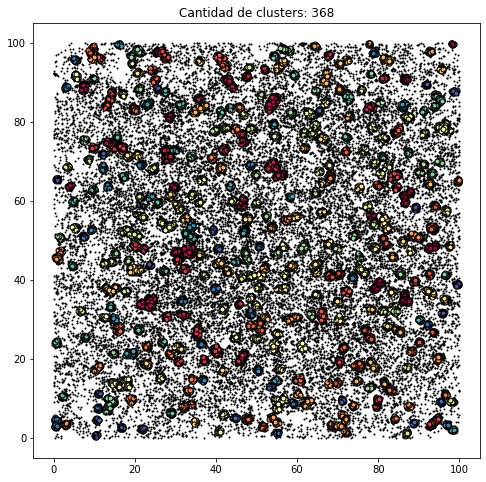

In [115]:
np.random.seed(431) #Tenemos números pseudoaleatorios, así que para obtener el mismo siempre lo sembramos
circulo_150 = Puntos_circulos(500, 60, 15, 100,0.1)

lenDD_150 = len(DD(circulo_150))

rr_150 = np.random.rand(int(lenDD_150*1.5), 2)*100 #random

circulos_150 = DD(circulo_150)

#Importampos los datos
datos_150 = np.zeros((lenDD_150,2))
for i in range(lenDD_150):
        datos_150[i,0] = circulos_150[i][0]
        datos_150[i,1] = circulos_150[i][1]
        
###################################################################

db = DBSCAN(eps=.8, min_samples=20).fit(datos_150) #eps=2, min_samples=10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# número de clusters, ignorando el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Plot
# Se remueve el negro y se utiliza para ruído
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(8,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = datos_150[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

    xy = datos_150[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Cantidad de clusters: %d' % n_clusters_)
plt.show()
